# Goal
### Predict Sale Price of Houses with evaluation metric as RMSE 

#### Overview
Following steps have been performed on dataset for creating regression models to predict House Prices
### 1. Exploratory Data Analysis(EDA)
### 2. Data Preprocessing
### 3. Feature Engineering & Feature Selection
<!-- ### 4. Outlier Detection -->
### 4. Machine Learning Models


In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('bmh')
sns.set_style('whitegrid')

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 300)

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# 1. EDA
To prevent data leakage and ensuring more robustness, test data will not be combined with training data

In [87]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv') #training dataset
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv') #test dataset

In [88]:
#see data contents
print(f' examples in training set : {train.shape[0]}, no. of features:{train.shape[1] - 2 }')
train.head(3)

 examples in training set : 1460, no. of features:79


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn           2         548         TA   
1     Attchd       1976.0          RFn           2         460         TA   
2     Attchd       2001.0          RFn           2         608         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   
2         TA          Y           0           42              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0    NaN   NaN         NaN        0       2    2008   
1            0         0    NaN   NaN         NaN        0       5    2007   
2            0         0    NaN   NaN         NaN        0       9    2008   

  SaleType SaleCondition  SalePrice  
0       WD        Normal     208500  
1       WD        Normal     181500  
2       WD        Normal     223500

In [89]:
print(f' examples in test set : {test.shape[0]}, no. of features:{test.shape[1] - 1 }')
test.head(3)

 examples in test set : 1459, no. of features:79


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       1961.0          Unf         1.0       730.0         TA   
1     Attchd       1958.0          Unf         1.0       312.0         TA   
2     Attchd       1997.0          Fin         2.0       482.0         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y         140            0              0          0   
1         TA          Y         393           36              0          0   
2         TA          Y         212           34              0          0   

   ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold  \
0          120         0    NaN  MnPrv         NaN        0       6    2010   
1            0         0    NaN    NaN        Gar2    12500       6    2010   
2            0         0    NaN  MnPrv         NaN        0       3    2010   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal

In [90]:
#check type of data in dataset
list(set(train.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [91]:
train.describe() # check stats of numerical columns

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [92]:
train.describe(include =['O']) #check stats of categorical columns

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460        588      1460   
unique         6        8          15          16          3         4   
top        Gable  CompShg     VinylSd     VinylSd    BrkFace        TA   
freq        1141     1434         515         504        445       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


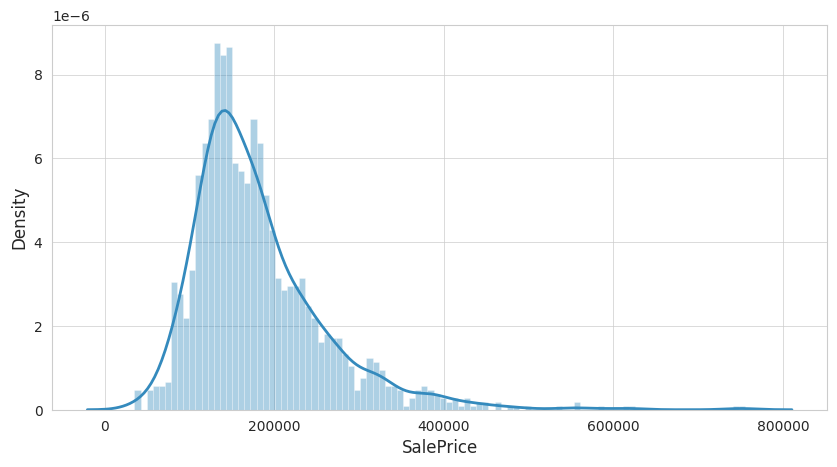

In [93]:
# Visualize SalePrice
print(train['SalePrice'].describe())
plt.figure(figsize=(10,5))
sns.distplot(train['SalePrice'], bins=100, kde = True, );

Plot is positively skewed, thus we will try to apply log normalization to make it normal  to reduce skewness, handle outliers & improve robustness of model

In [94]:
print(f"Skewness before log transform: {train['SalePrice'].skew()}")
print(f"Kurtosis before log transform: {train['SalePrice'].kurt()}")

Skewness before log transform: 1.8828757597682129
Kurtosis before log transform: 6.536281860064529


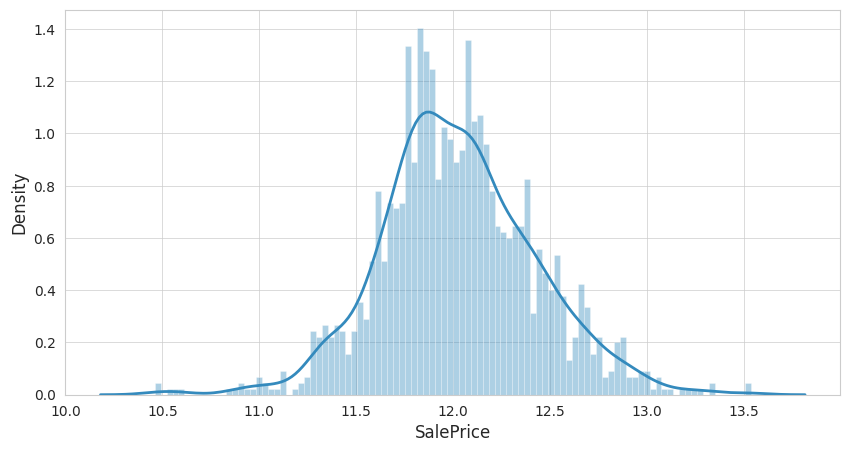

In [95]:
# Apply log normalization log(1+x) to SalePrice
plt.figure(figsize=(10,5))
sns.distplot(np.log1p(train['SalePrice']), bins=100, kde = True, );

In [96]:
print(f"Skewness after log transform: {np.log1p(train['SalePrice']).skew()}")
print(f"Kurtosis after log transform: {np.log1p(train['SalePrice']).kurt()}")

Skewness after log transform: 0.12134661989685333
Kurtosis after log transform: 0.809519155707878


In [97]:
#check for missing values in data

mv  =  pd.concat([train.isnull().sum(), test.isnull().sum()], axis = 1, keys = ['train','test'])
mv[mv.sum(axis=1) > 0].transpose()

MSZoning  LotFrontage   Alley  Utilities  Exterior1st  Exterior2nd  \
train       0.0        259.0  1369.0        0.0          0.0          0.0   
test        4.0        227.0  1352.0        2.0          1.0          1.0   

       MasVnrType  MasVnrArea  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
train       872.0         8.0      37.0      37.0          38.0          37.0   
test        894.0        15.0      44.0      45.0          44.0          42.0   

       BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
train         0.0          38.0         0.0        0.0          0.0   
test          1.0          42.0         1.0        1.0          1.0   

       Electrical  BsmtFullBath  BsmtHalfBath  KitchenQual  Functional  \
train         1.0           0.0           0.0          0.0         0.0   
test          0.0           2.0           2.0          1.0         2.0   

       FireplaceQu  GarageType  GarageYrBlt  GarageFinish  GarageCars  \
train        690.0        81.0         81.0          81.0         0.0   
test         730.0        76.0         78.0          78.0         1.0   

       GarageArea  GarageQual  GarageCond  PoolQC   Fence  MiscFeature  \
train         0.0        81.0        81.0  1453.0  1179.0       1406.0   
test          1.0        78.0        78.0  1456.0  1169.0       1408.0   

       SaleType  
train       0.0  
test        1.0

In [98]:
#function to plot missing values
def msv1(data, thresh=20, color='black', edgecolor='black', width=15, height=3):
  
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columns with less than {thresh} missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()

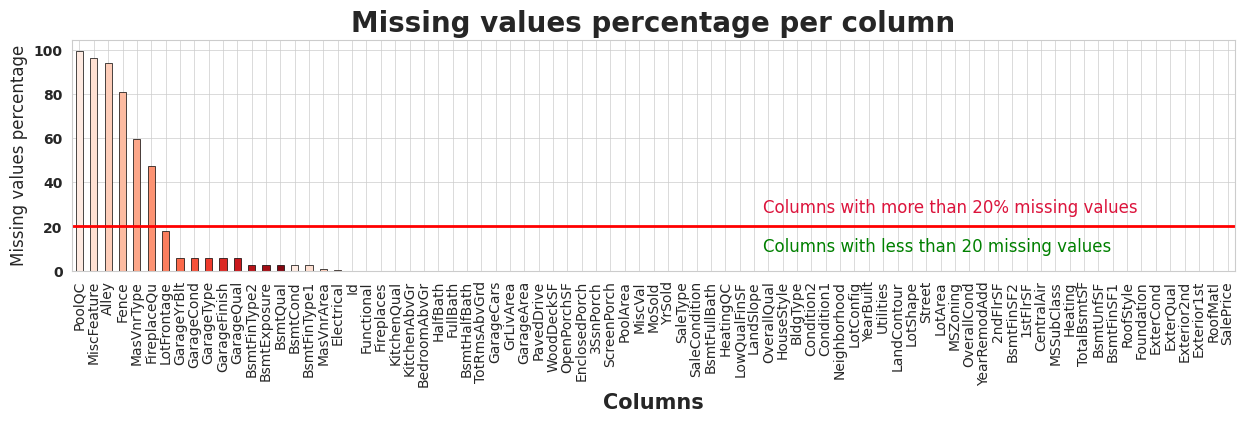

In [99]:
msv1(train, 20, color=sns.color_palette('Reds',15))

In [100]:
# find features with missing  values >20% (these will be dropped)
train_new = train[[col for col in train if train[col].isnull().sum() / len(train) <= 0.2]]
high_mv = []

print(f"high missing values in variables:")
for c in train.columns:
    if c not in train_new.columns:
        high_mv.append(c)
        print(c, end = ', ')

high missing values in variables:
Alley, MasVnrType, FireplaceQu, PoolQC, Fence, MiscFeature, 

We will drop these variables as even if we replace them with "none" it will create a feature with low variance, which is not useful for prediction models.

In [101]:
train = train_new #training dataset now has features which has <20%  missing values
del train['Id']

Features are of following types
1. Continuous  (numerical) e.g GrLivArea
2. Discrete (numerical values but categorical in nature) eg. MSSubClass
3. Discrete (numerical values but numerical in nature) eg. Fireplaces
4. Categorical eg. Neighbourhood 


In [102]:
discrete_num_var= ['MSSubClass','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', 'KitchenAbvGr',
'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'MoSold','YrSold', 'OverallQual', 'OverallCond']

cat_var=['MSZoning','Neighborhood', 'Street', 'LotShape', 'LandContour', 'Utilities',
 'LotConfig', 'LandSlope', 'Condition1', 'Condition2','HouseStyle', 'RoofStyle',
 'RoofMatl', 'Exterior1st', 'Exterior2nd','BldgType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
  'SaleType', 'SaleCondition']

cont_num_var=['LotFrontage','LotArea','YearBuilt',
 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
 'LowQualFinSF', 'GrLivArea',   'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
 '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

In [103]:
len(discrete_num_var)+len(cat_var)+len(cont_num_var)


73

In [104]:
len(discrete_num_var)+len(cont_num_var)

36

In [105]:
# #create numerical dataypes dataframe

train_num = train.select_dtypes(include = ['float64', 'int64'])

train_num.shape #37 = 36 + 1 (saleprice)

(1460, 37)

## Data Visualization
Now having variables separated as numerical and categorical.
First let us see corelations between numerical features and saleprice and explore further

In [106]:
#check correlation of Saleprice with all numerical features
train_num_corr = train_num.corr()['SalePrice'][:-1] # slicing by -1 to exclude corelation of Saleprice by itself

In [107]:
threshold = 0 #can change value to eliminate some features if needed

best_features = abs(train_num_corr[abs(train_num_corr) > threshold]).sort_values(ascending=True)

# print("SalePrice has high corelation with {} features :\n{}".format(len(best_features), best_features))

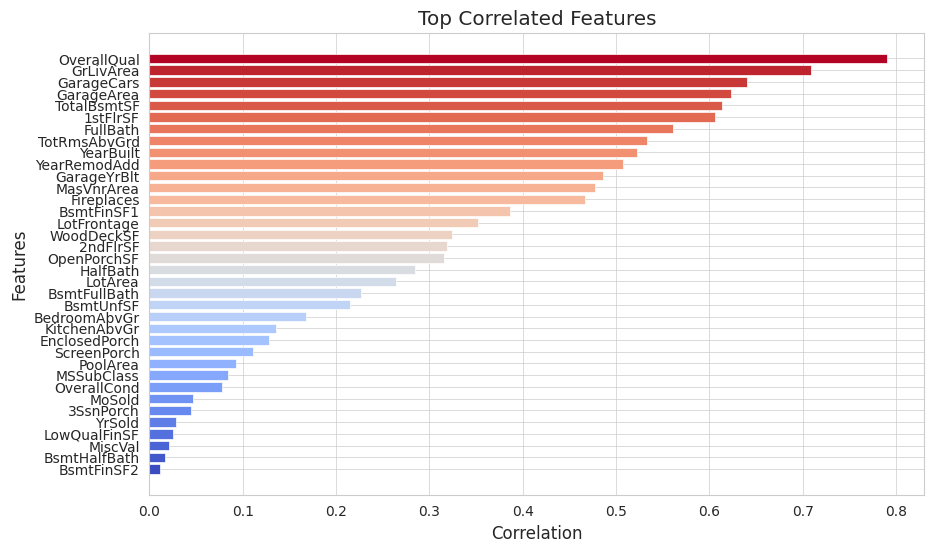

In [108]:
plt.figure(figsize=(10, 6))  # Set the figure size
colors = plt.cm.coolwarm(np.linspace(0, 1, len(best_features)))
plt.barh(best_features.index, abs(best_features.values), color=colors)
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('Top Correlated Features')
plt.show()

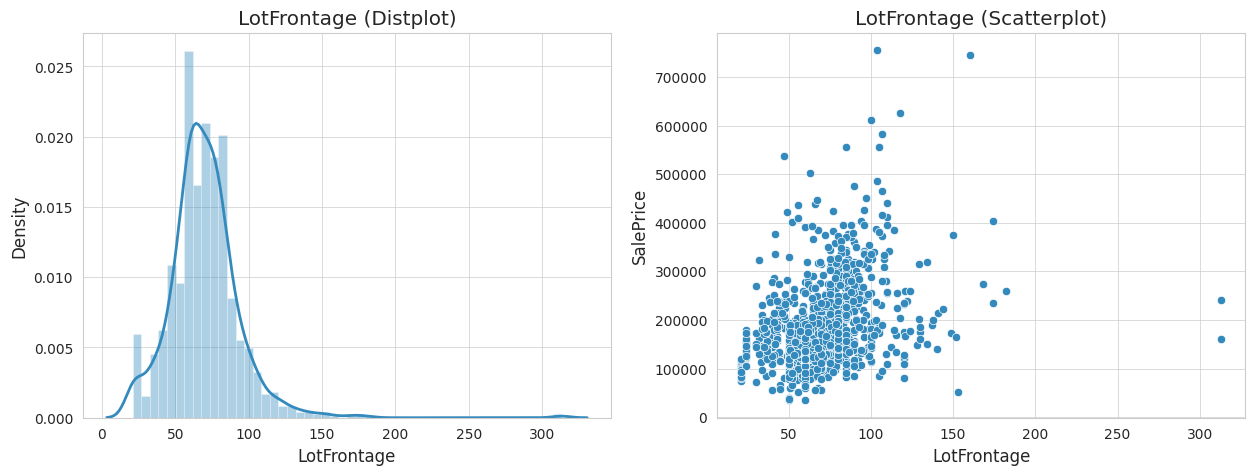

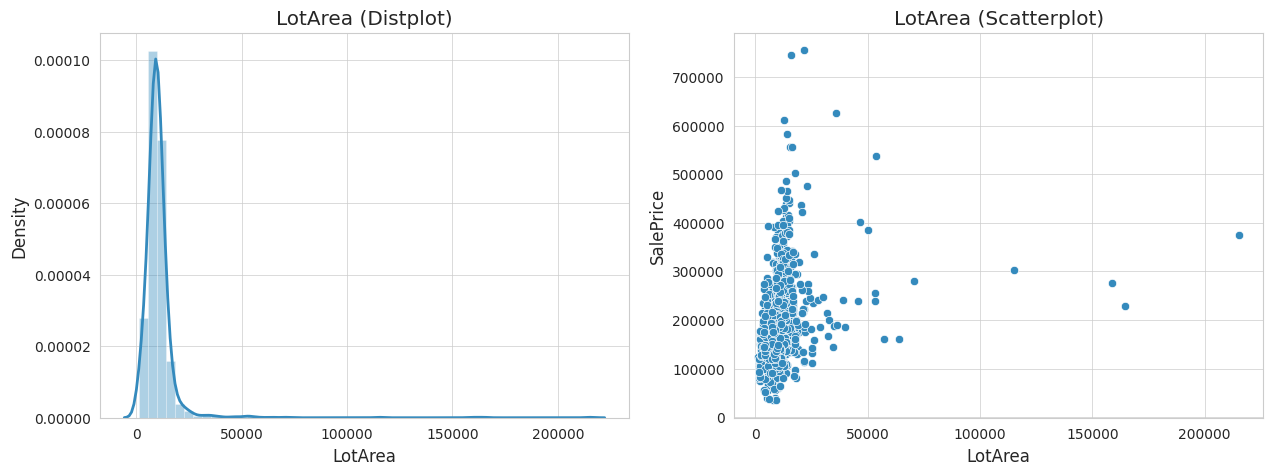

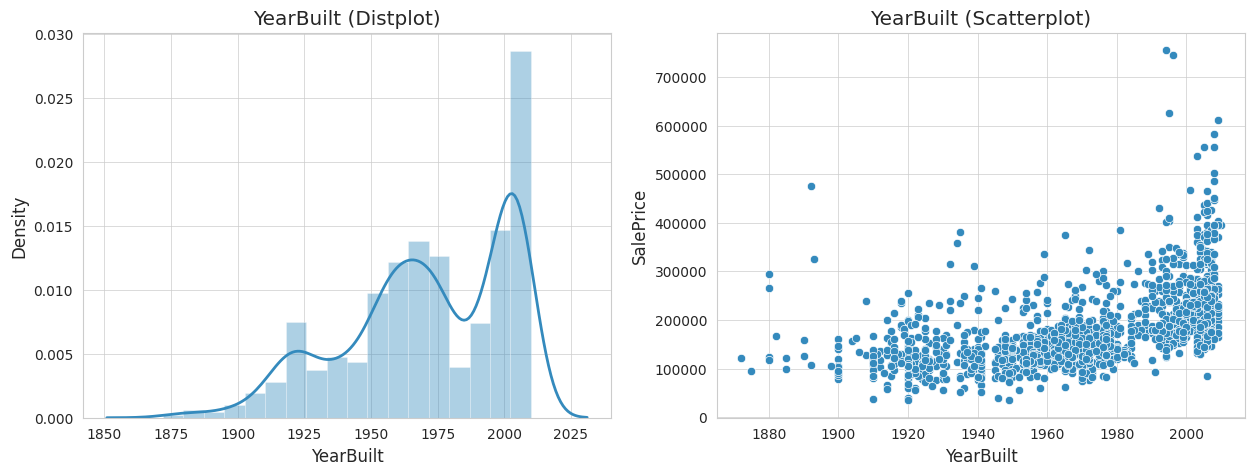

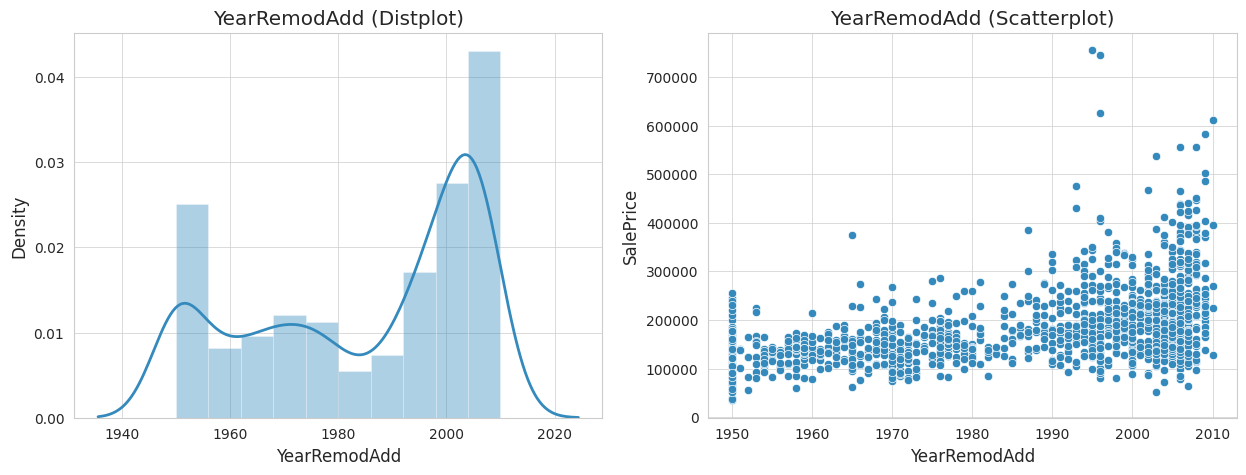

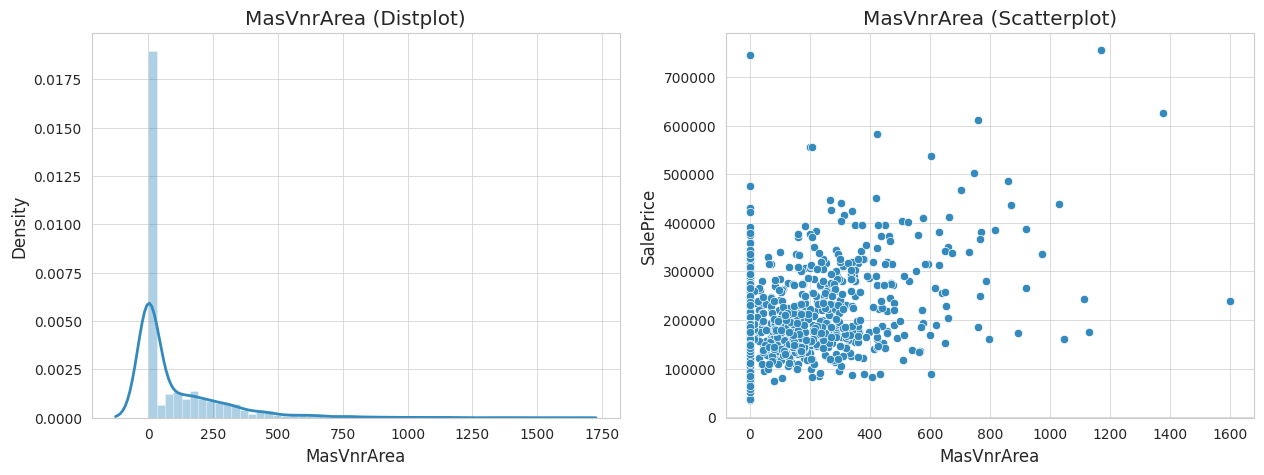

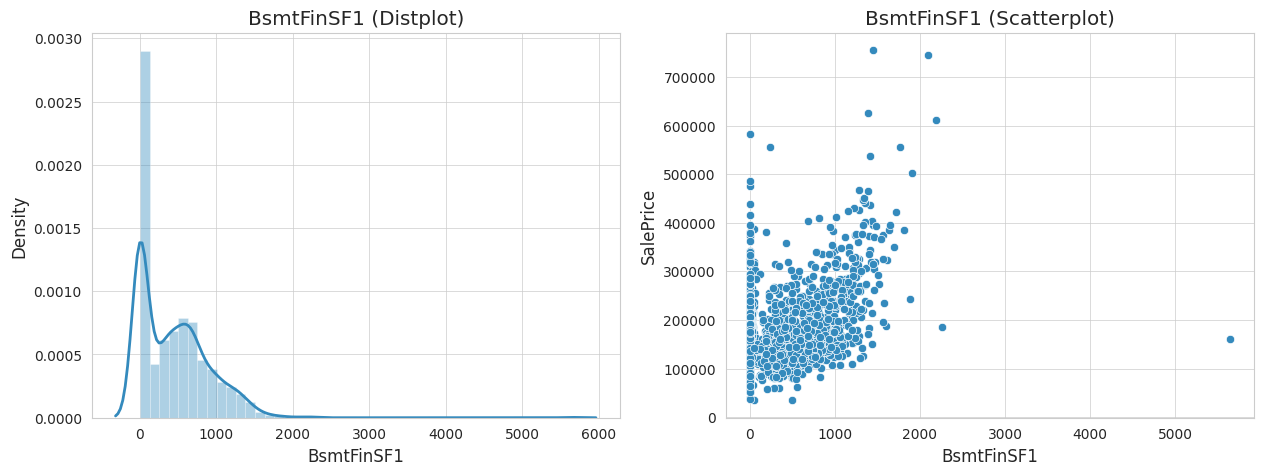

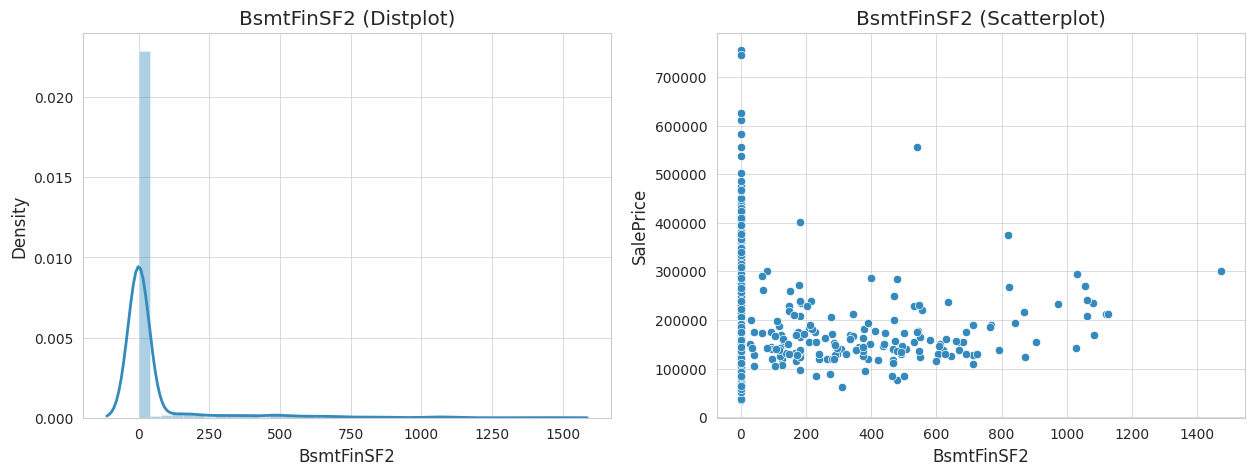

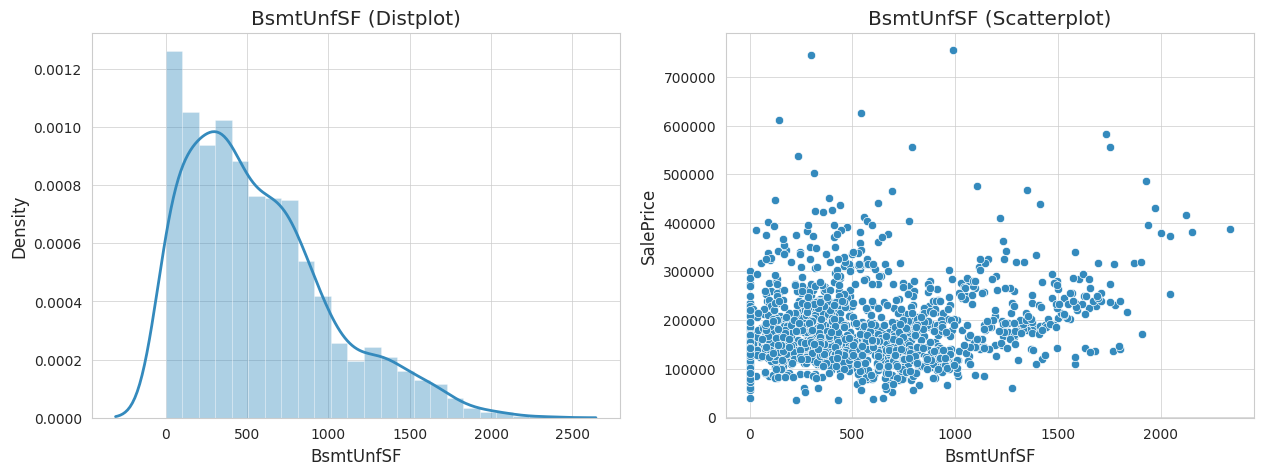

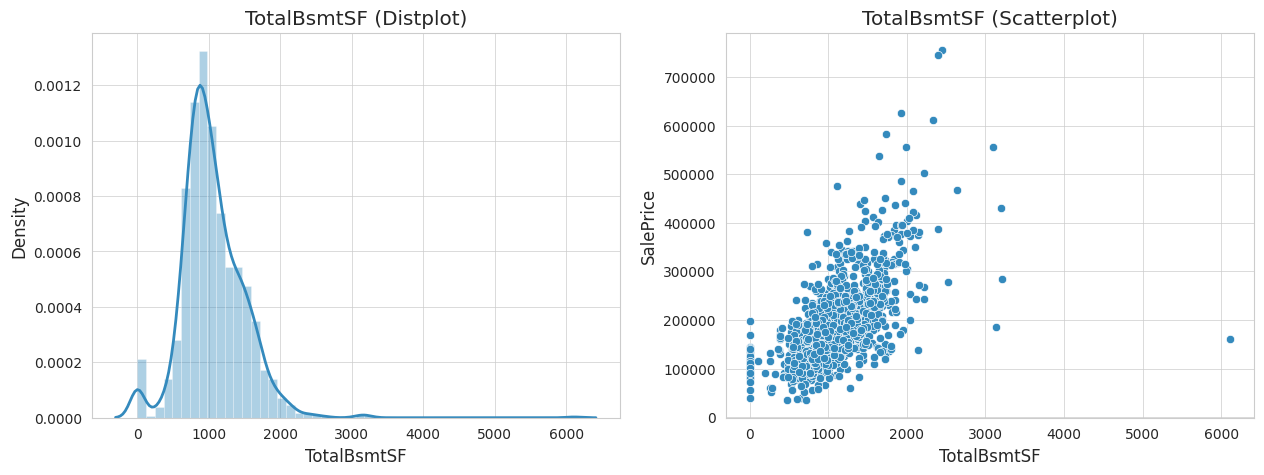

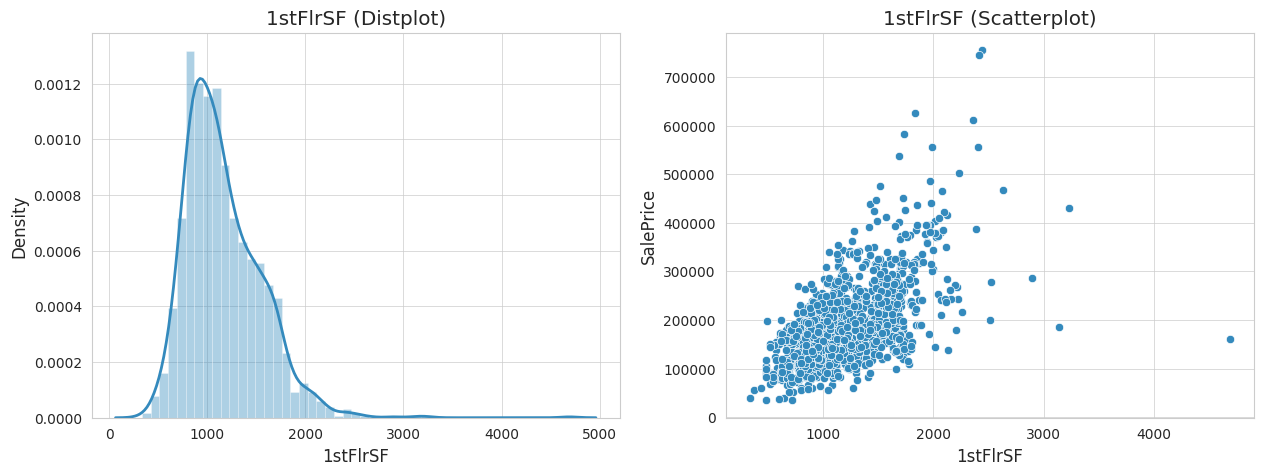

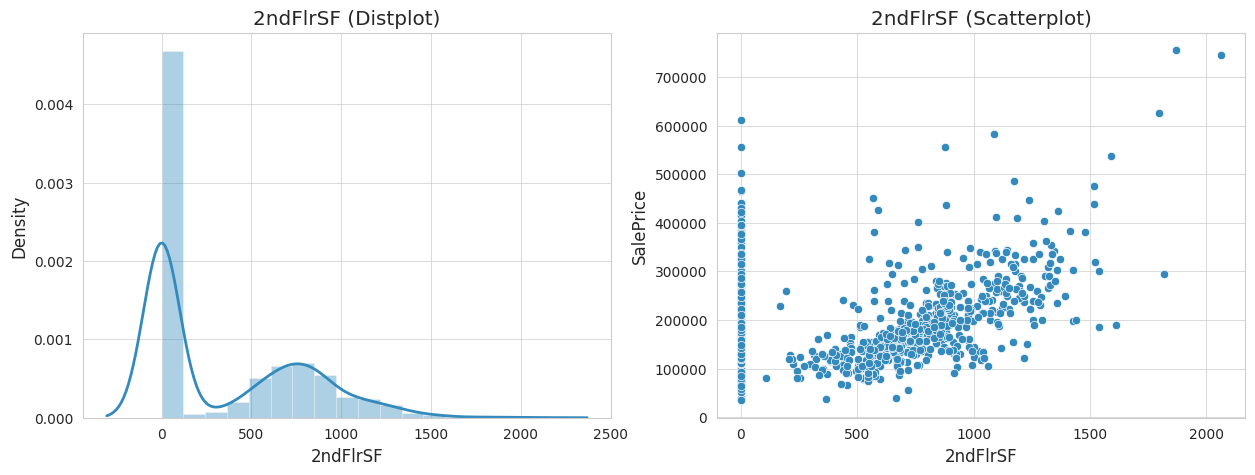

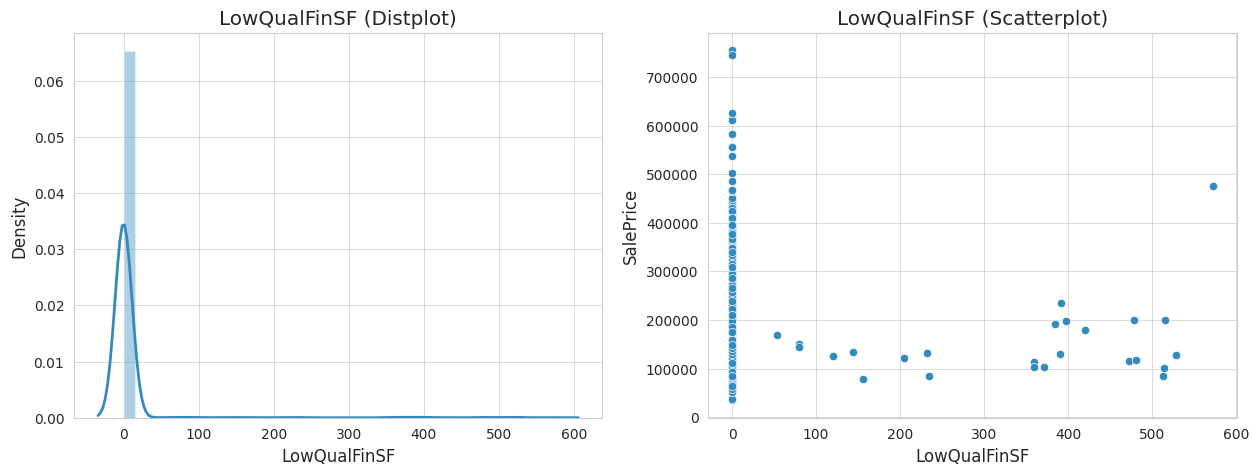

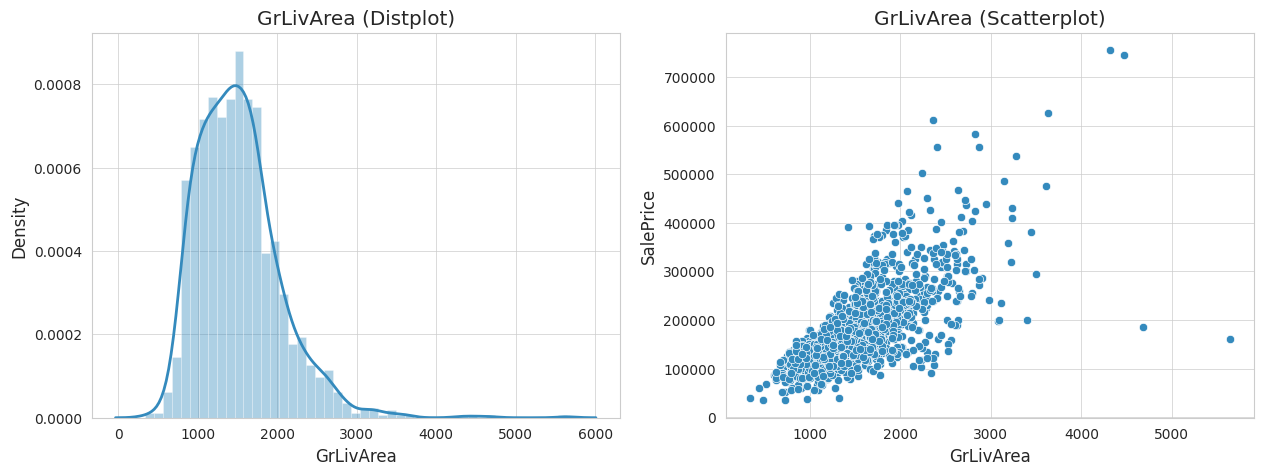

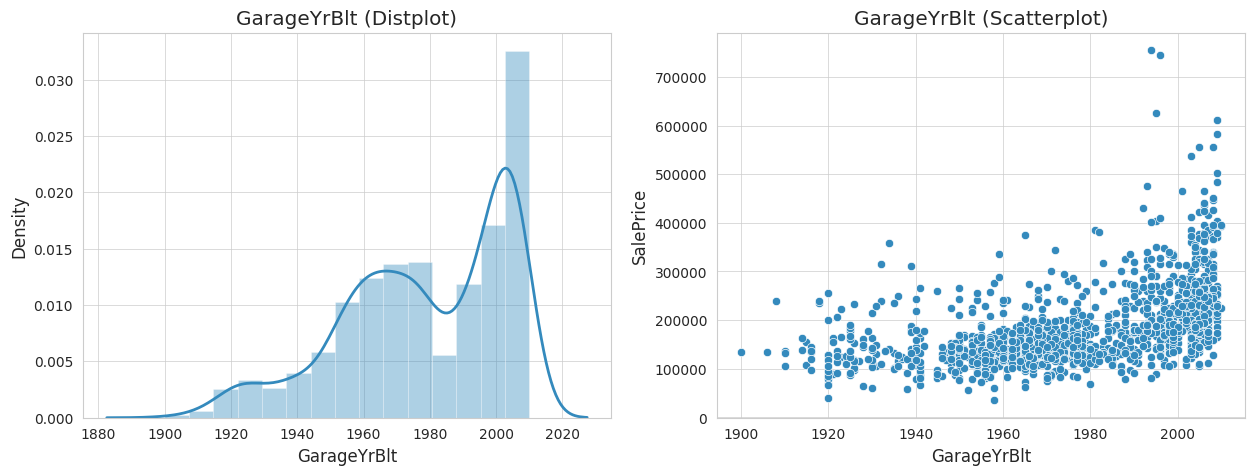

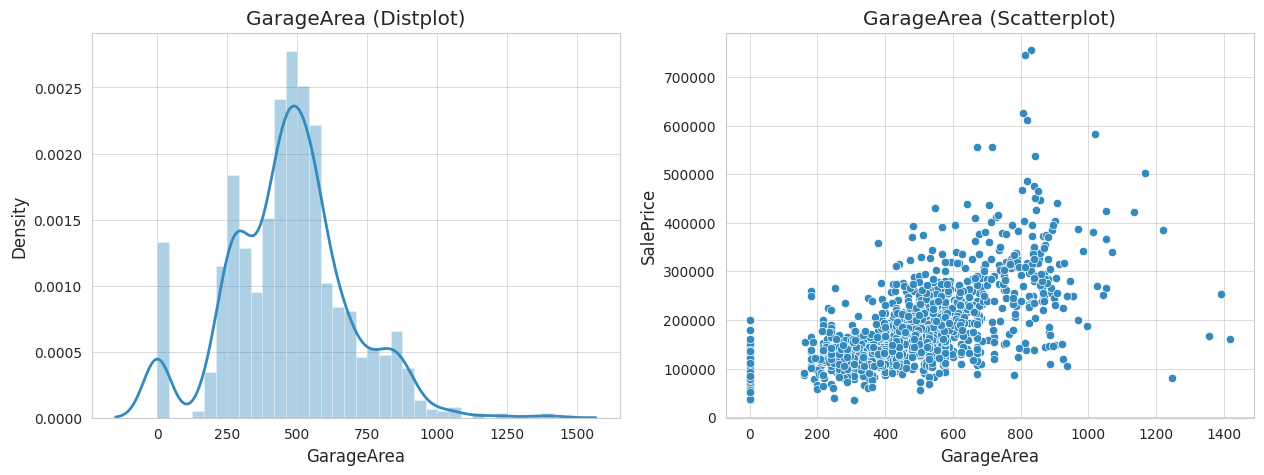

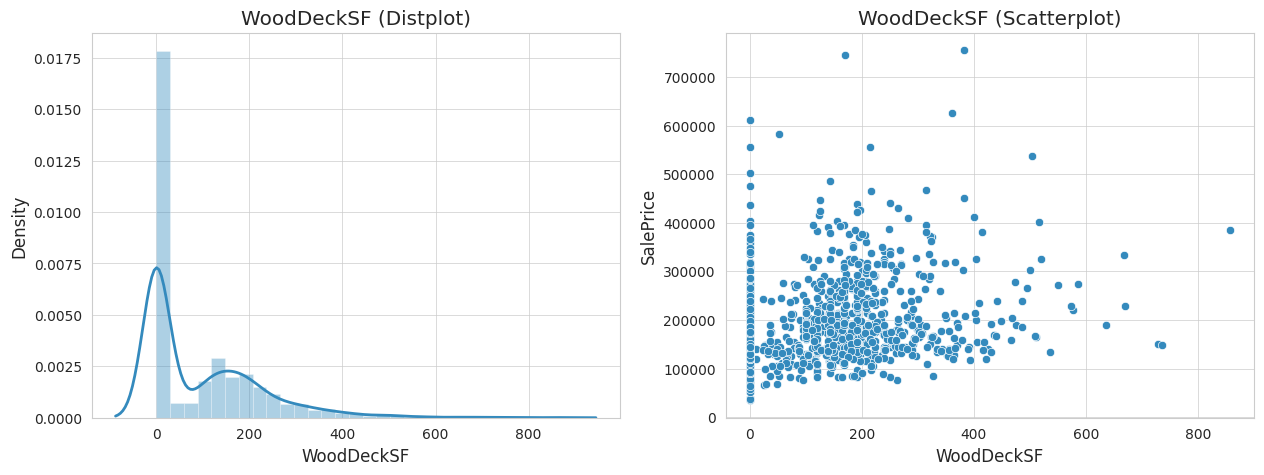

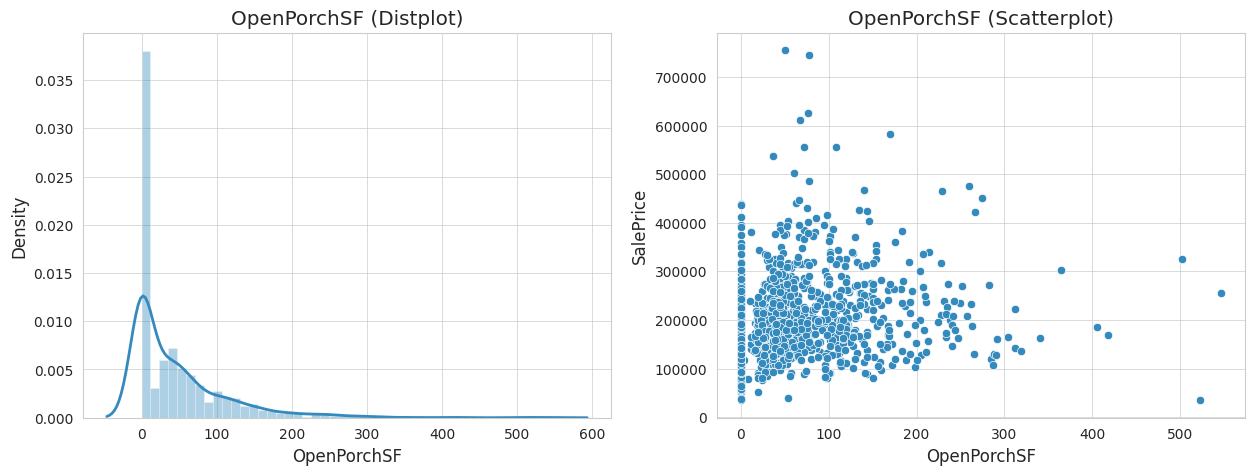

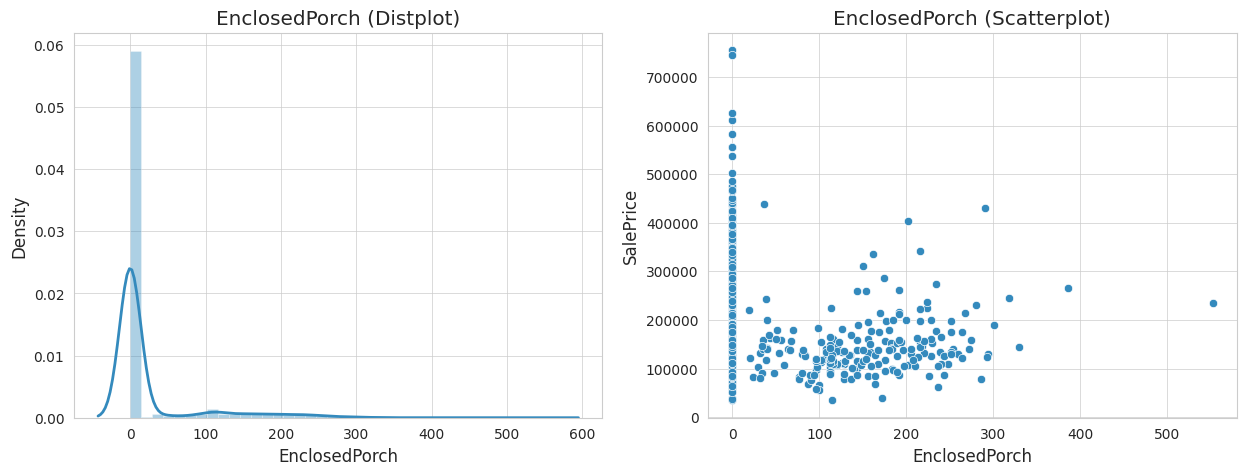

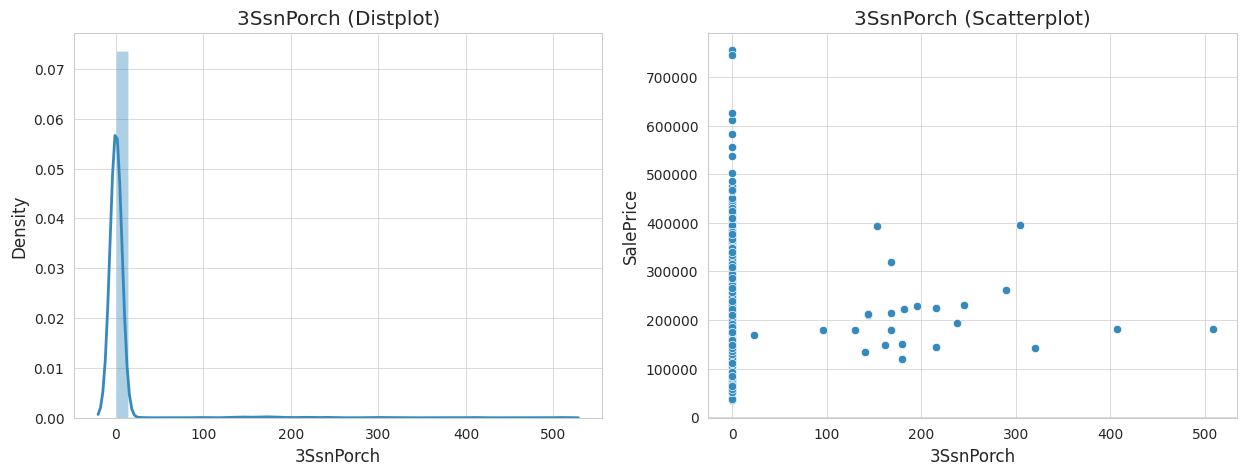

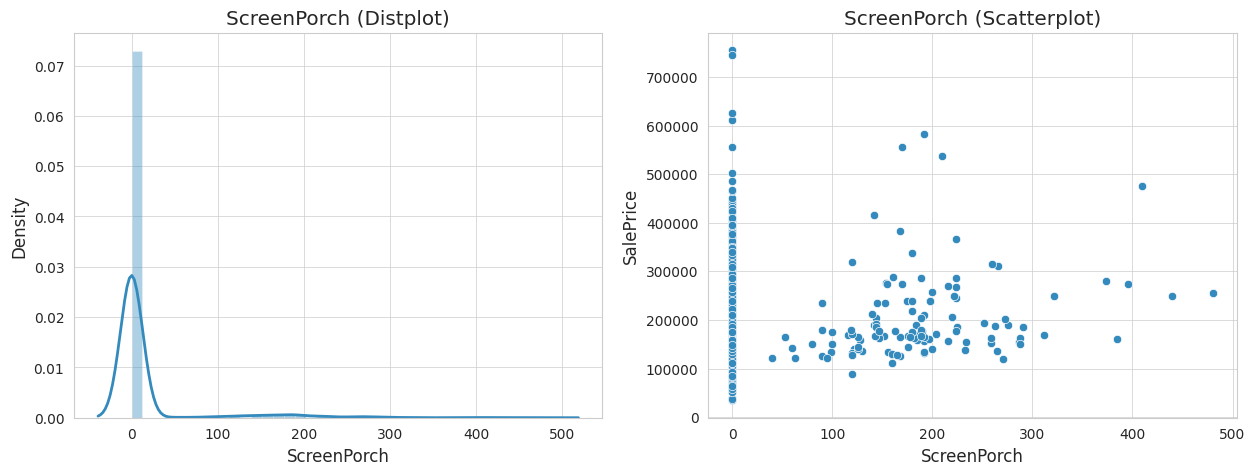

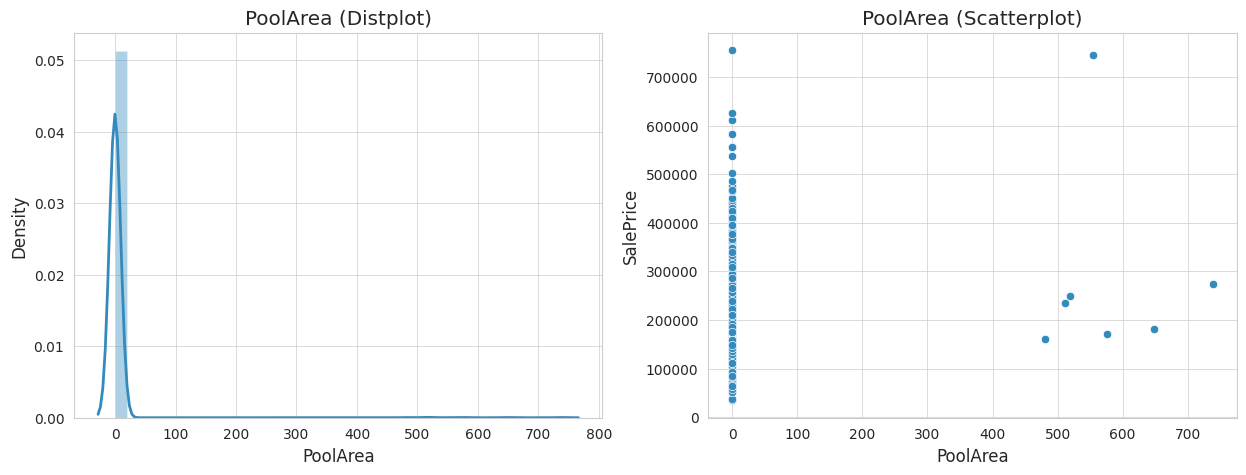

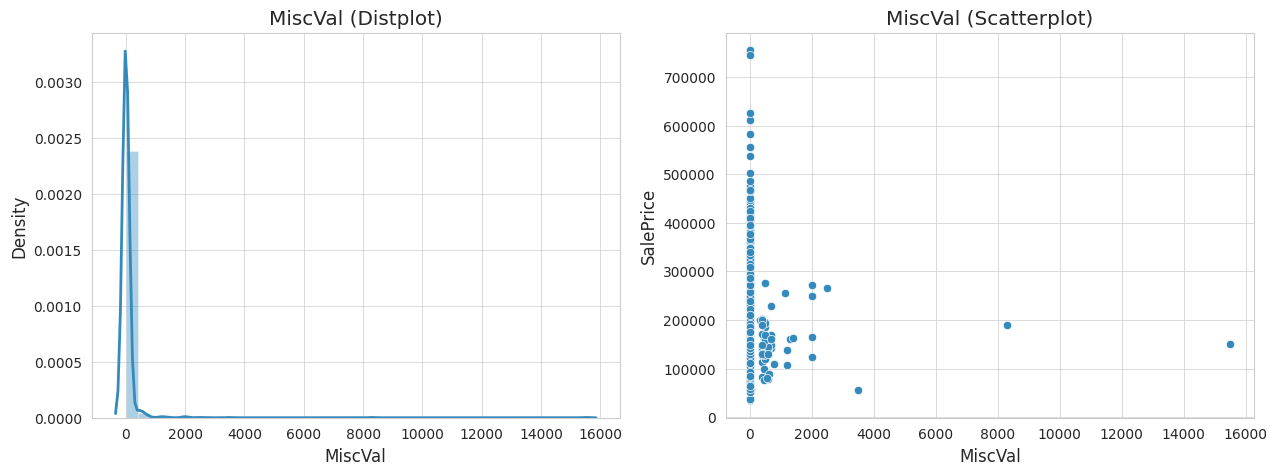

In [109]:
#plot Saleprice vs Continuous Numerical Features 

for i in cont_num_var:
    fig, axes = plt.subplots(1,2, figsize=(15, 5))
    axes[0].set_title(i+' (Distplot)')
    sns.distplot(train[i], ax=axes[0])
    axes[1].set_title(i+' (Scatterplot)')
    sns.scatterplot(y=train['SalePrice'], x=train[i], ax=axes[1])

Numeric attributes aren't normally distributed.
Some outliers are likely to be existing affecting spread and need to be handled

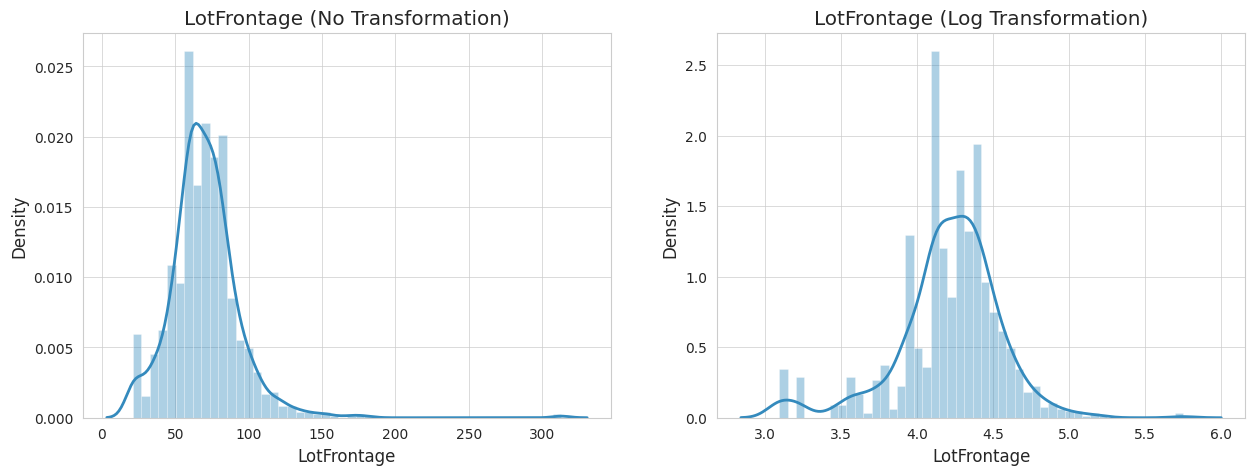

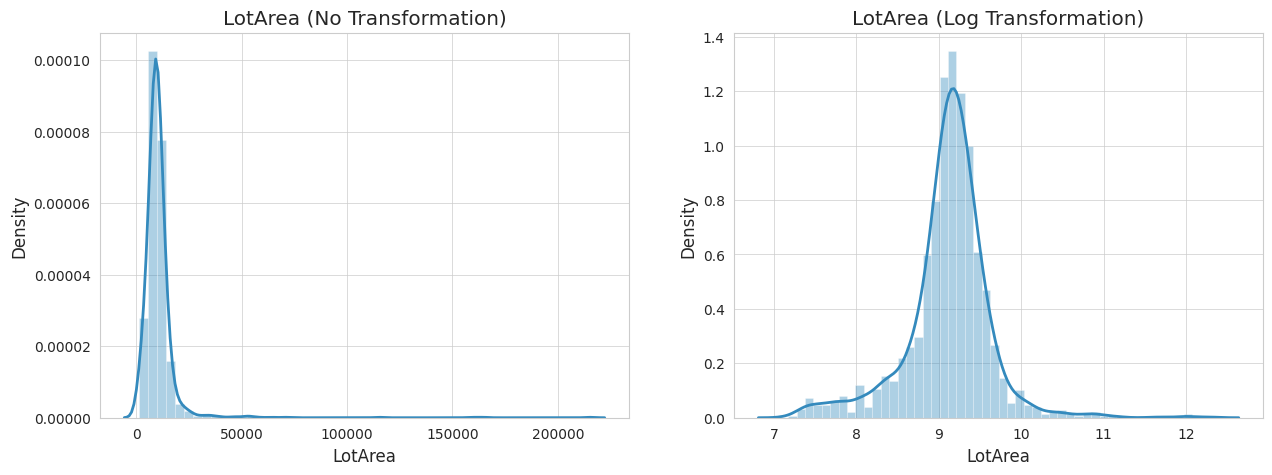

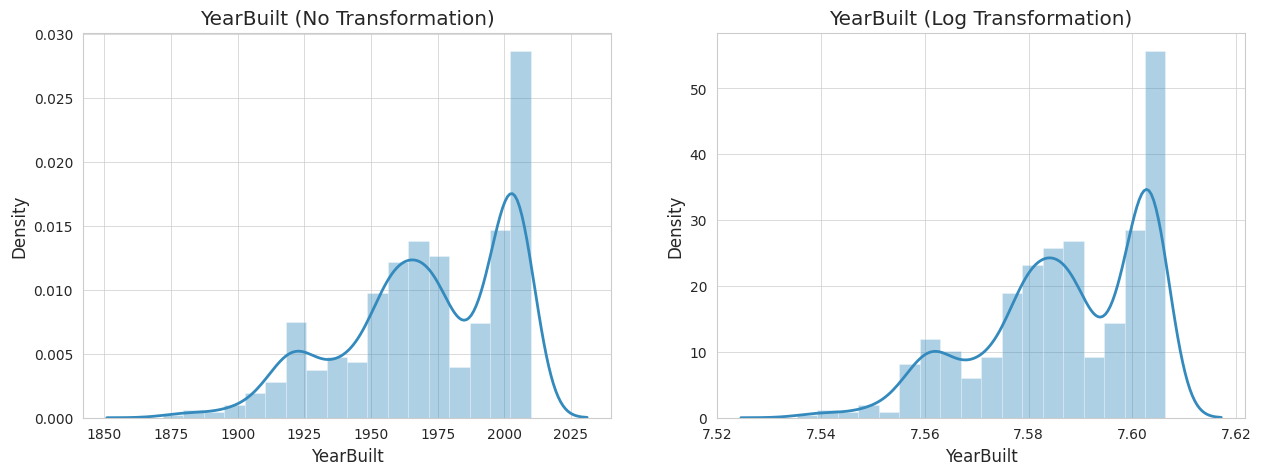

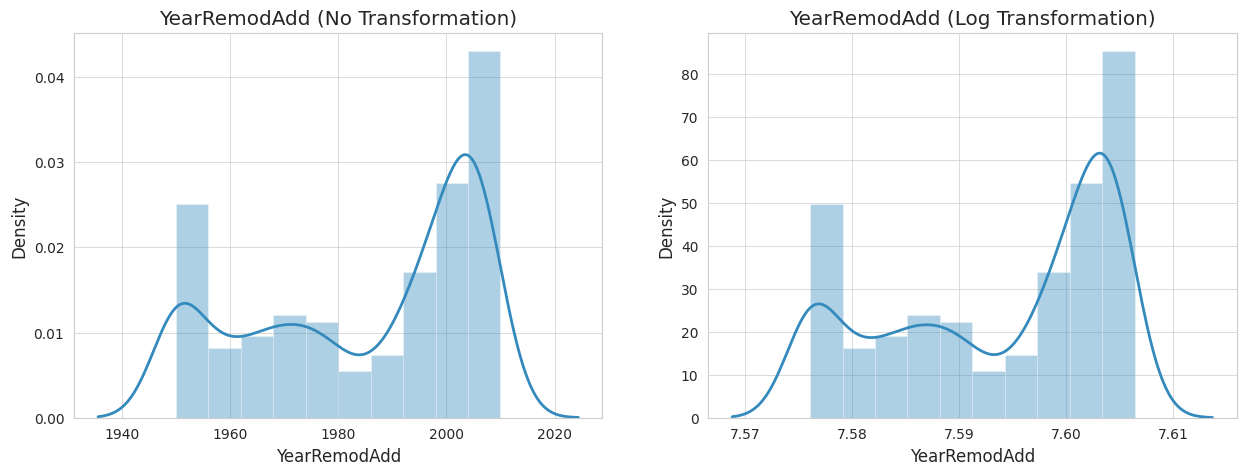

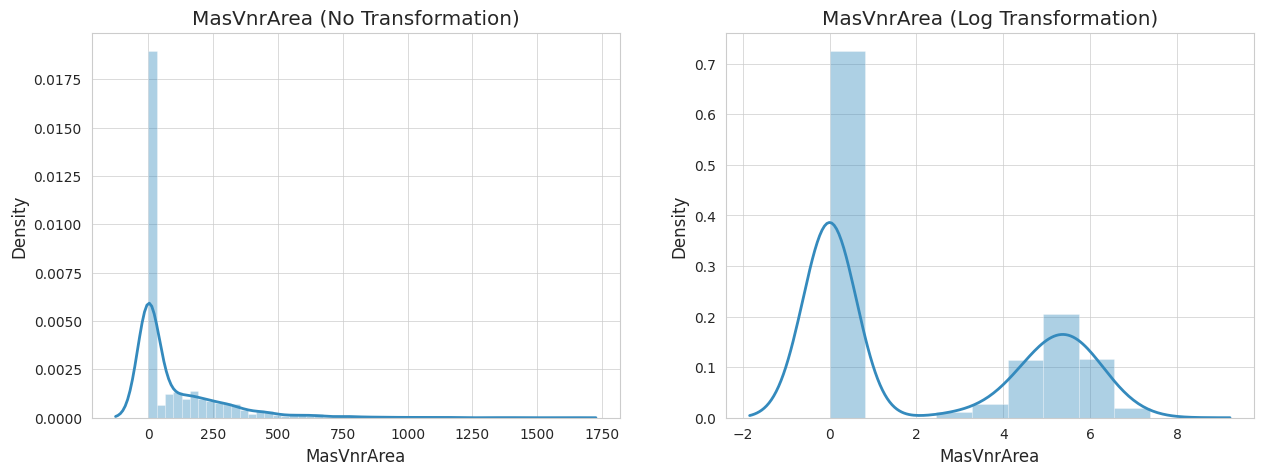

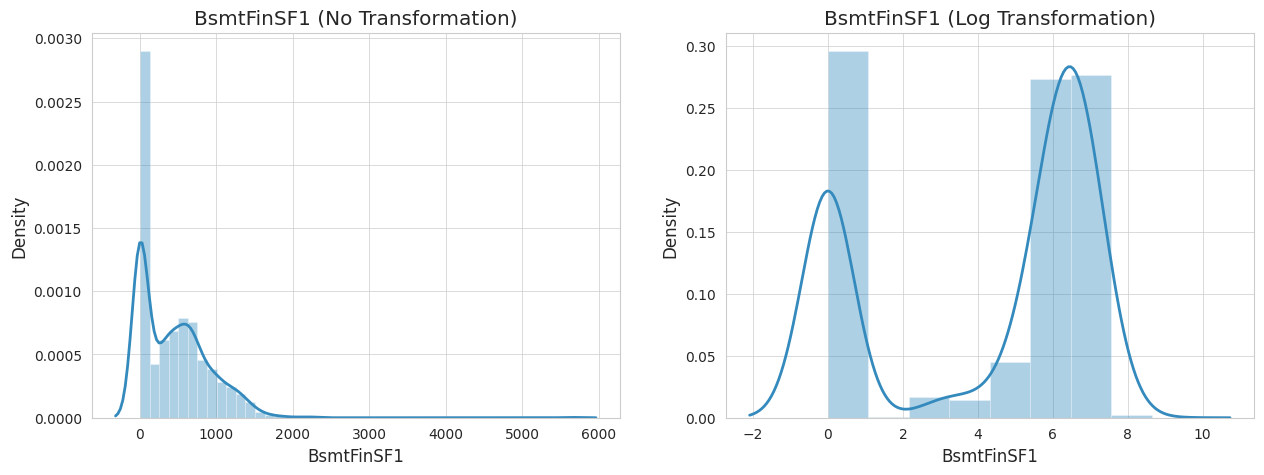

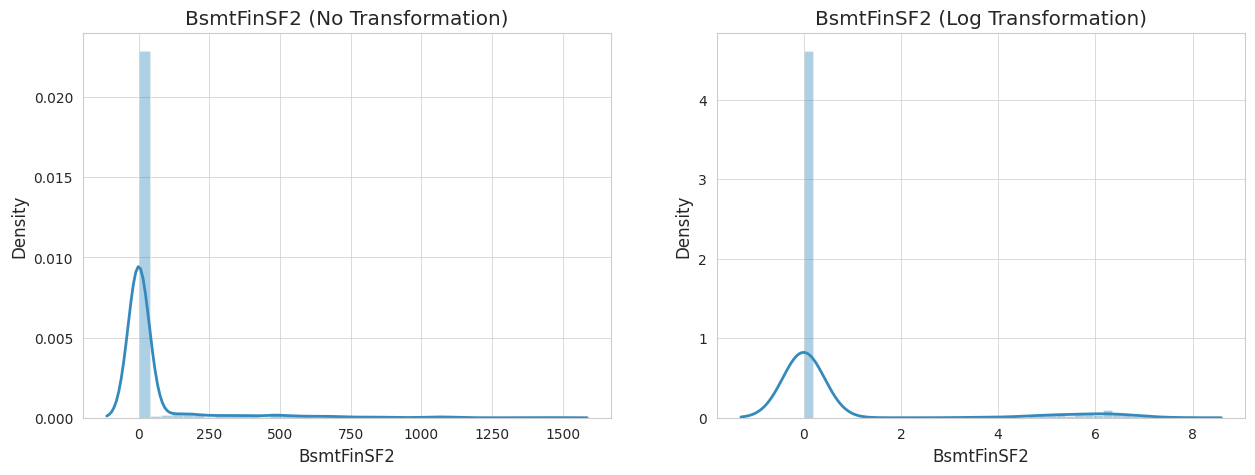

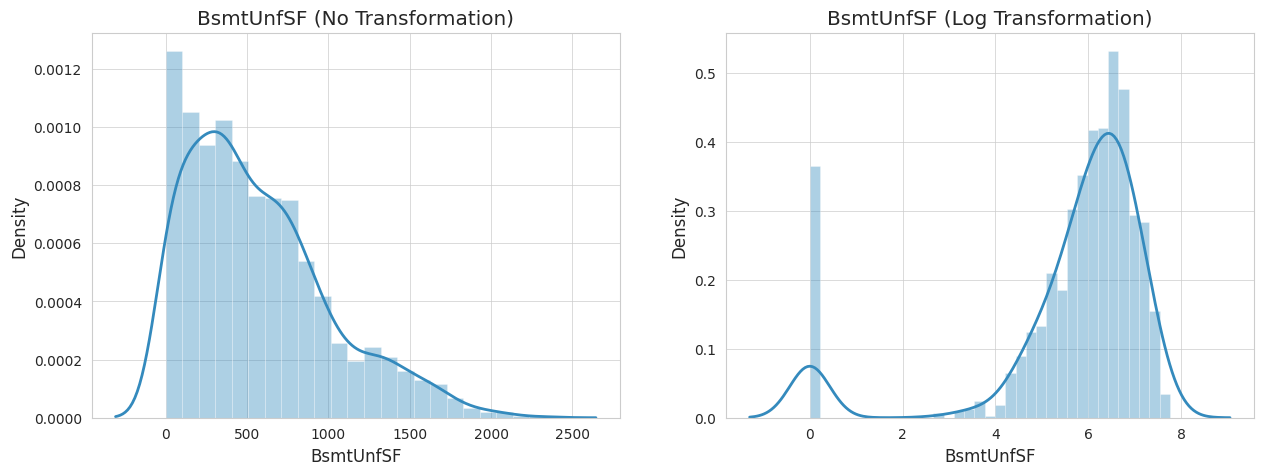

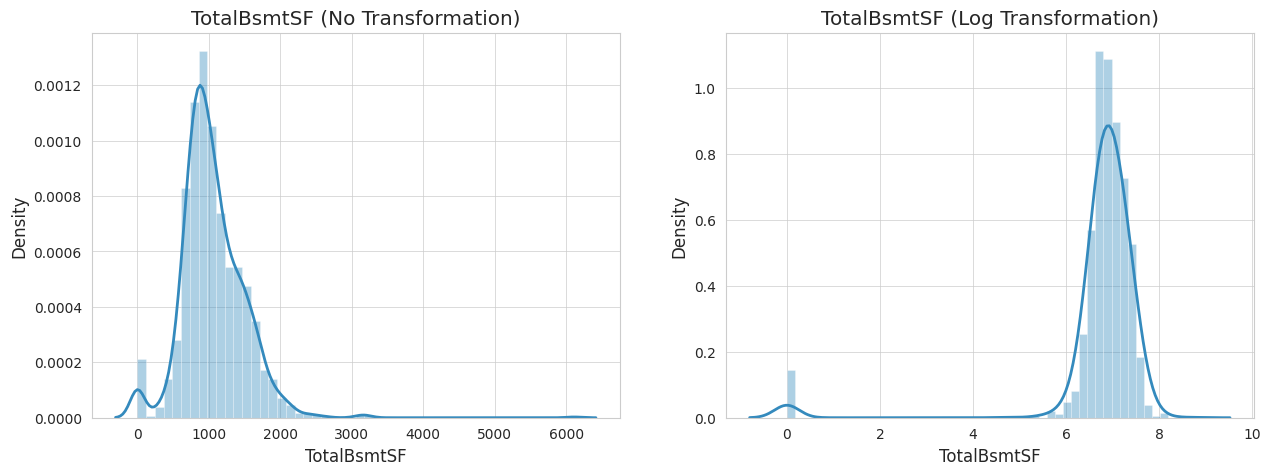

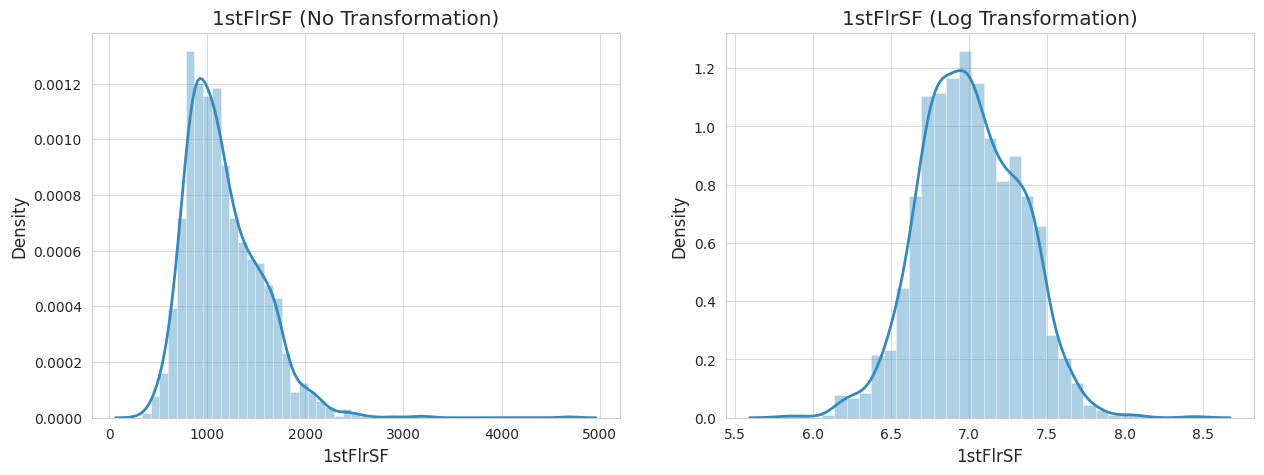

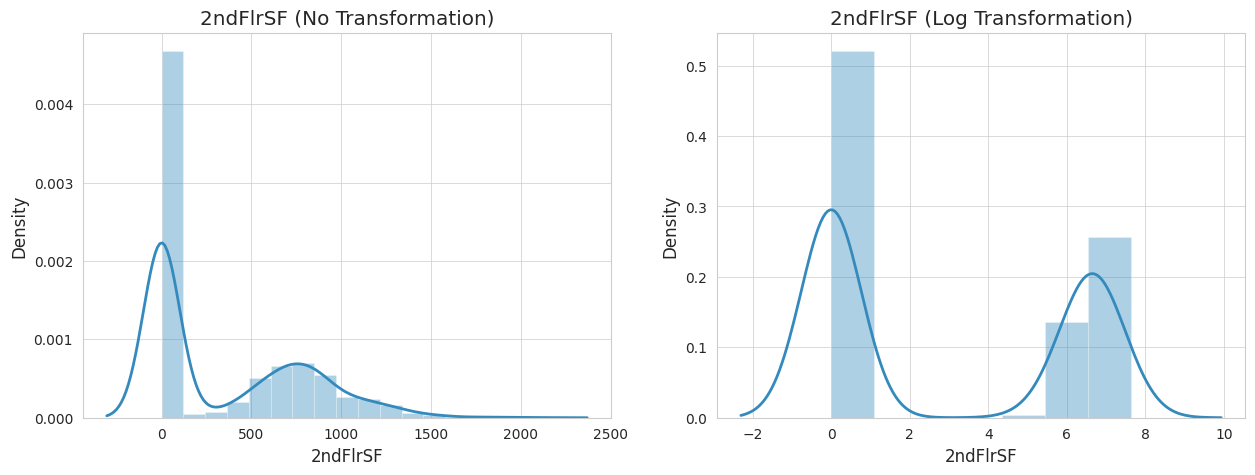

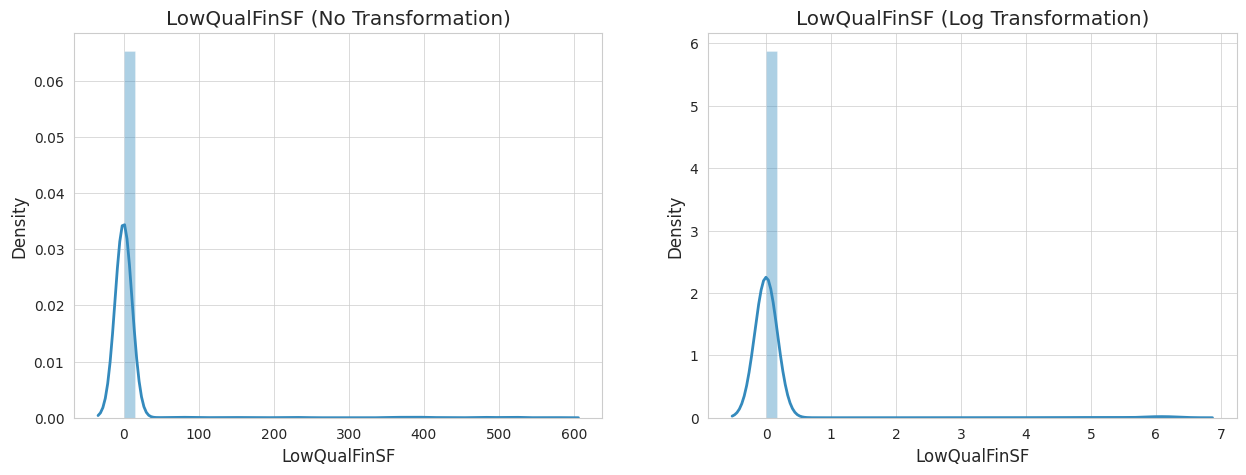

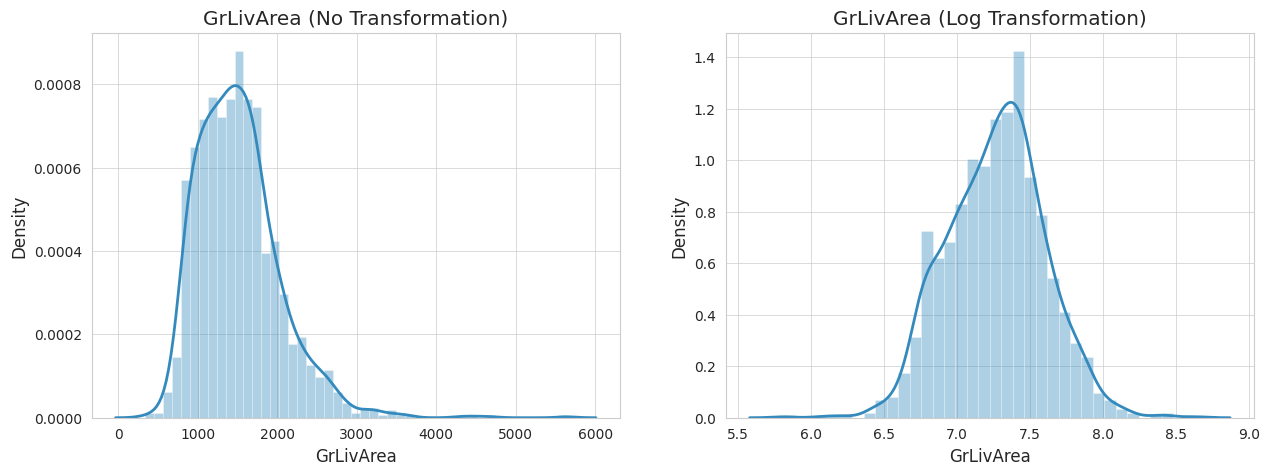

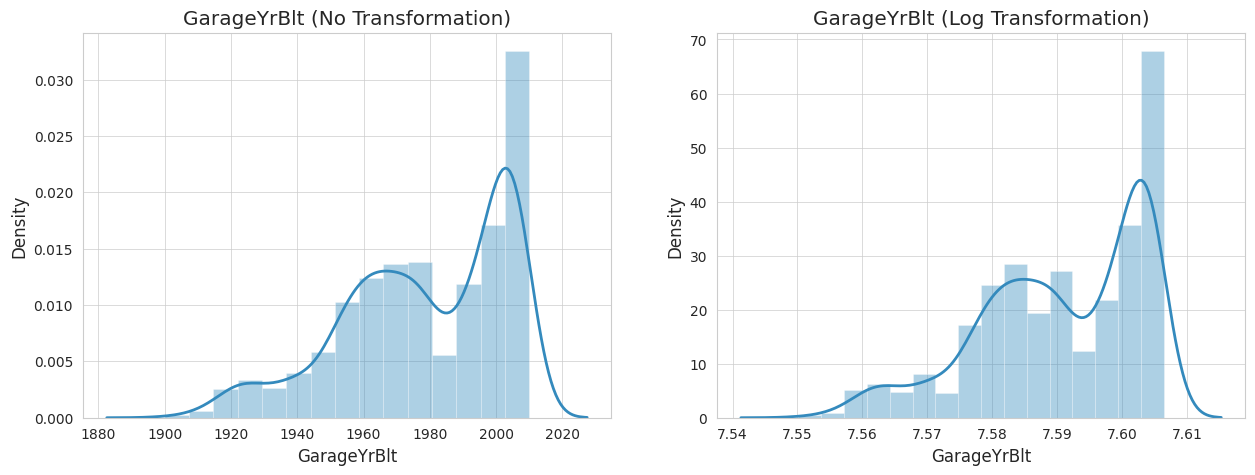

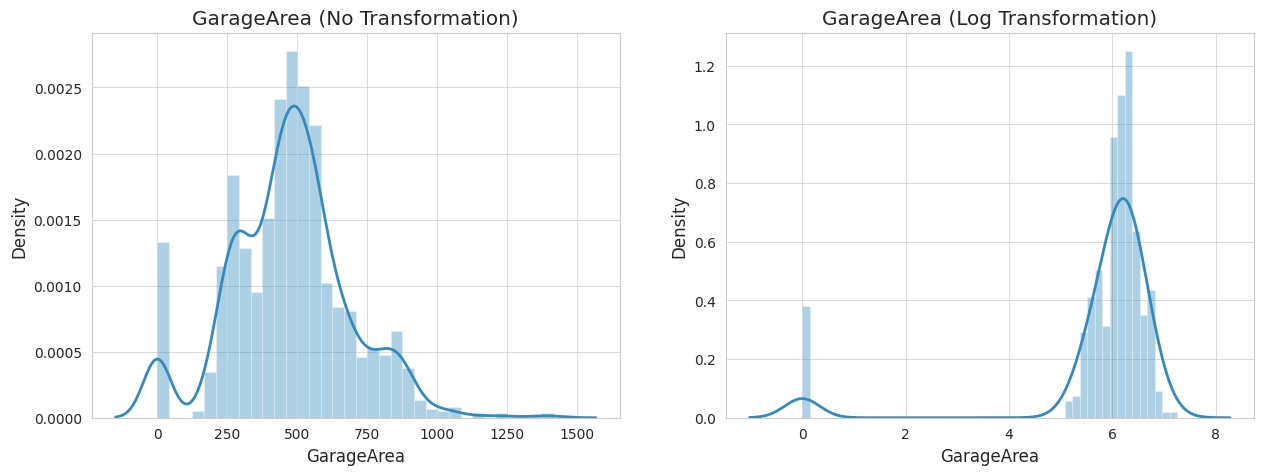

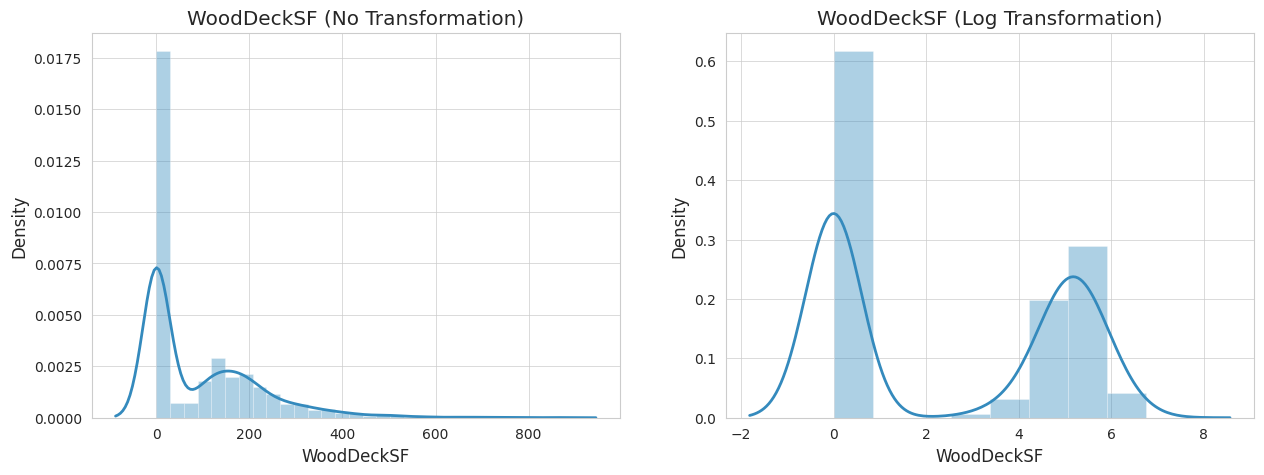

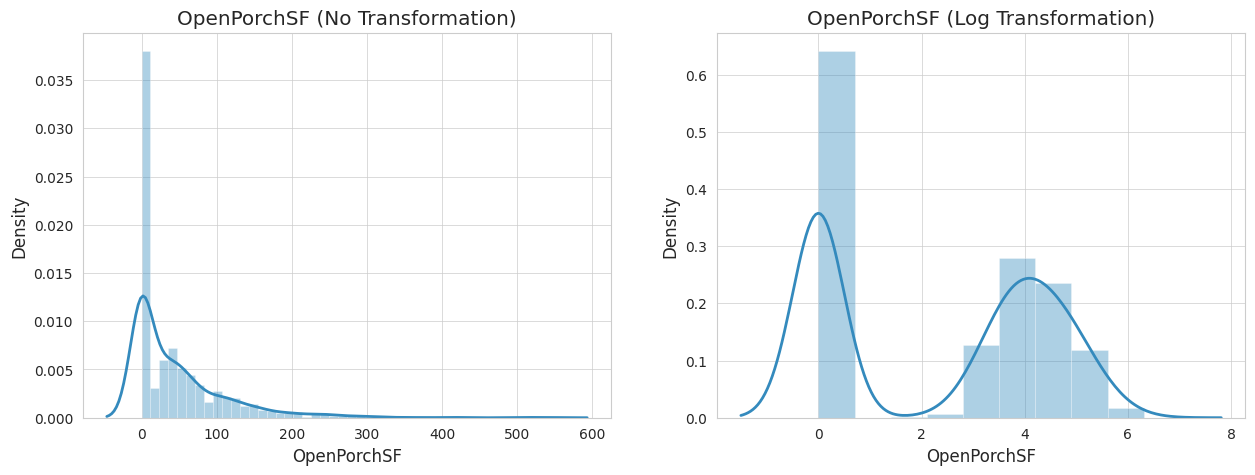

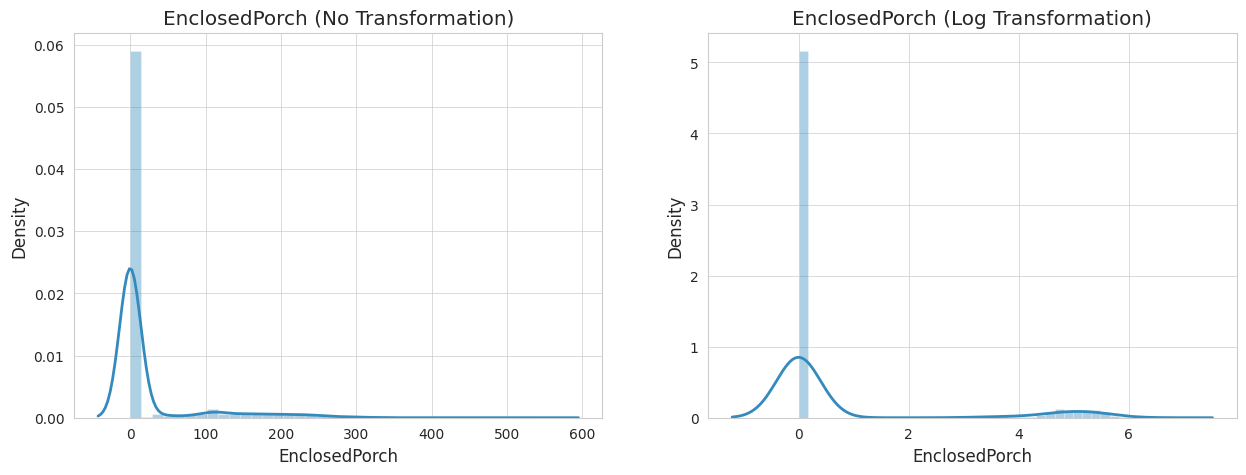

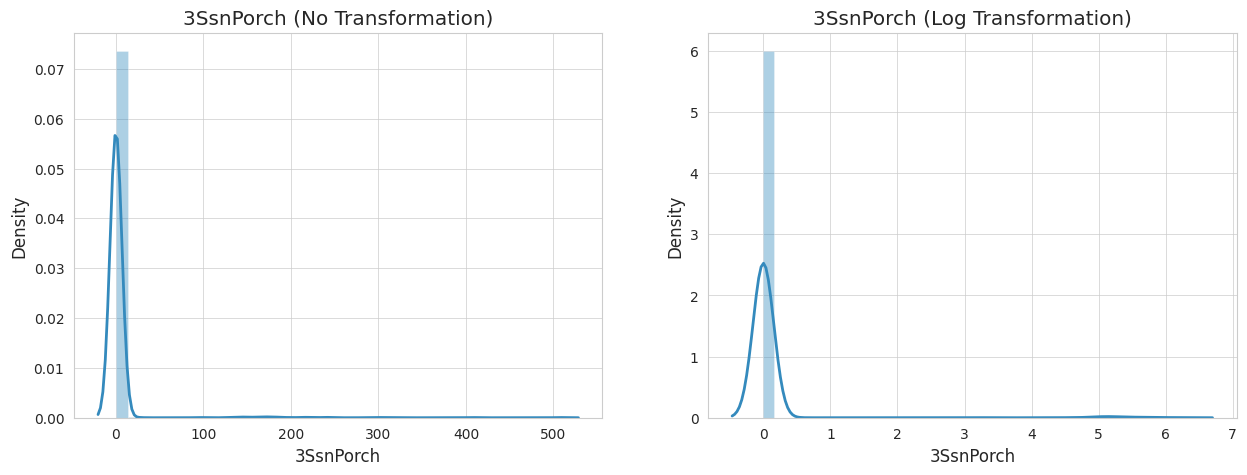

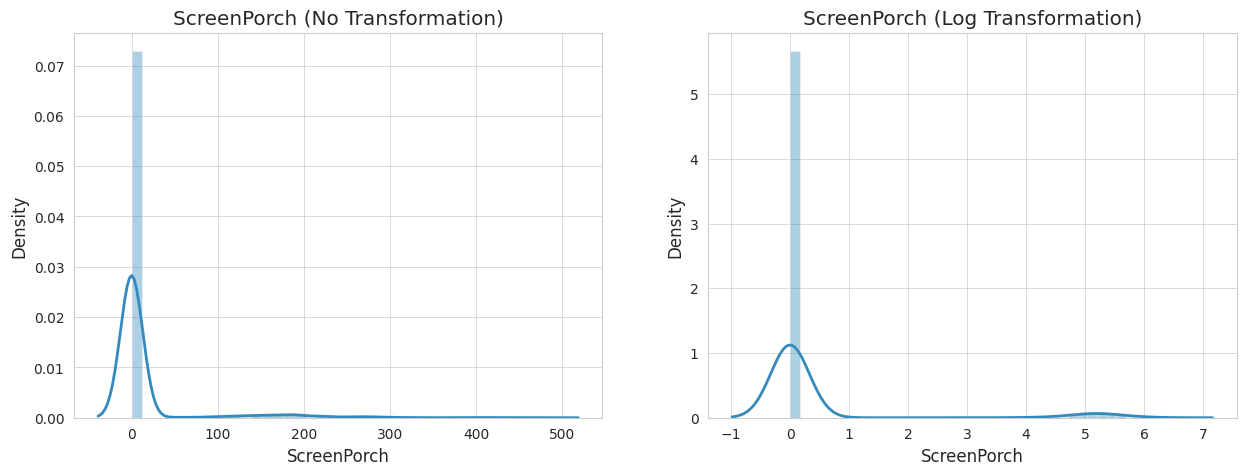

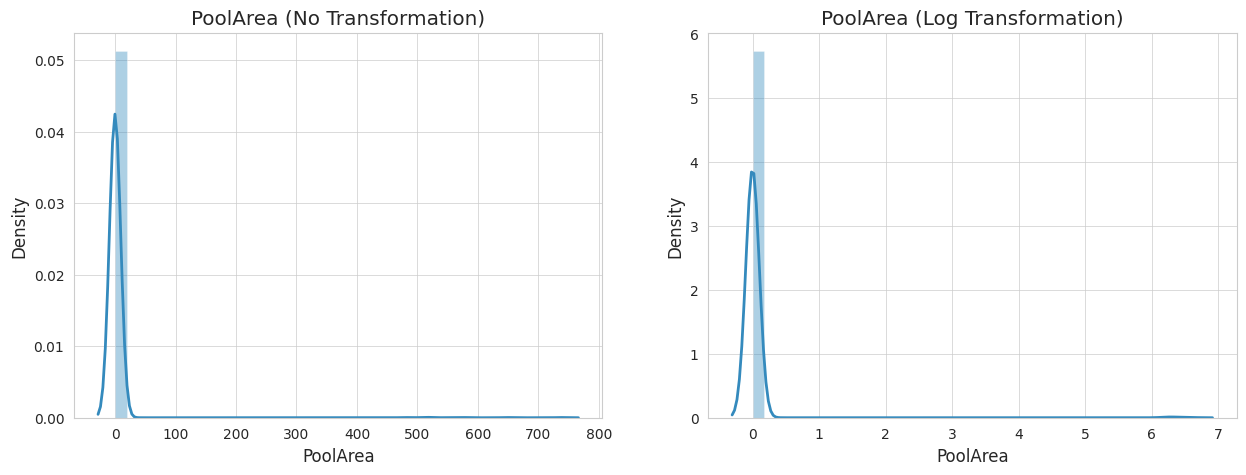

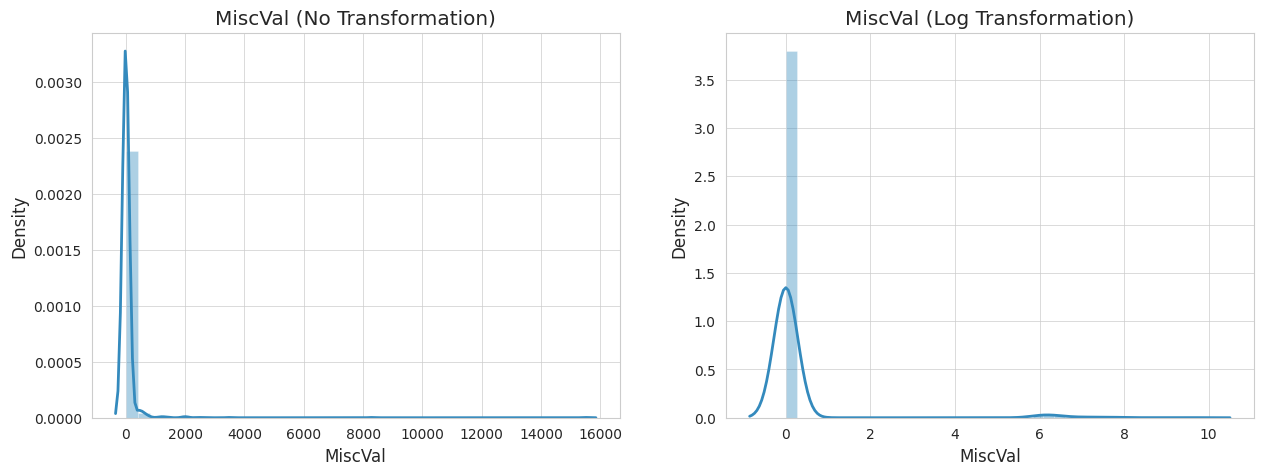

In [110]:
for i in cont_num_var:
    fig, axes = plt.subplots(1,2, figsize=(15, 5))
    axes[0].set_title(i+' (No Transformation)')
    sns.distplot(train[i], ax=axes[0])
    axes[1].set_title(i+' (Log Transformation)')
    sns.distplot(np.log1p(train[i]), ax=axes[1])

# cols = ['LotFrontage', 'LotArea', '1stFlrSF', GrLivArea'] show normal distribution on transformation

Thus some features are showing Normal distribution post log transform, this will be useful while feature selection and feature engineering

**Sale Price vs Ground Living Area** (a highly corelated variable)

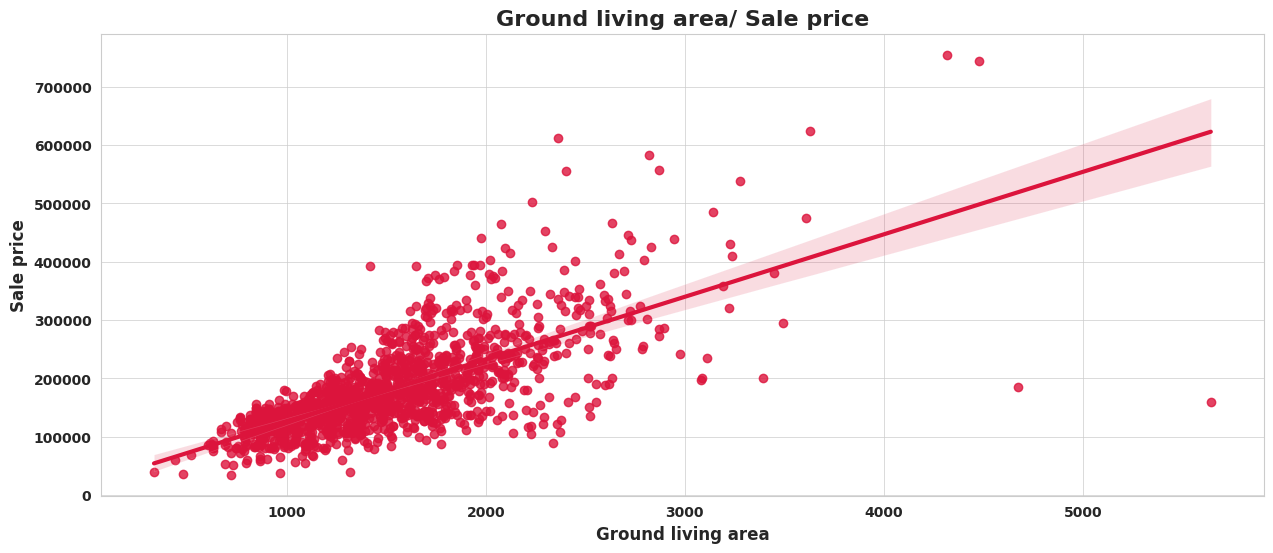

In [111]:
plt.figure(figsize=(15,6))
sns.regplot(x=train_num['GrLivArea'], y=train_num['SalePrice'], color='crimson')
plt.title('Ground living area/ Sale price', weight='bold', fontsize=16)
plt.xlabel('Ground living area', weight='bold', fontsize=12)
plt.ylabel('Sale price', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

By observation, **YrSold** has low corelation with SalePrice if used in plot as given, but it might not reflect reality, so we will check its plot with data by grouping across year,month and plotting the median price

In [112]:
#grouping by median saleprice across year and month and recheck, corelation
xdmd=train.groupby(['YrSold', 'MoSold'], as_index=False)['SalePrice'].median()
xdmd.corr()['SalePrice'][:-1]

YrSold   -0.332588
MoSold    0.401796
Name: SalePrice, dtype: float64

**Year Sold and Built**

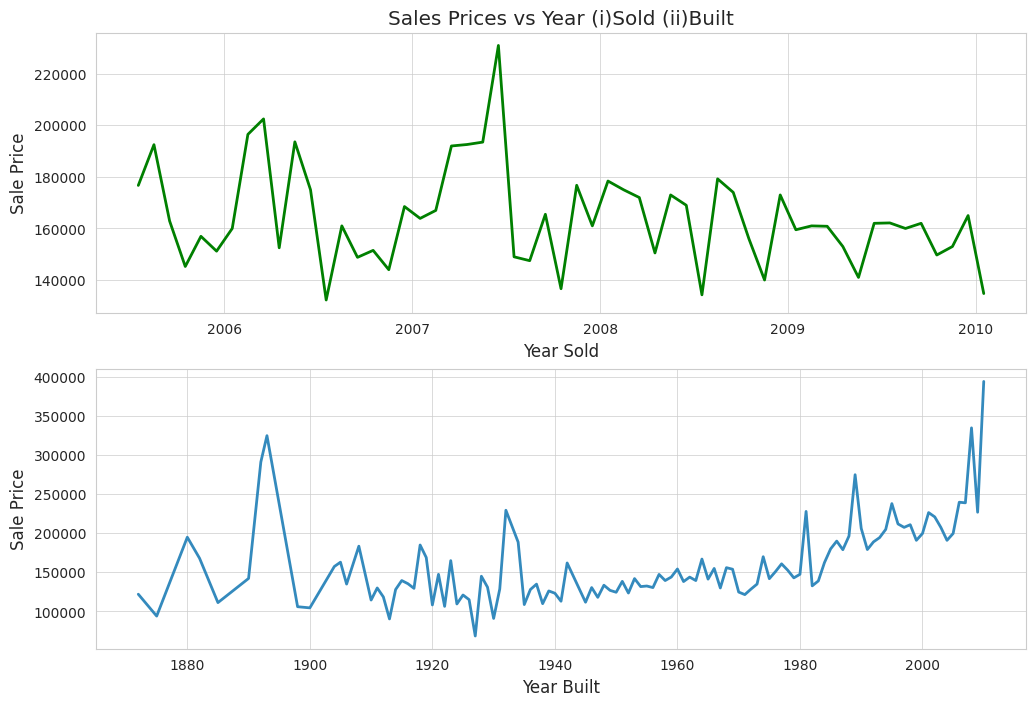

In [113]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
axes[0].set_title('Sales Prices vs Year (i)Sold (ii)Built')

xdmd=train.groupby(['YrSold', 'MoSold'], as_index=False)['SalePrice'].median()
axes[0].plot(xdmd.index, xdmd.SalePrice, color='green')
axes[0].set_xlabel('Year Sold')
axes[0].set_ylabel('Sale Price')
axes[0].set_xticks([5.5, 17.5, 29.5, 41.5, 53.5])
axes[0].set_xticklabels([2006, 2007, 2008, 2009, 2010])


xdmdb=train.groupby('YearBuilt')['SalePrice'].median()
axes[1].plot(xdmdb.index,xdmdb)
axes[1].set_xlabel('Year Built')
axes[1].set_ylabel('Sale Price');



> a. House prices increased from late 2006 to late 2007, spiked in December 2007, then dropped sharply in January 2008 due to global financial crisis. Thus, we should not ignore variable with low corelation blindly as seen in this case

> b. After 1925, newer houses tend to sell for higher prices than older houses, likely due to the deterioration of older homes over time.

**2. Overall Quality and Condition**

In [114]:
import plotly.express as px

# Create a scatter 3D plot using Plotly
fig = px.scatter_3d(train, x='OverallQual', y='OverallCond', z='YearBuilt',
              title='Quality, Condition and Year Built')
fig.update_layout(width=800, height=600, title_x =0.5)  
fig.show()

> a. Quality and Condition are not linearly related. Some houses are in good condition but poor quality.

> b. Post 1960, overall quality is above average, before 1900 is average and from 1900-1960 is below average

> c. Post 1980, most houses have above average condition

**Overall Condition with SalePrice**

It is observed that relationship with price is not linear. With condition high in ranges 6+, the price doesnt increase significantly. Also variation in saleprice is high as other factors like overall quality are also playing role.

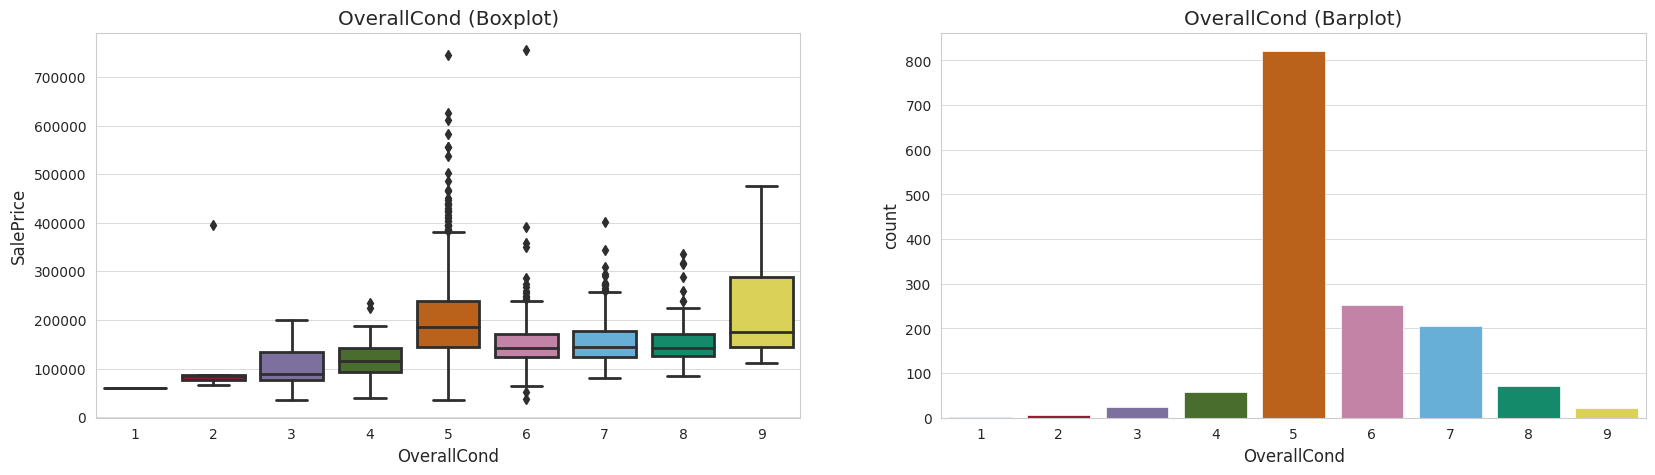

In [115]:
fig, axes = plt.subplots(1,2, figsize=(20, 5))
axes[0].set_title('OverallCond (Boxplot)')
axes[0].set_xticklabels(labels=train['OverallCond'].unique().tolist())
sns.boxplot(y=train['SalePrice'], x=train['OverallCond'], ax=axes[0])
axes[1].set_title('OverallCond (Barplot)')
sns.countplot(x=train['OverallCond'], ax=axes[1]);

**Neighbourhood**

1. There is a clear variation of saleprice with neighbourhood, this can be a useful information while addressing missing values by grouping by neighbourhood and imputing missing values accordingly 
2. NAmes has highest sold count with a lower sale price with less variation, which may explain high number of houses sold

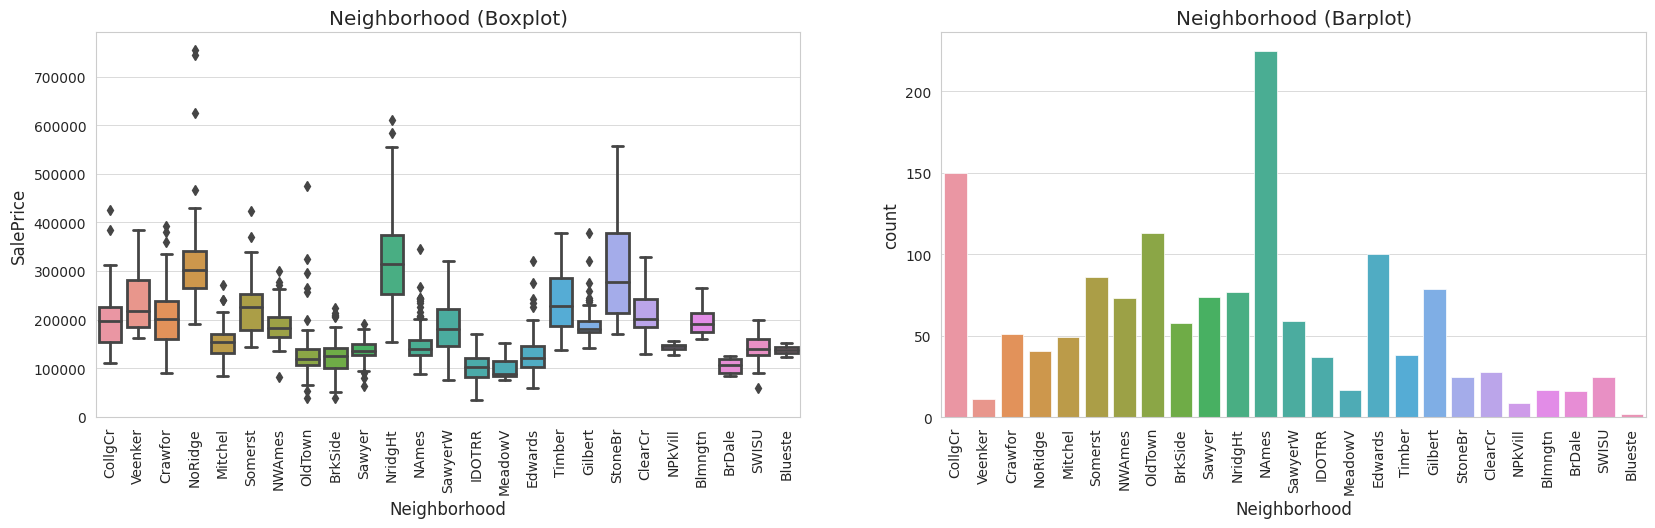

In [116]:
fig, axes = plt.subplots(1,2, figsize=(20, 5))
axes[0].set_title('Neighborhood (Boxplot)')
axes[0].set_xticklabels(labels=train['Neighborhood'].unique().tolist(),rotation=90)
sns.boxplot(y=train['SalePrice'], x=train['Neighborhood'], ax=axes[0])

axes[1].set_title('Neighborhood (Barplot)')
sns.countplot(x=train['Neighborhood'], ax=axes[1])
plt.xticks(rotation=90);

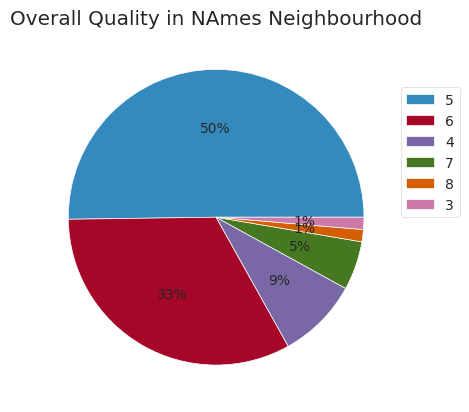

In [117]:
NAmes_df=train[train['Neighborhood']=='NAmes']
NAmes_df['SalePrice'].median(), train['SalePrice'].median()
NAmes_OverallQual=NAmes_df['OverallQual'].value_counts()/len(NAmes_df['OverallQual'])
plt.pie(NAmes_OverallQual, autopct=lambda p: '{:.0f}%'.format(p))
plt.legend(NAmes_OverallQual.index, loc=(1,0.5))
plt.title('Overall Quality in NAmes Neighbourhood');


Exploring NAmes area, we see ~83% houses have average overall quality, making them more attractive and affordable

**Exploring the distribution of categorical variables and their relation with SalePrice**

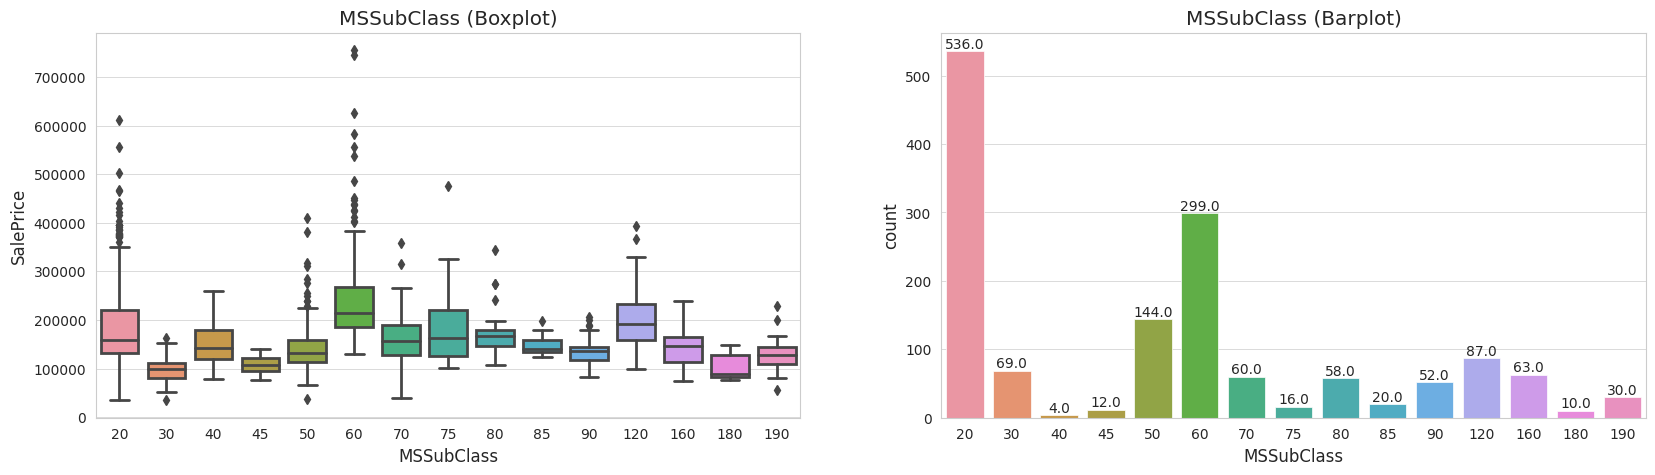

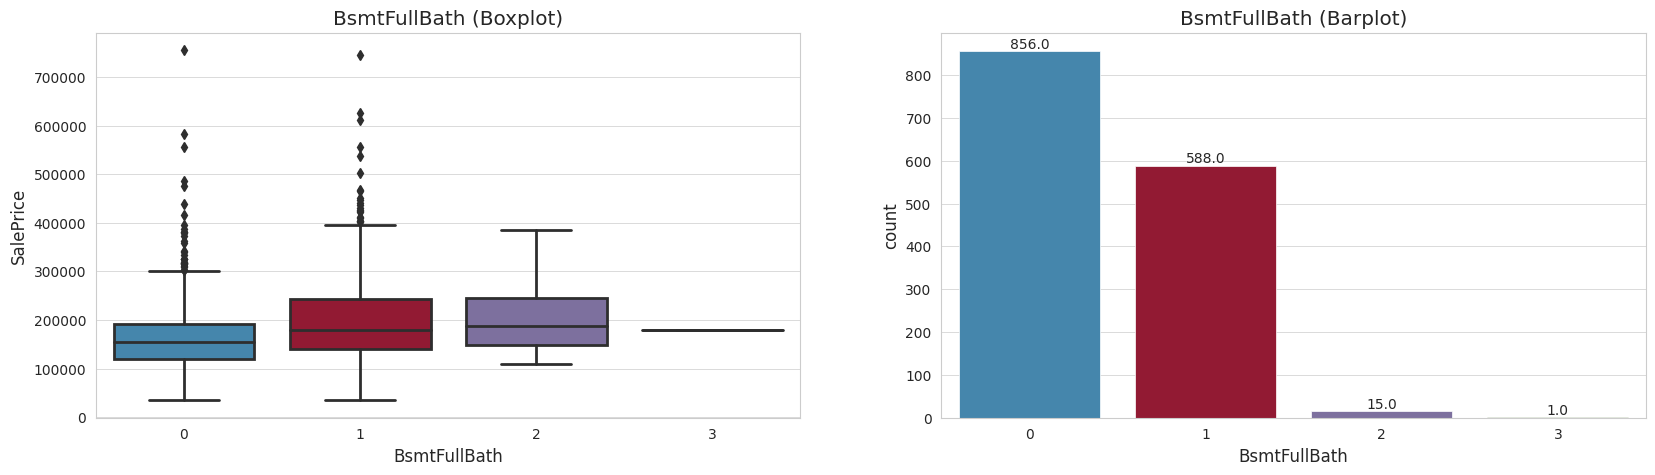

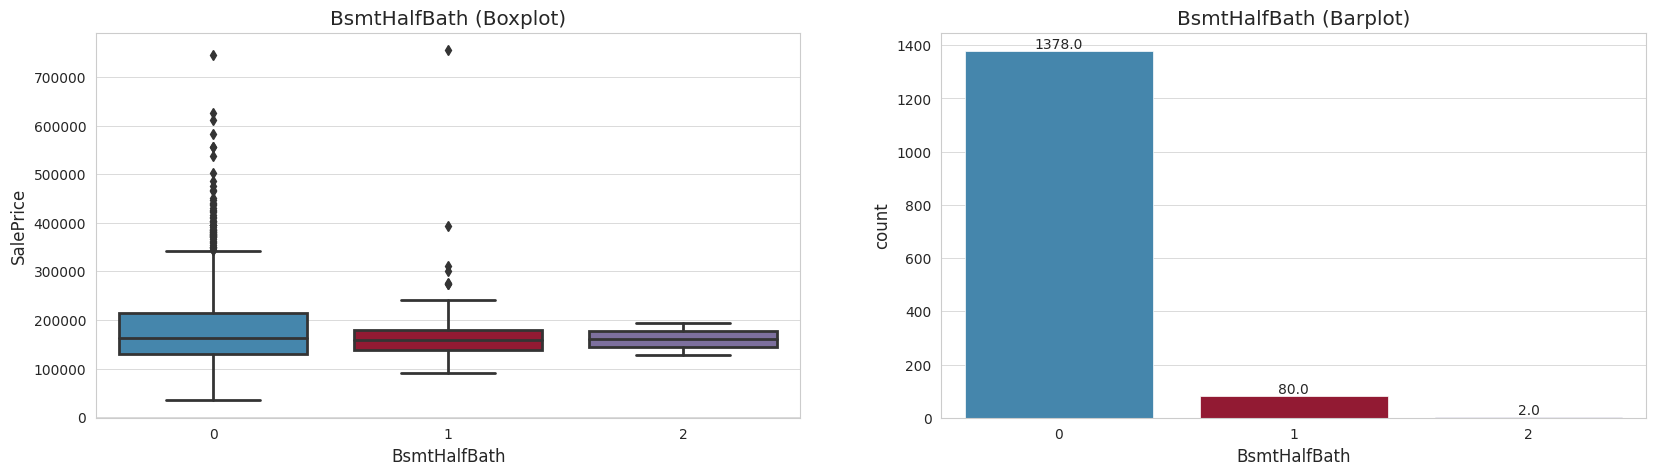

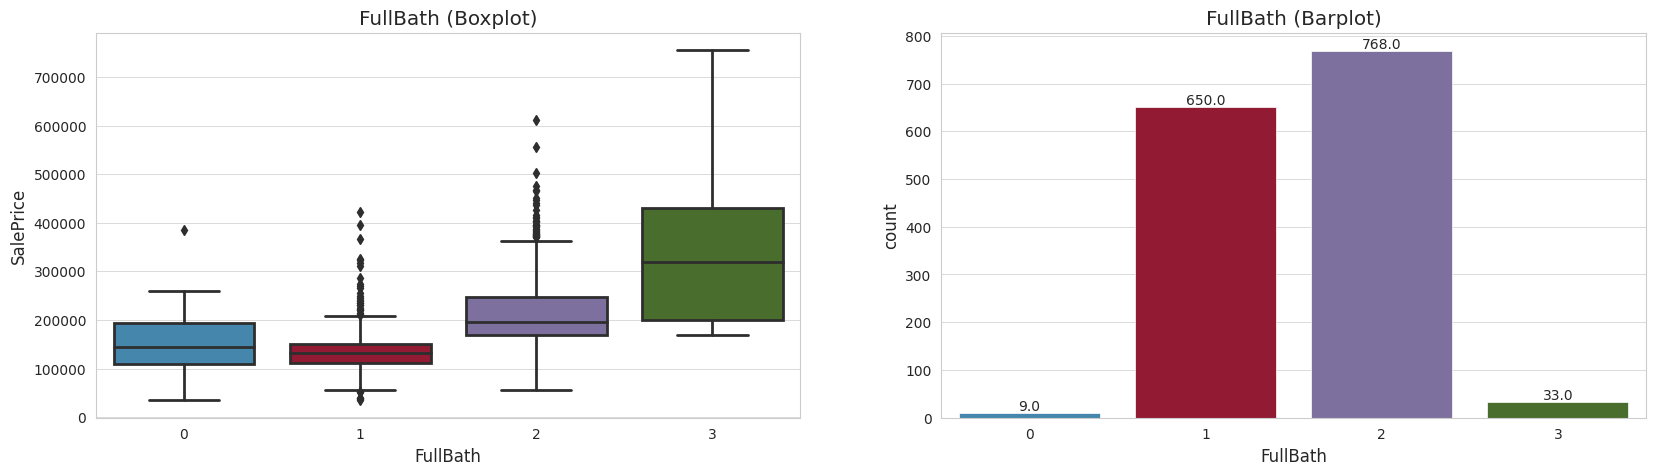

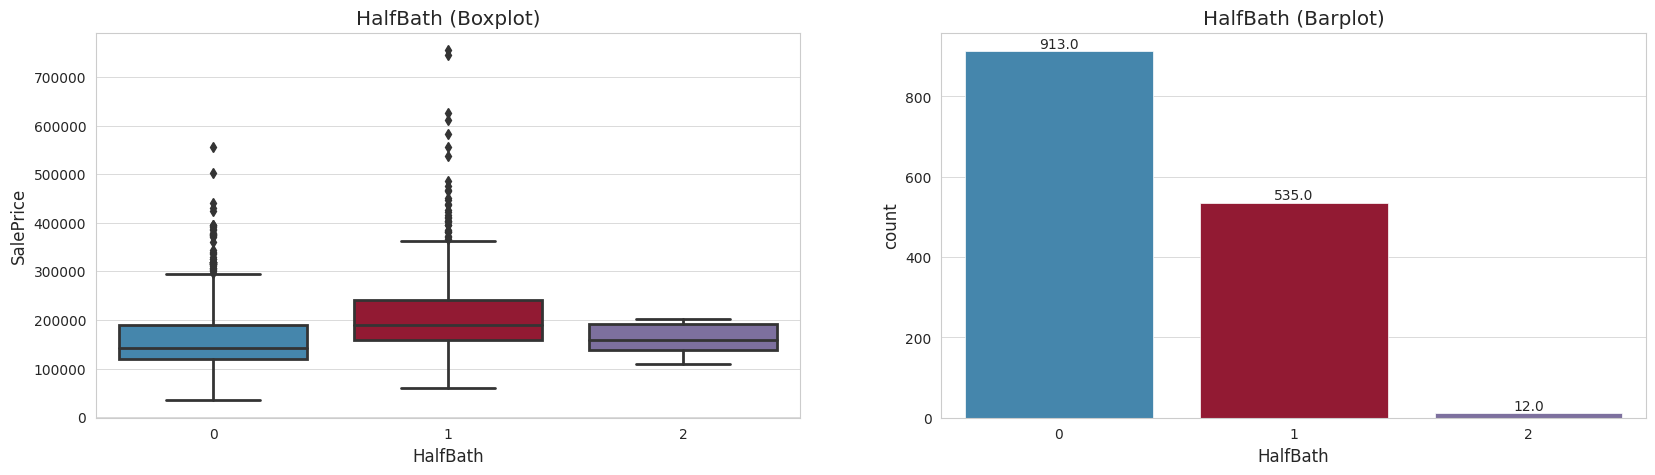

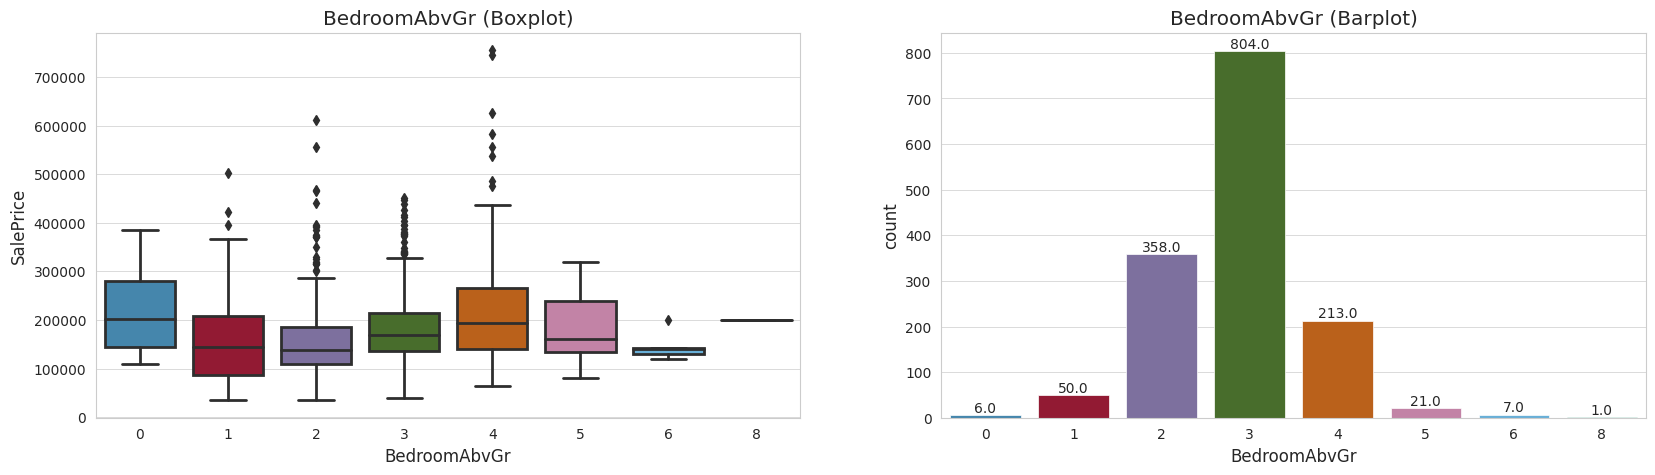

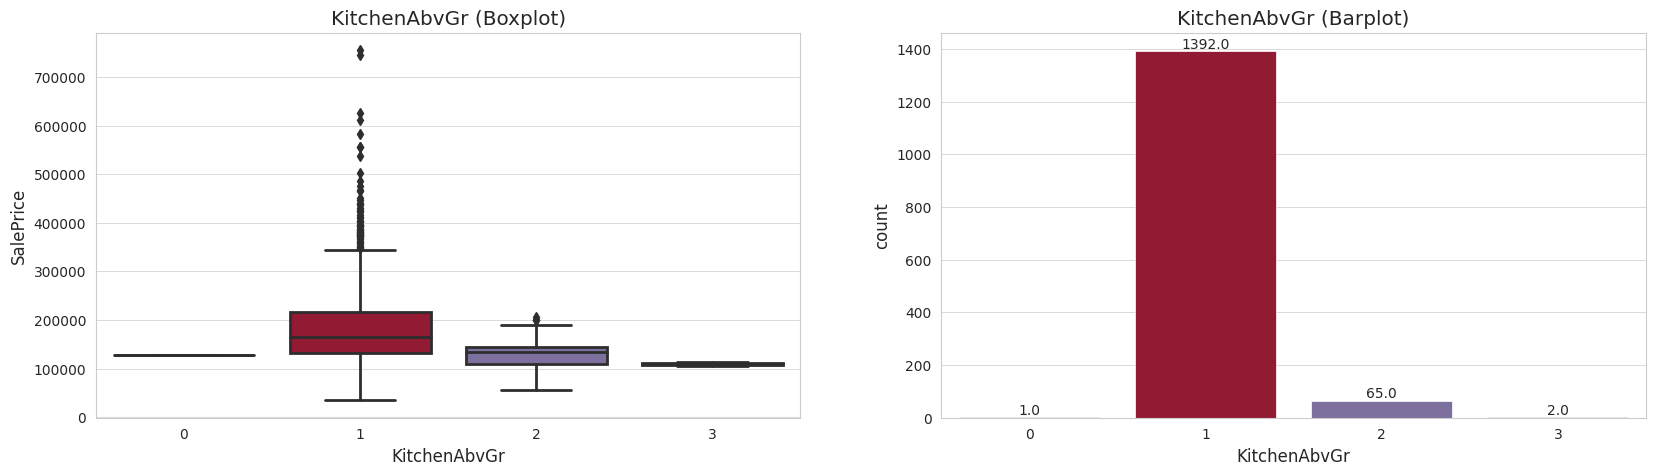

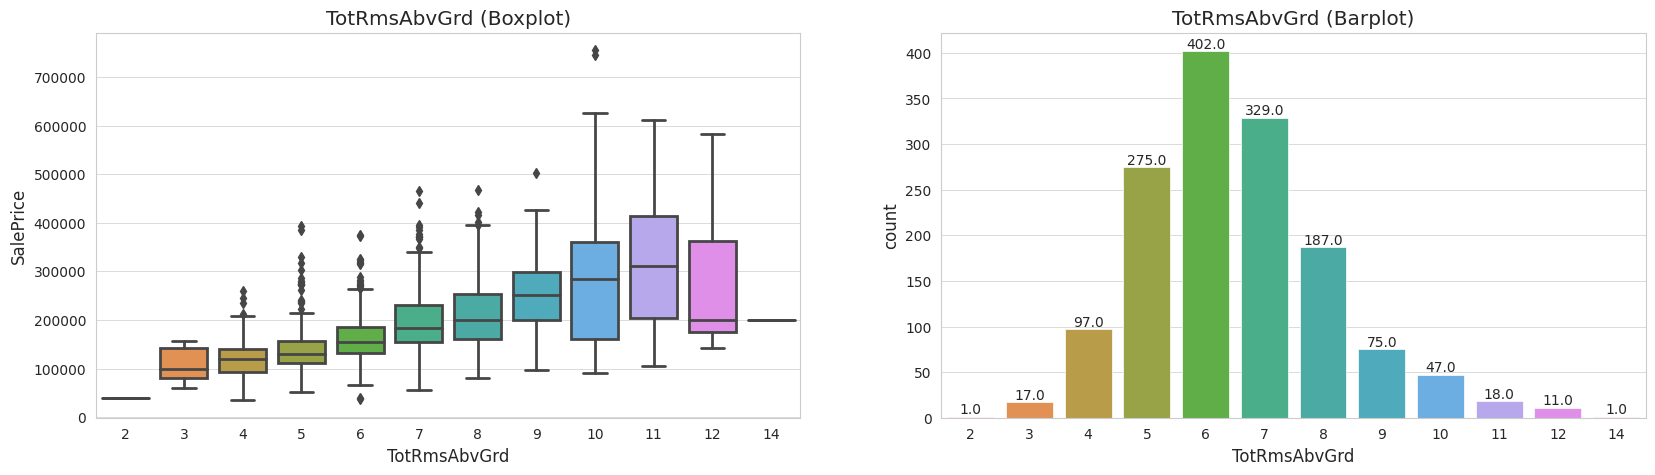

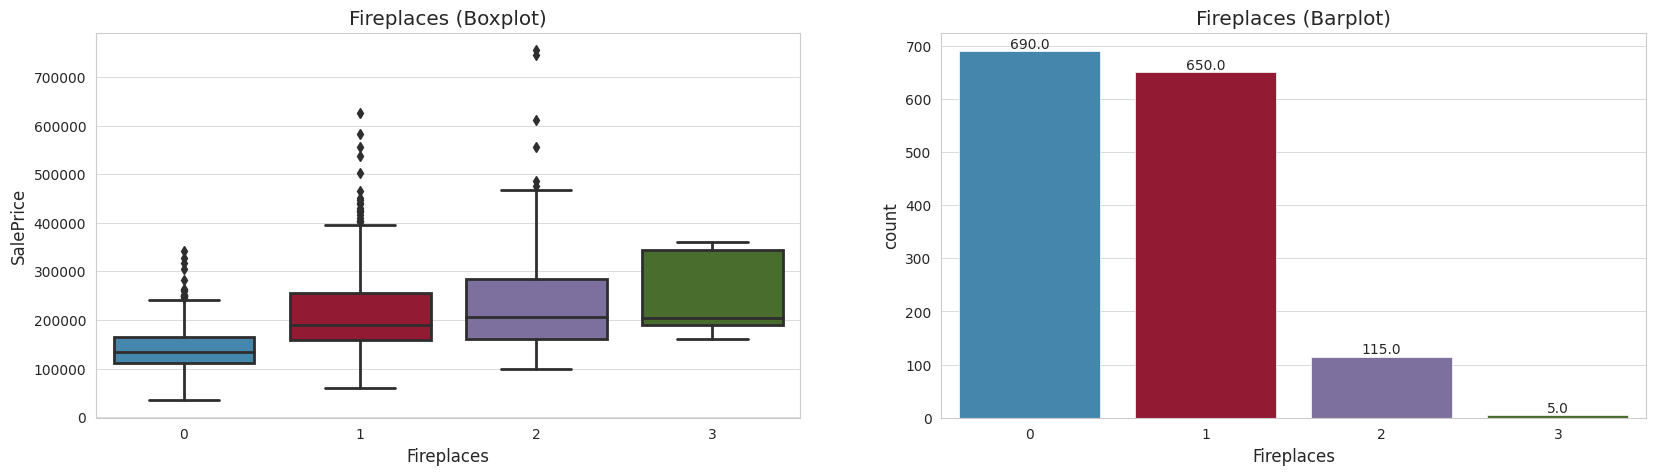

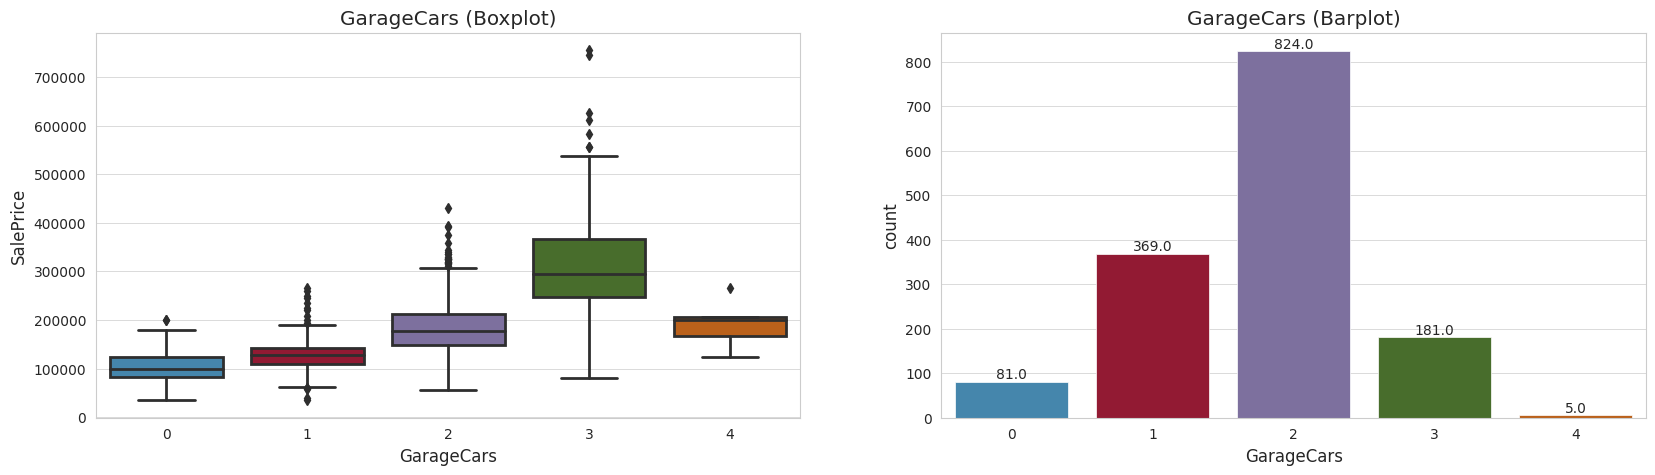

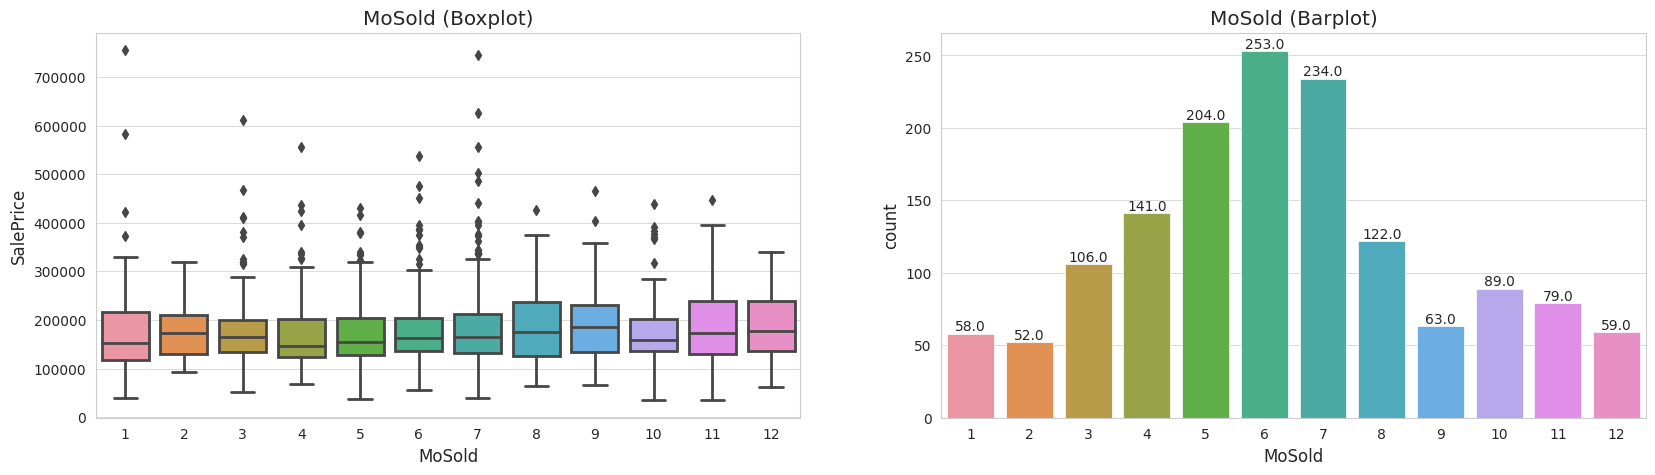

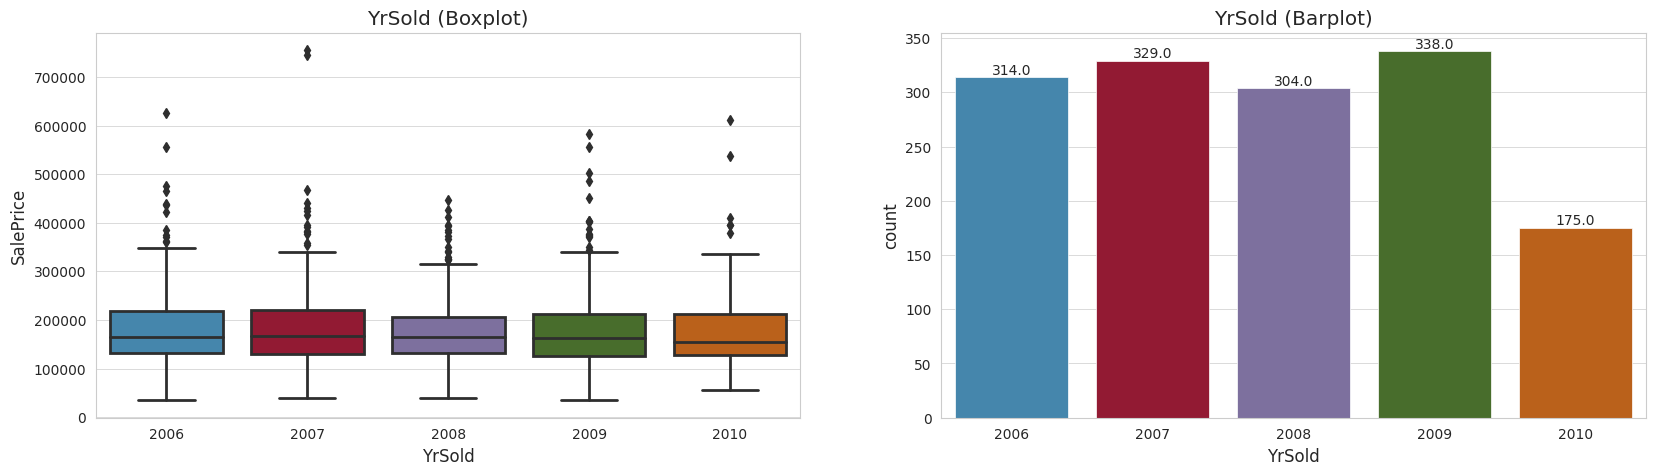

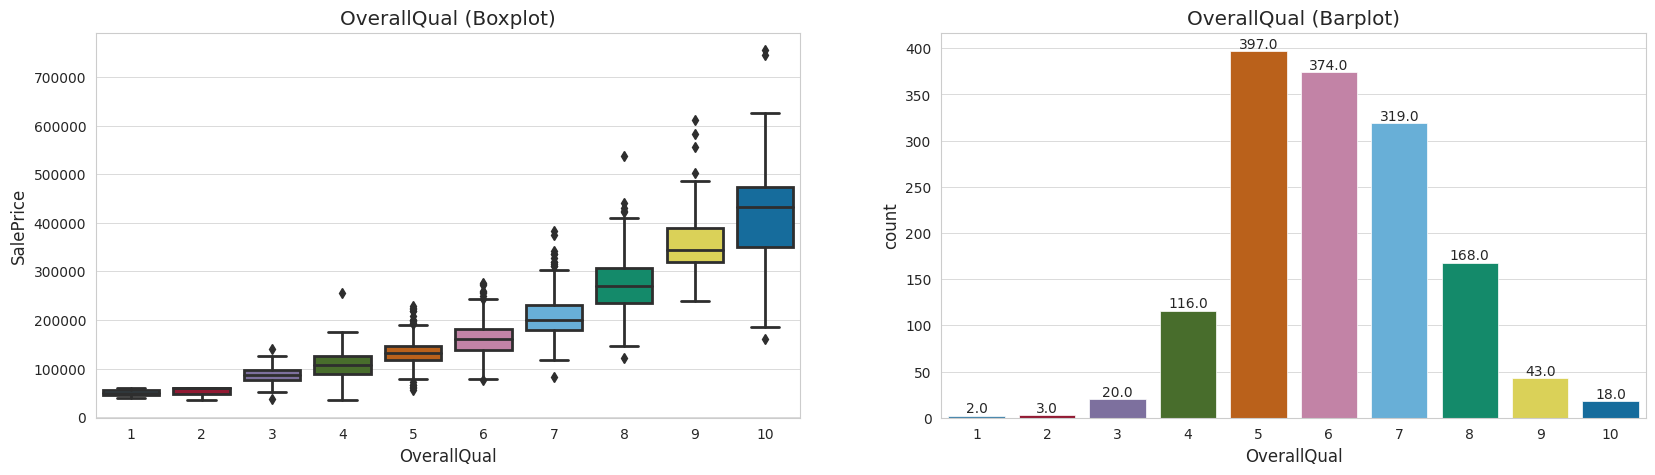

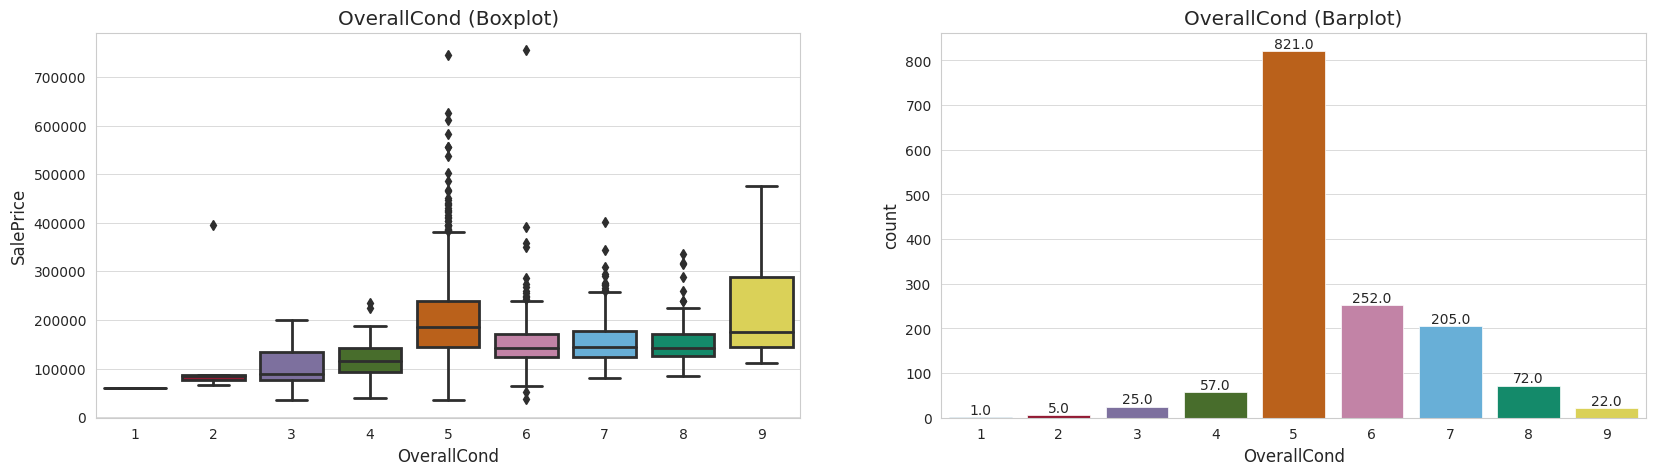

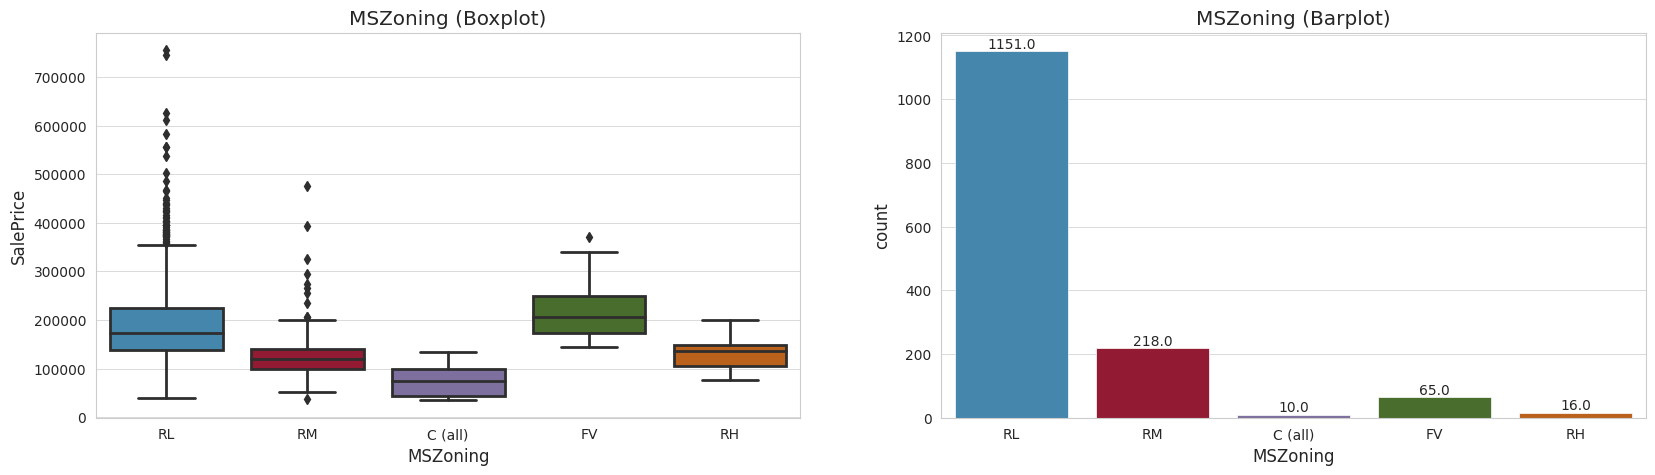

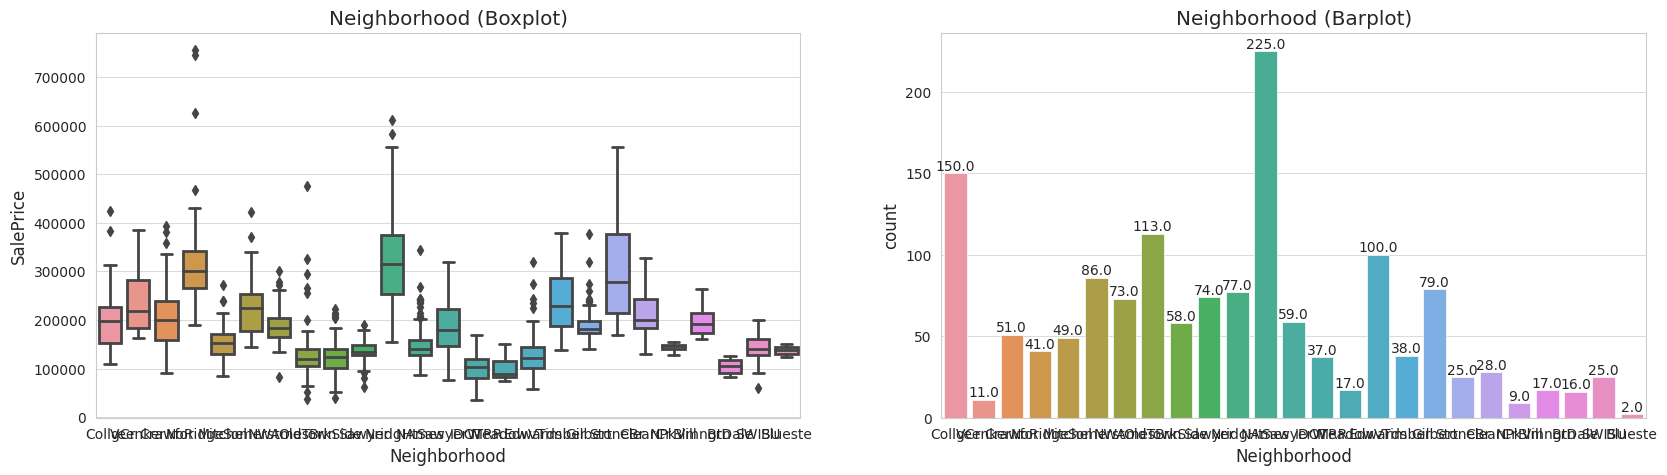

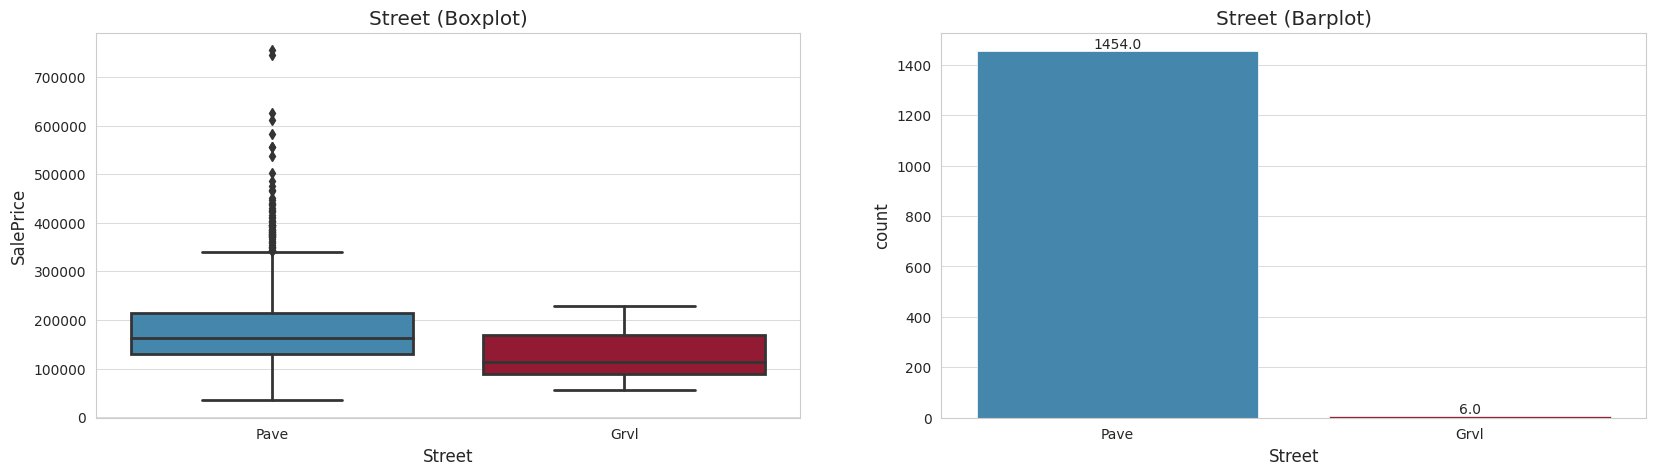

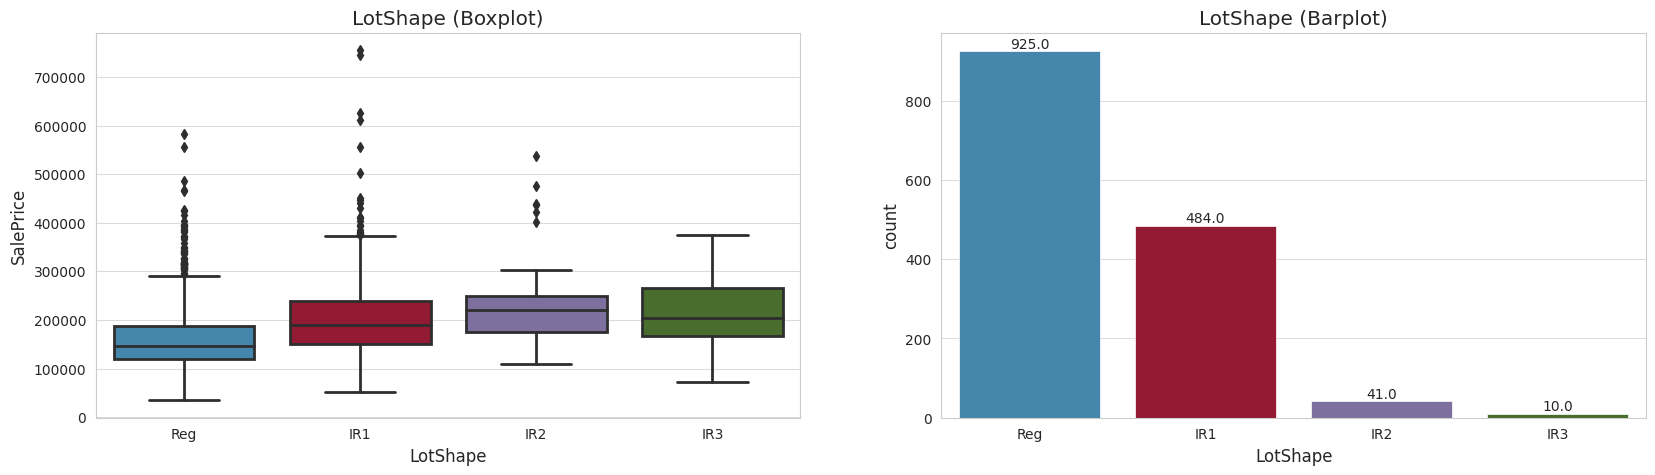

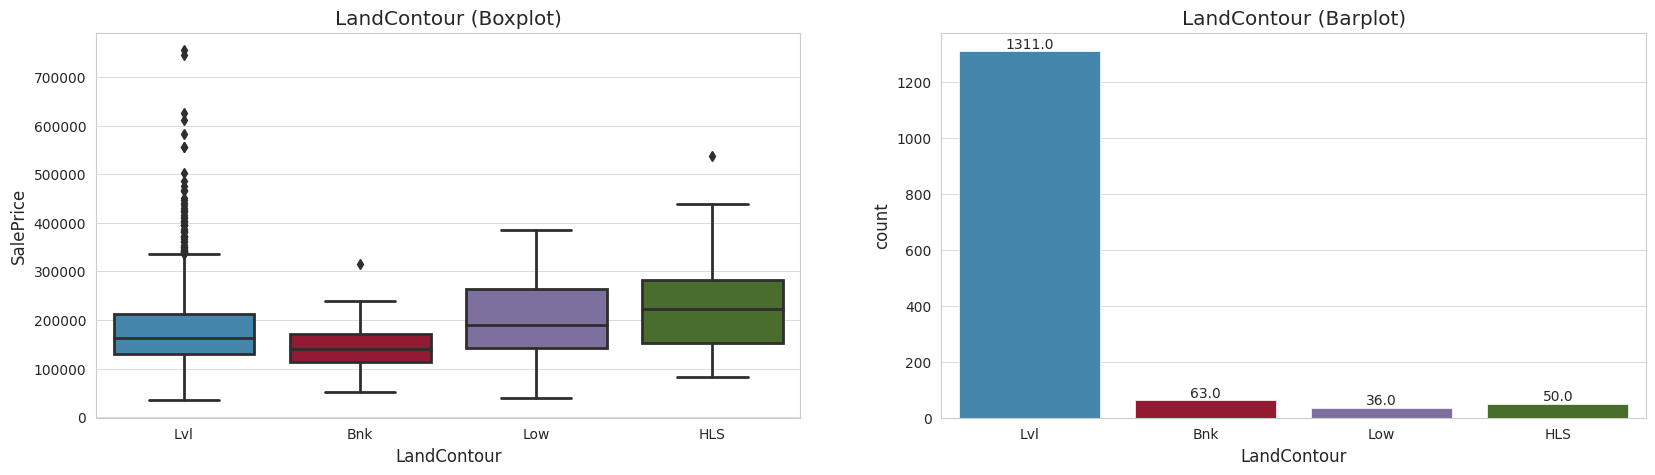

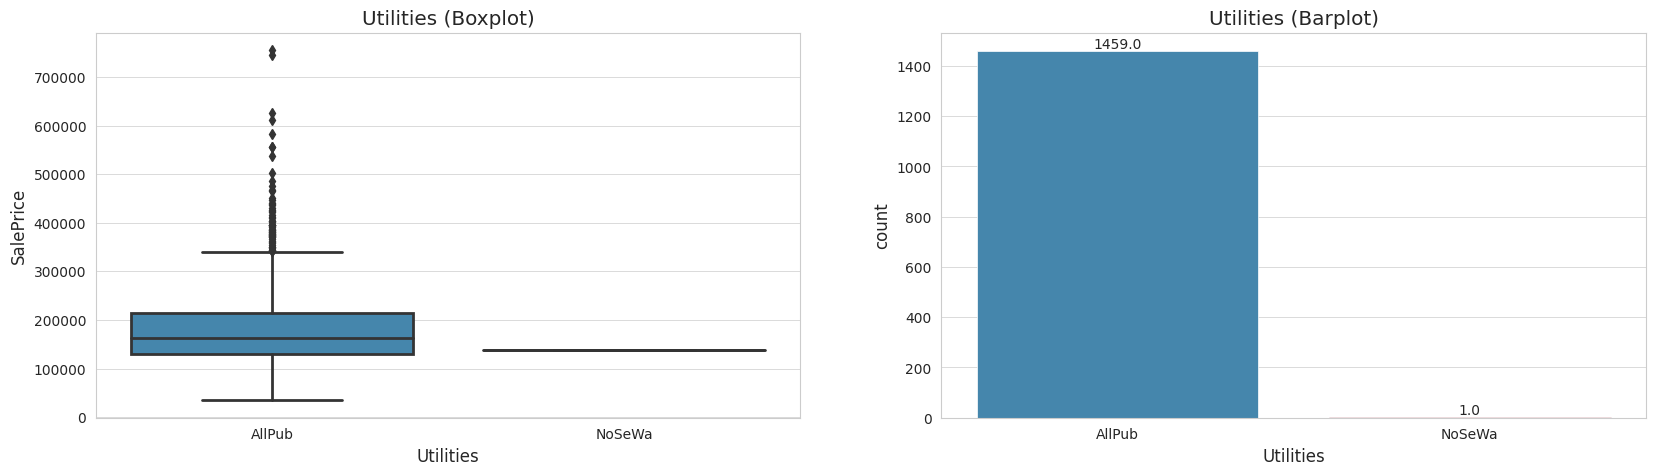

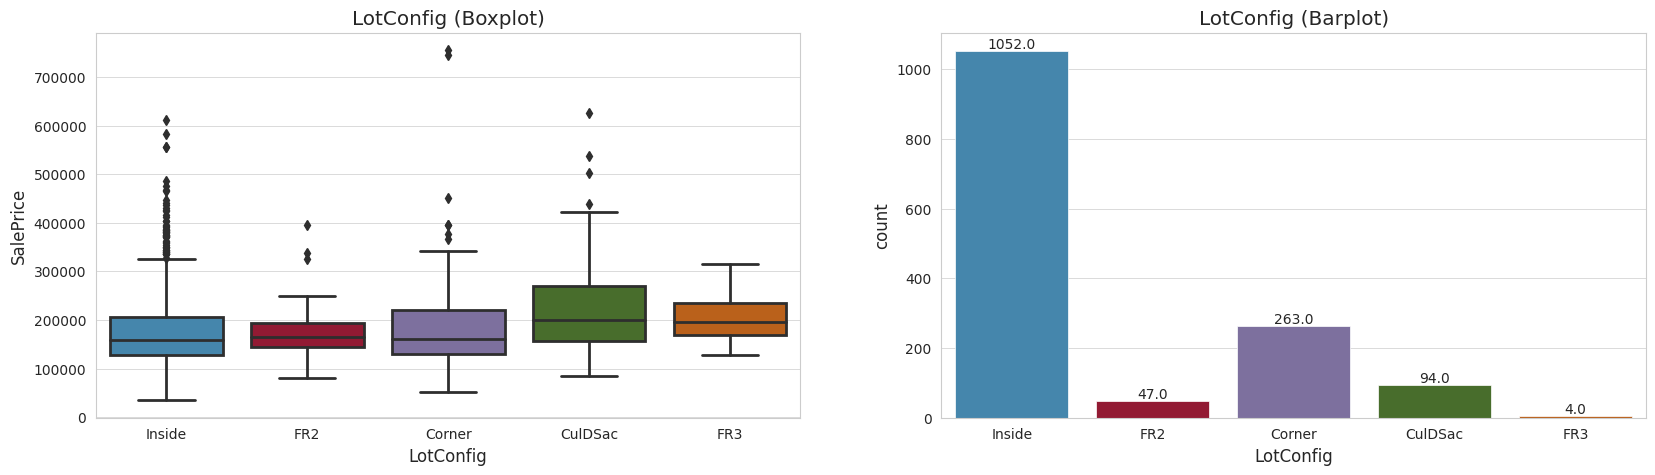

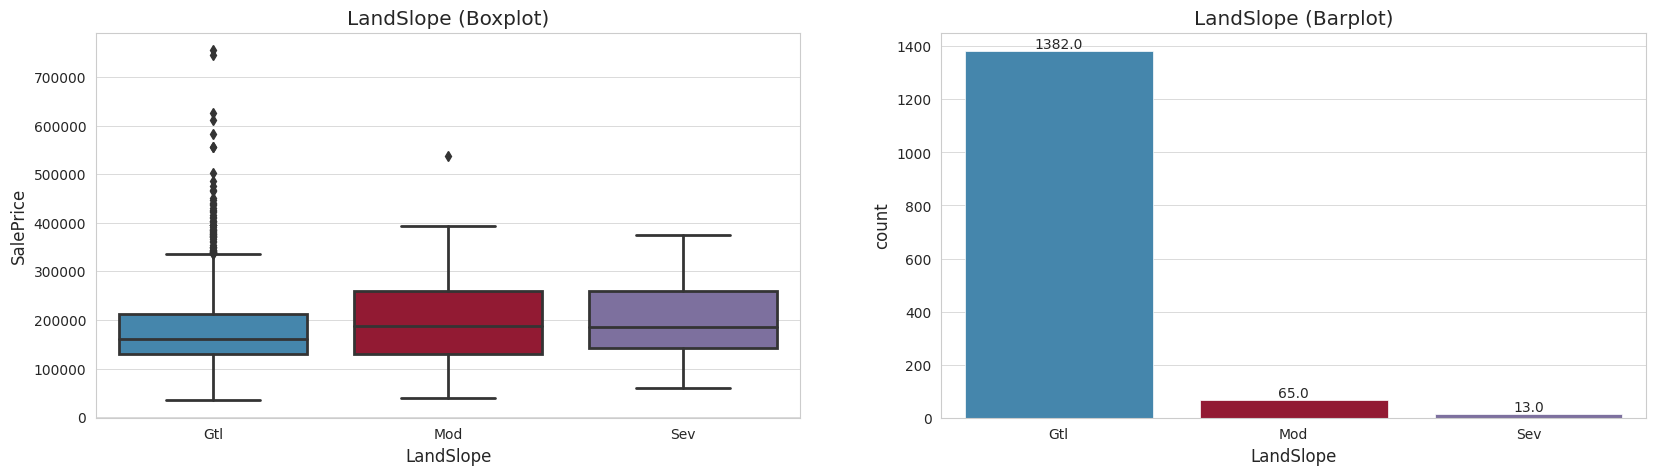

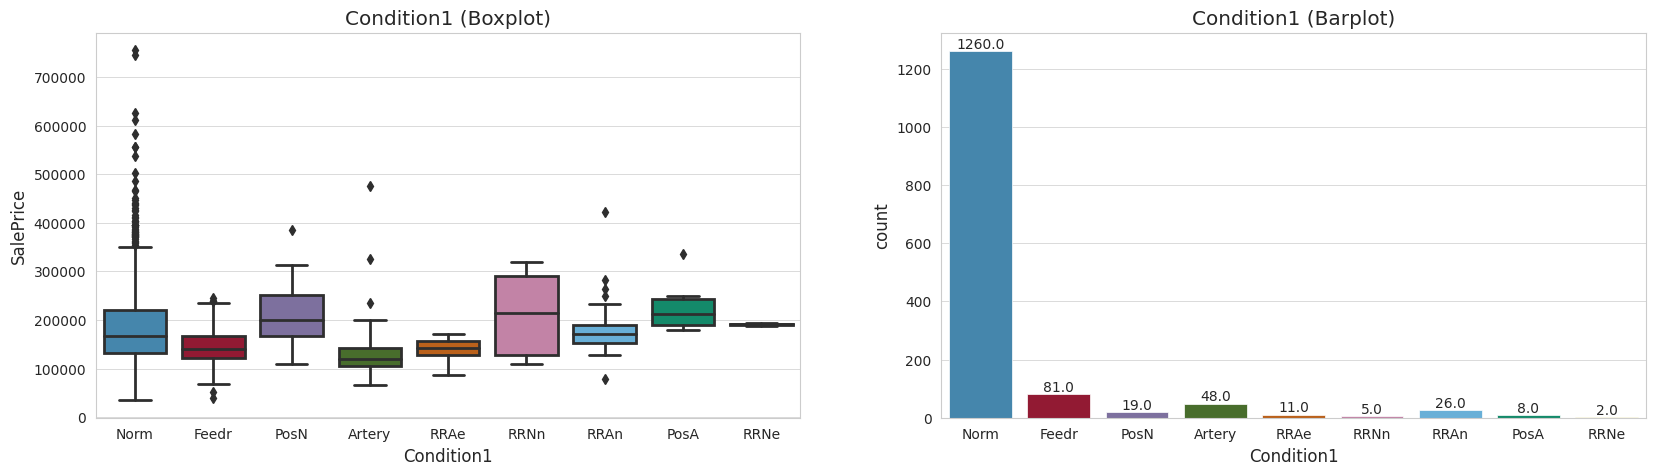

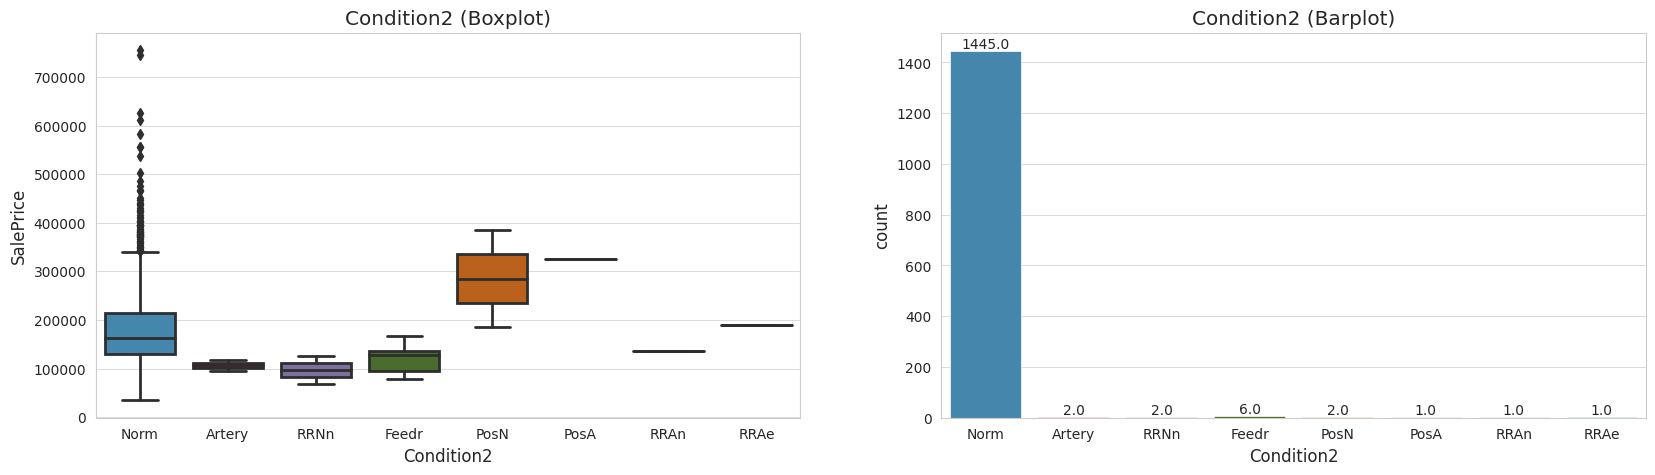

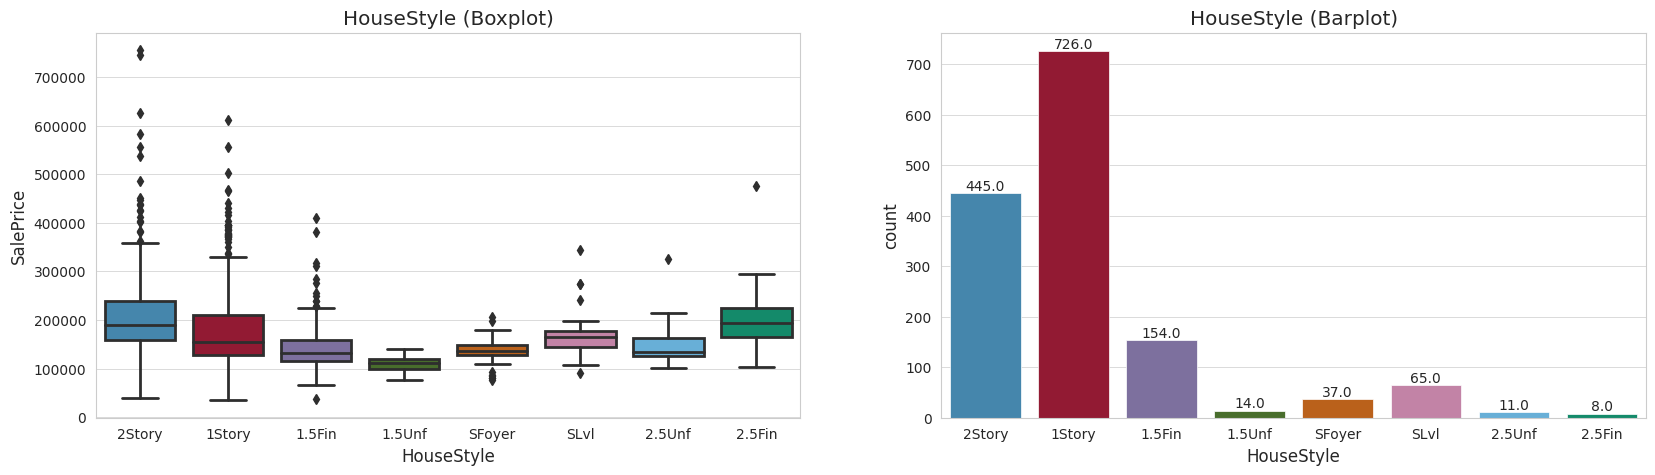

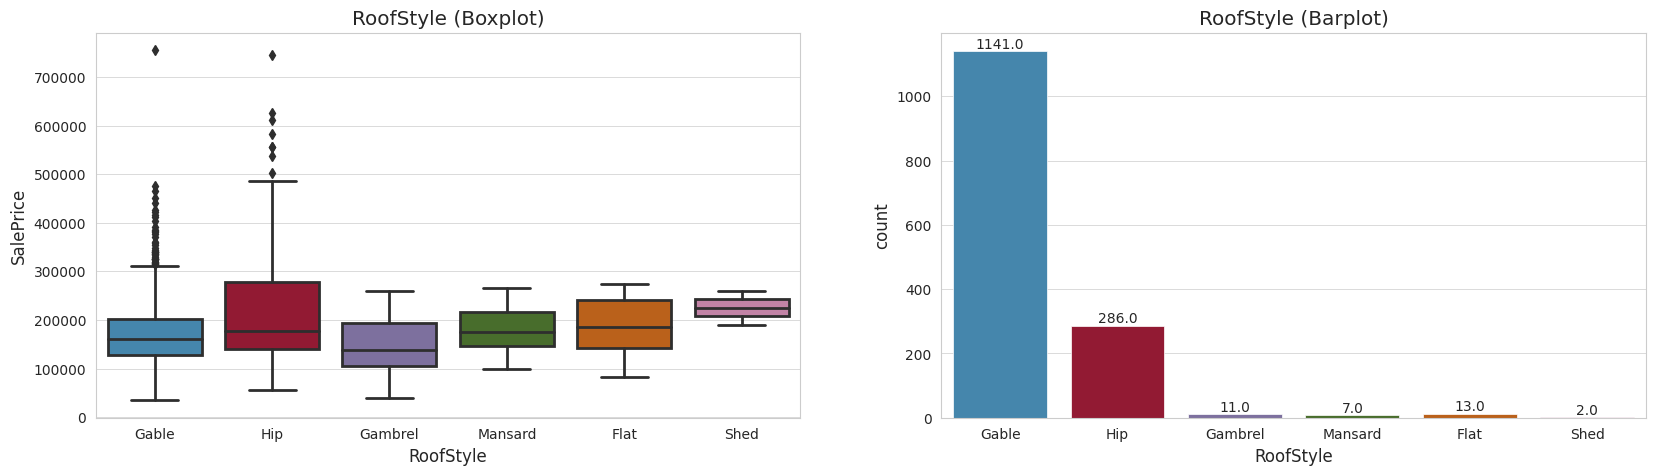

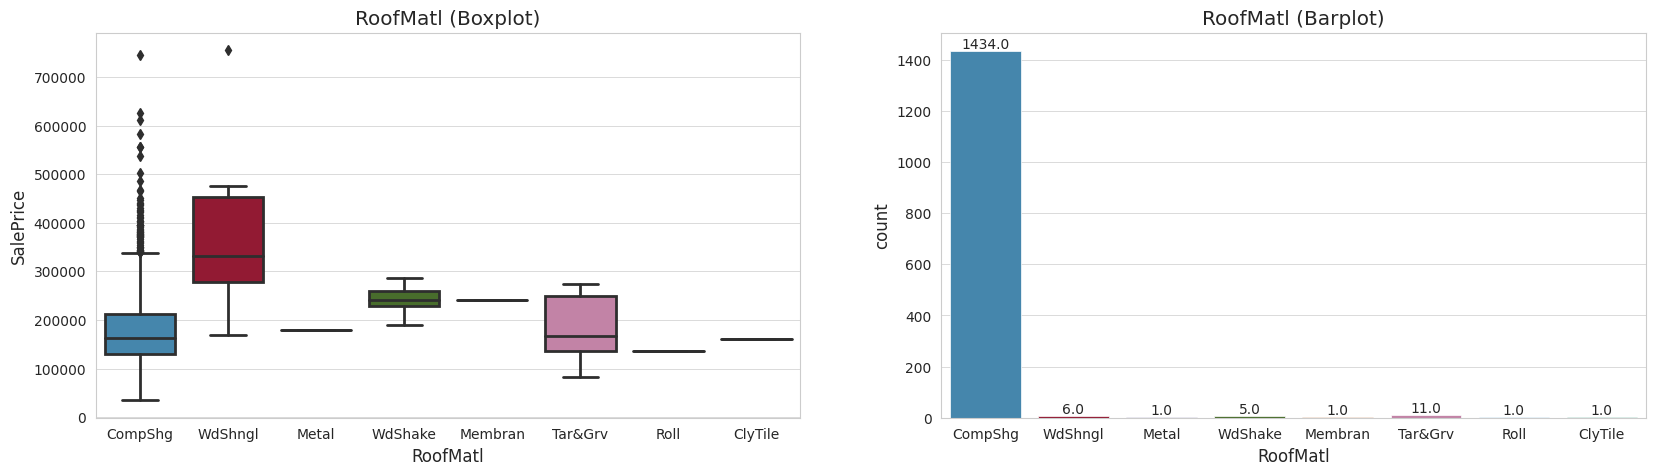

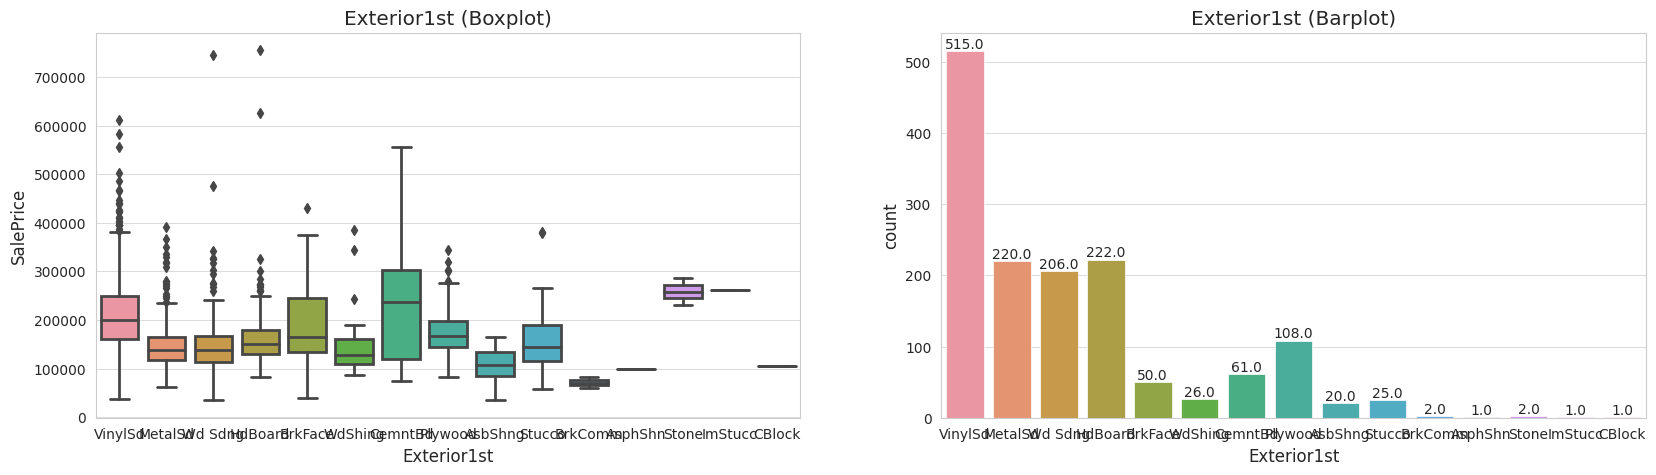

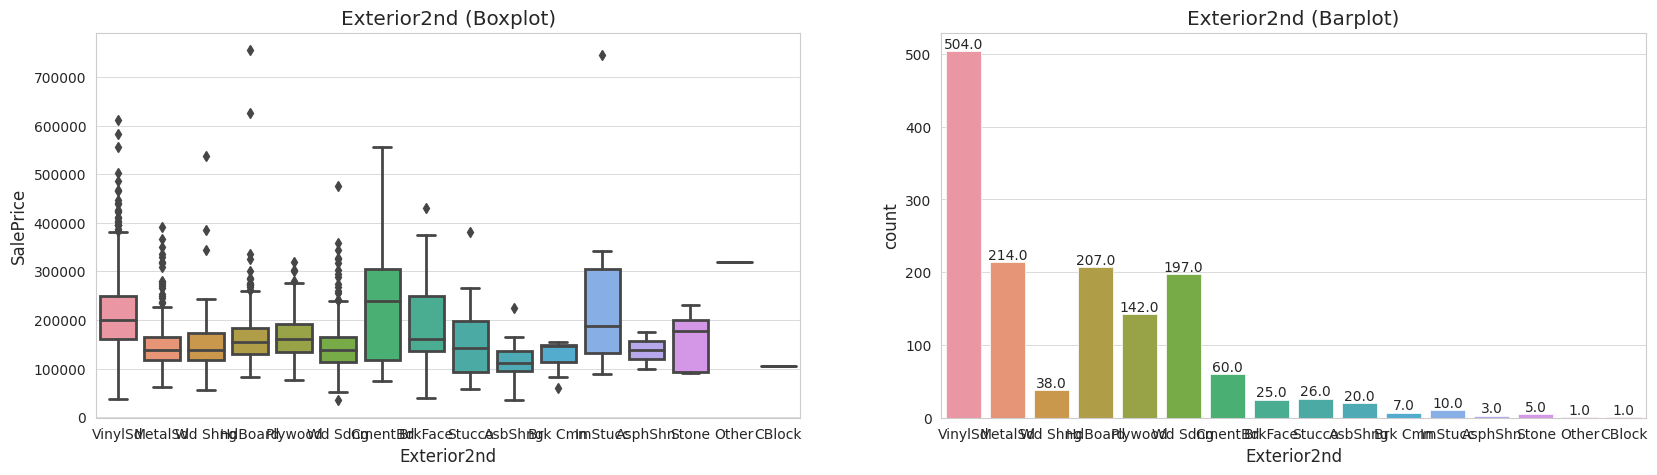

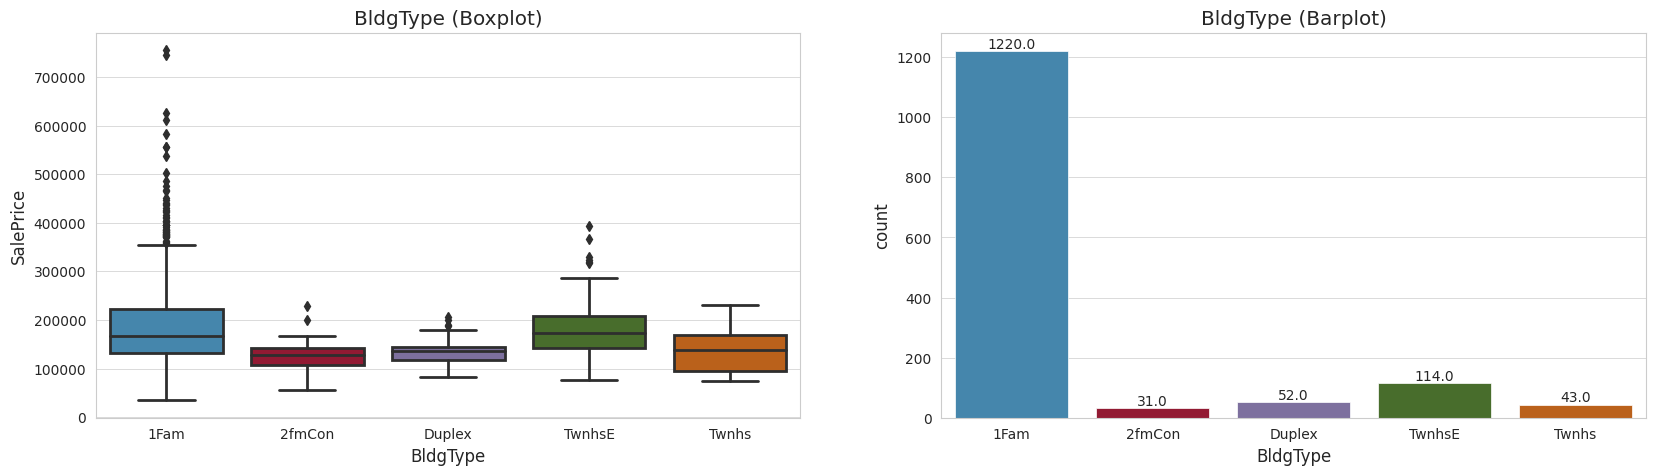

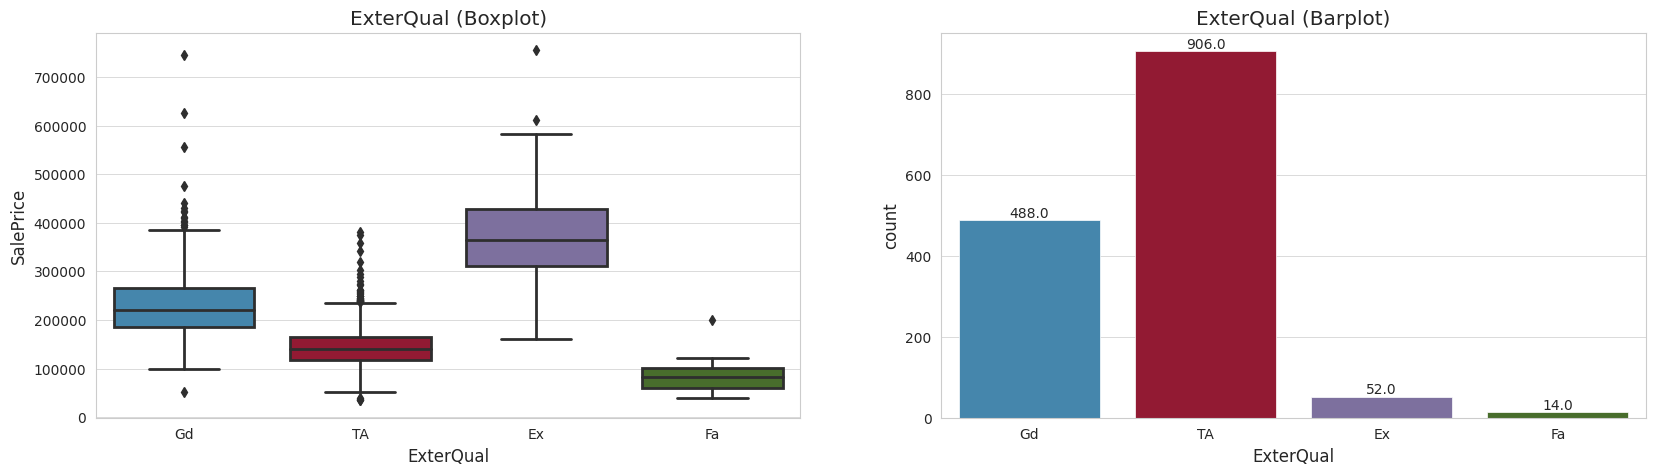

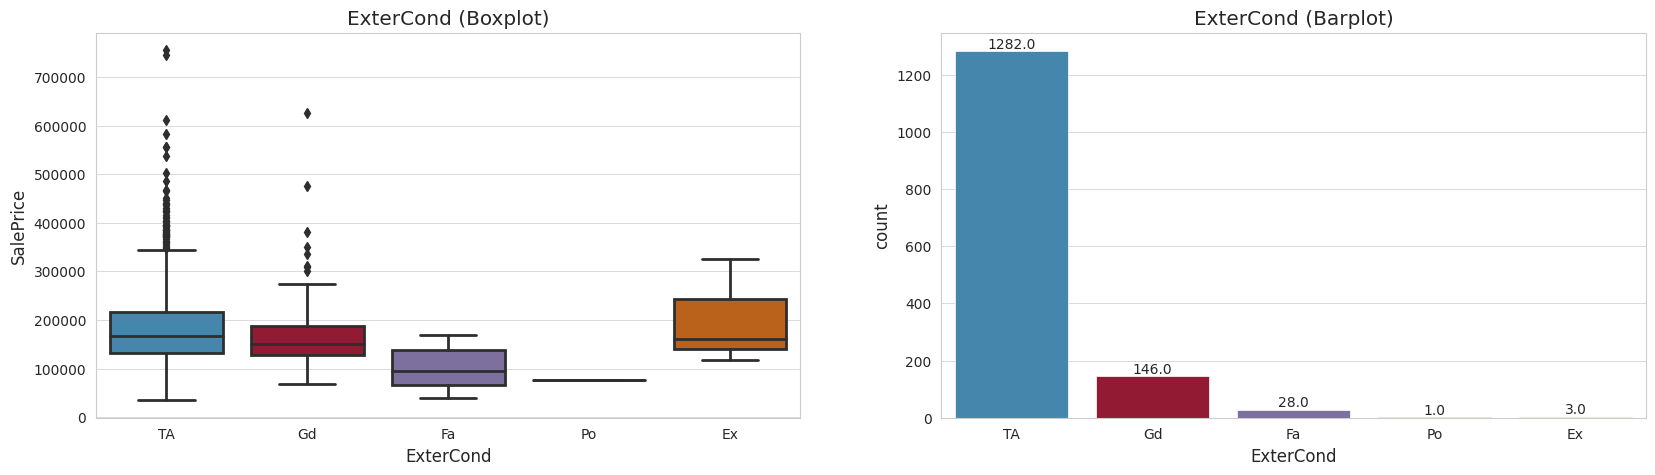

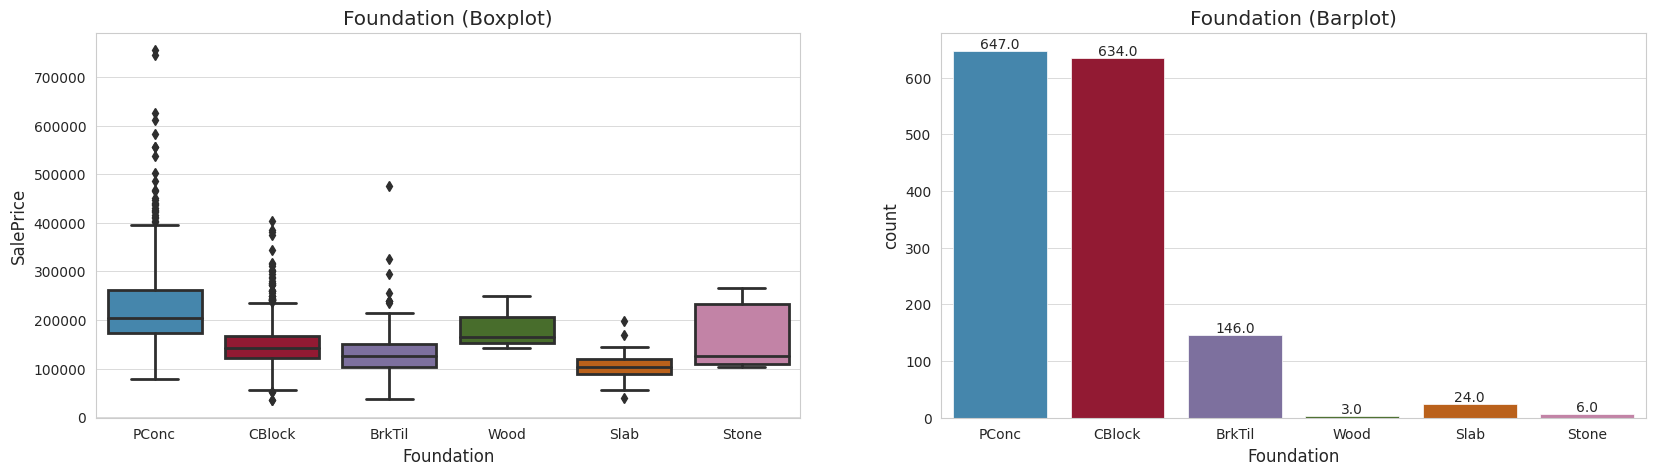

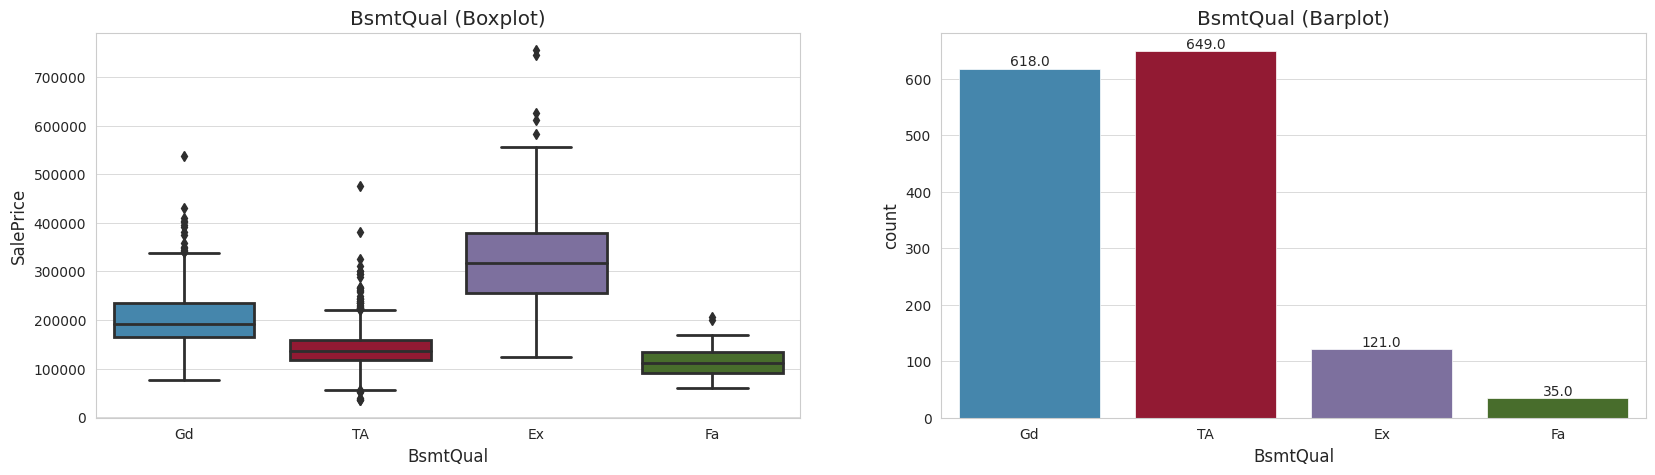

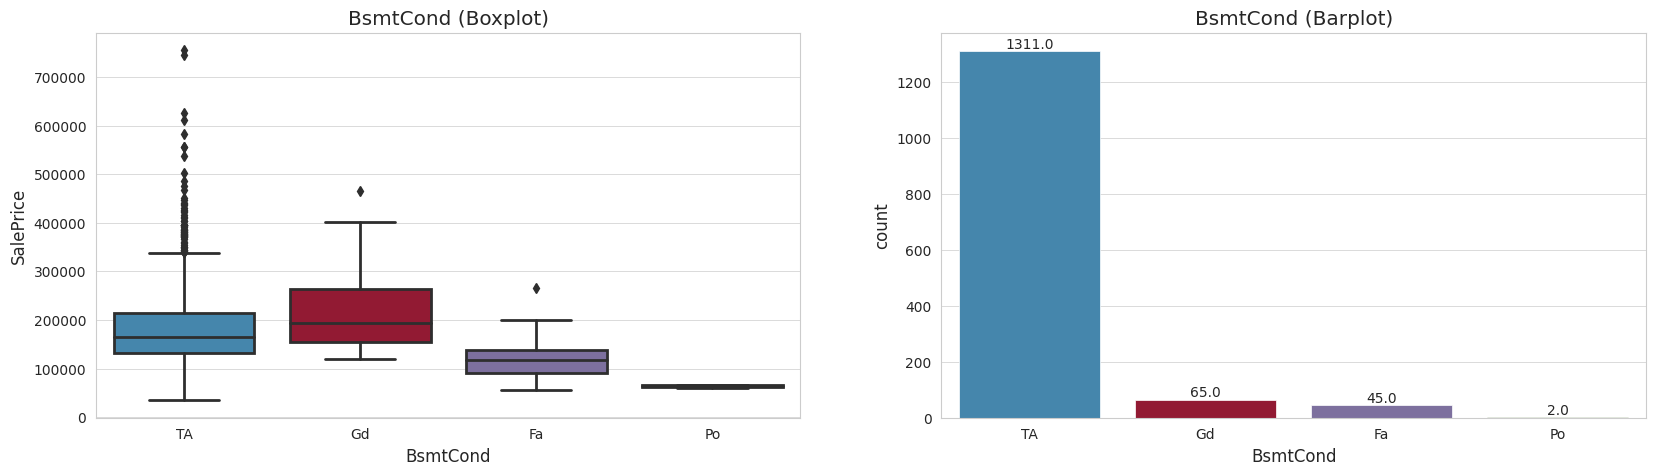

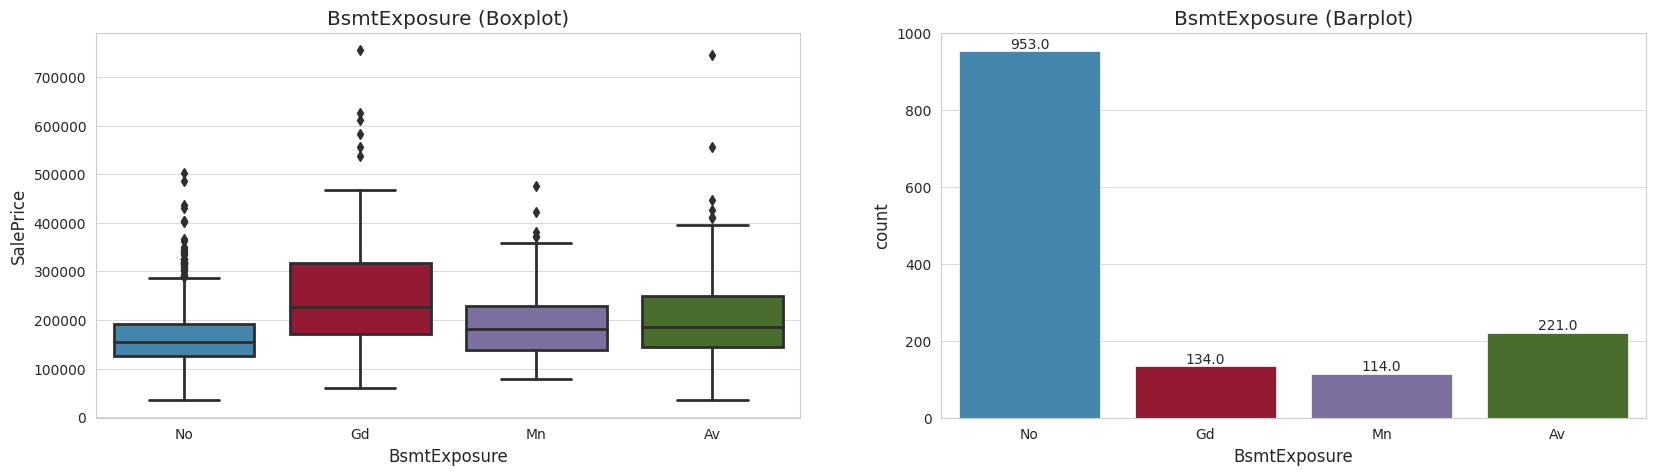

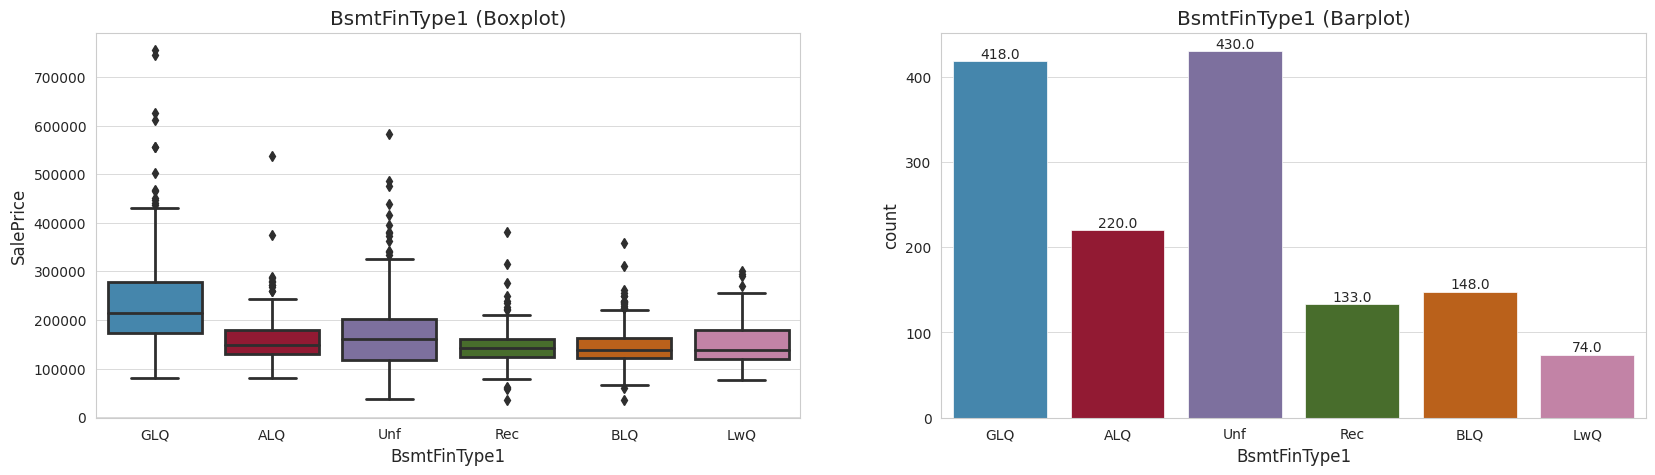

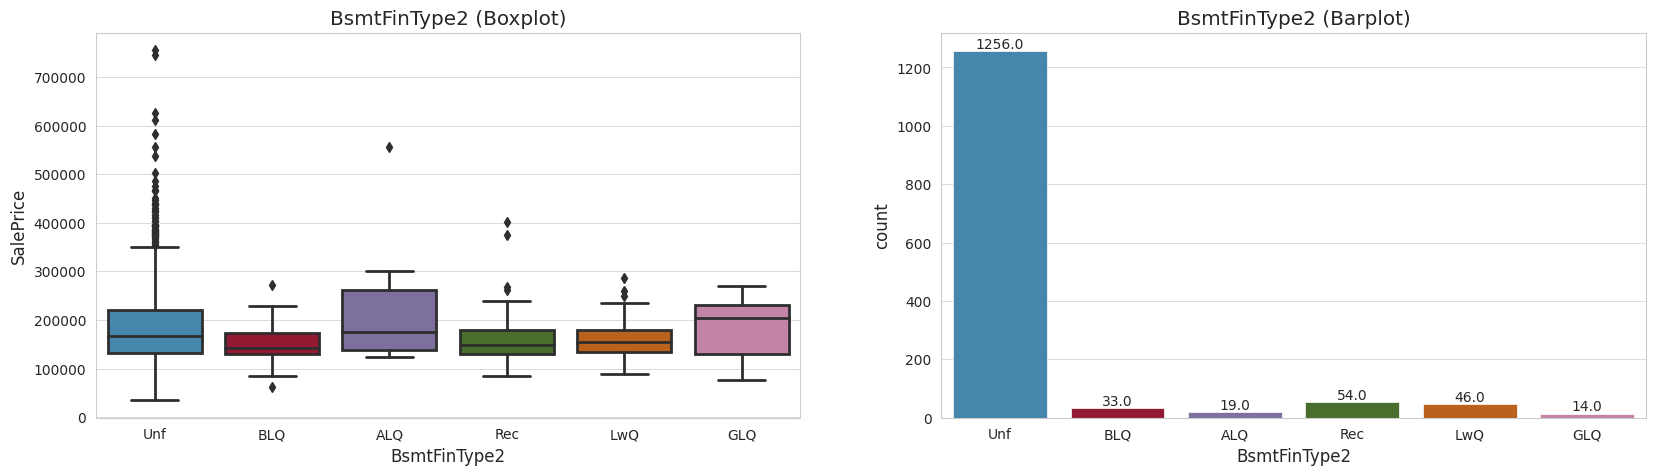

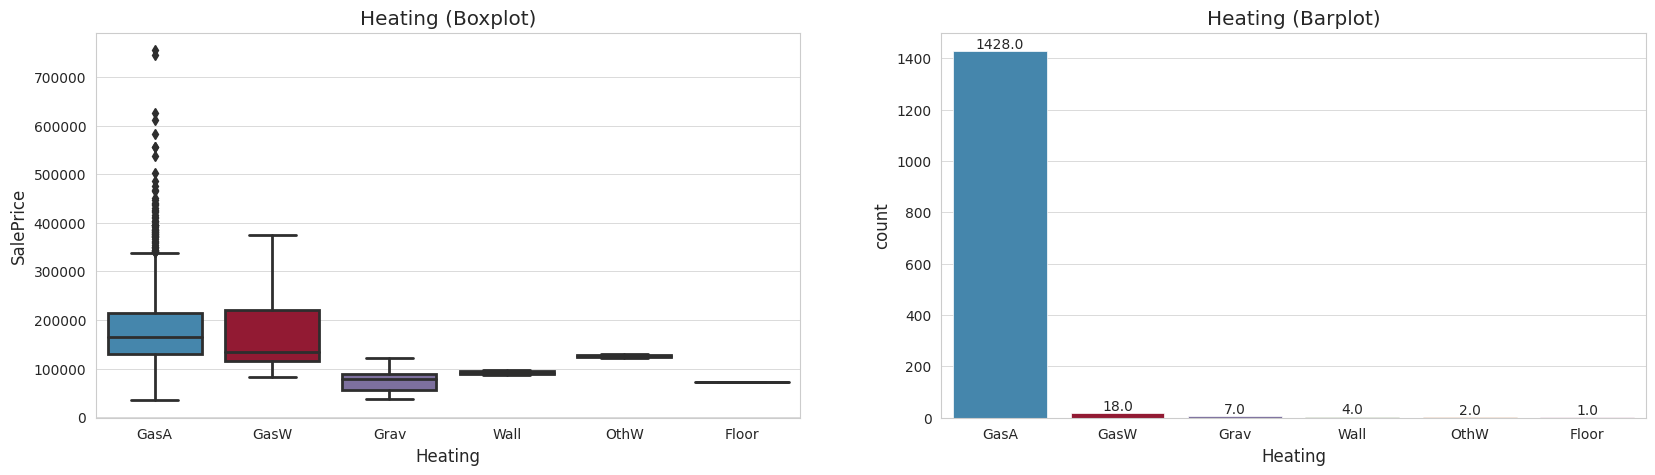

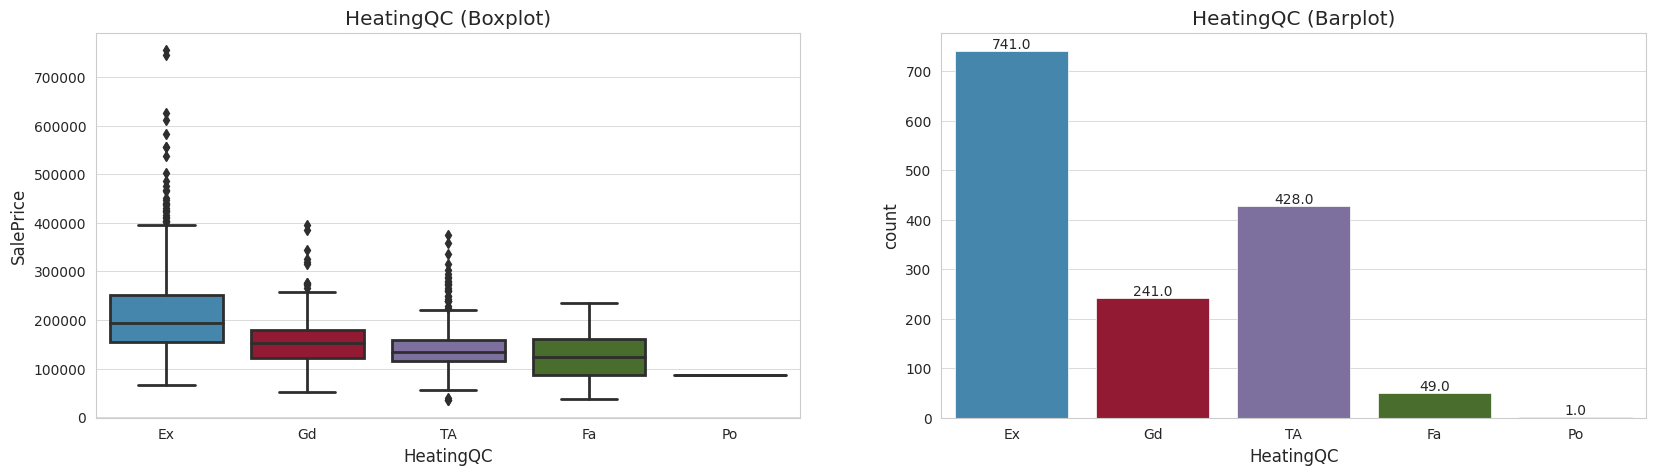

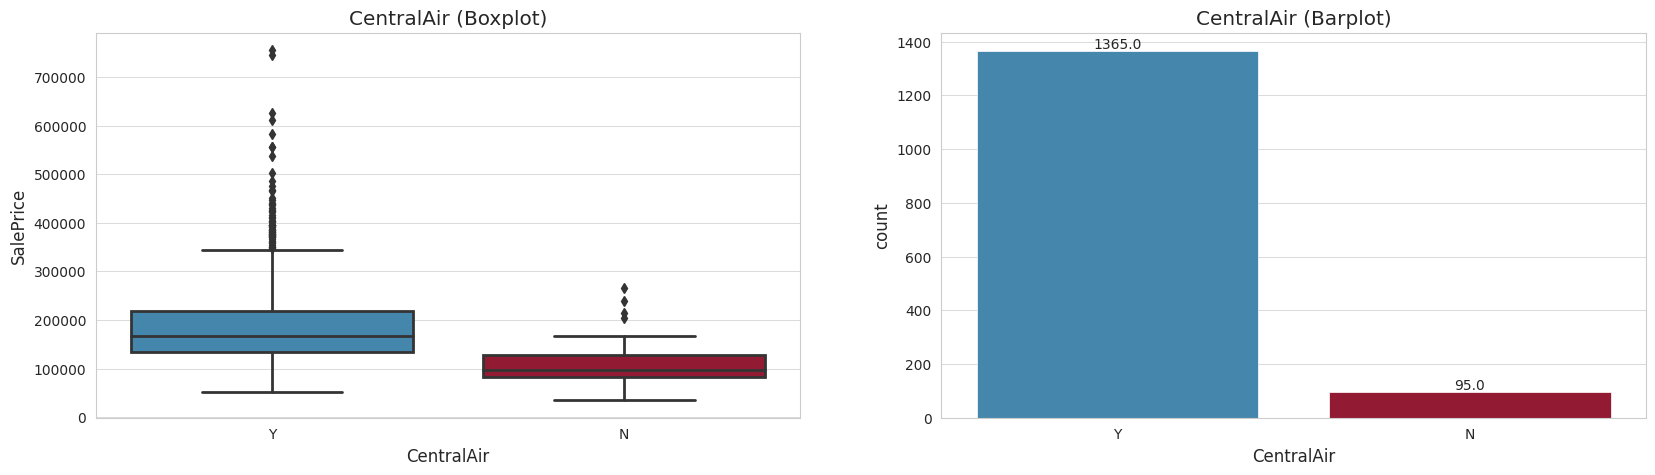

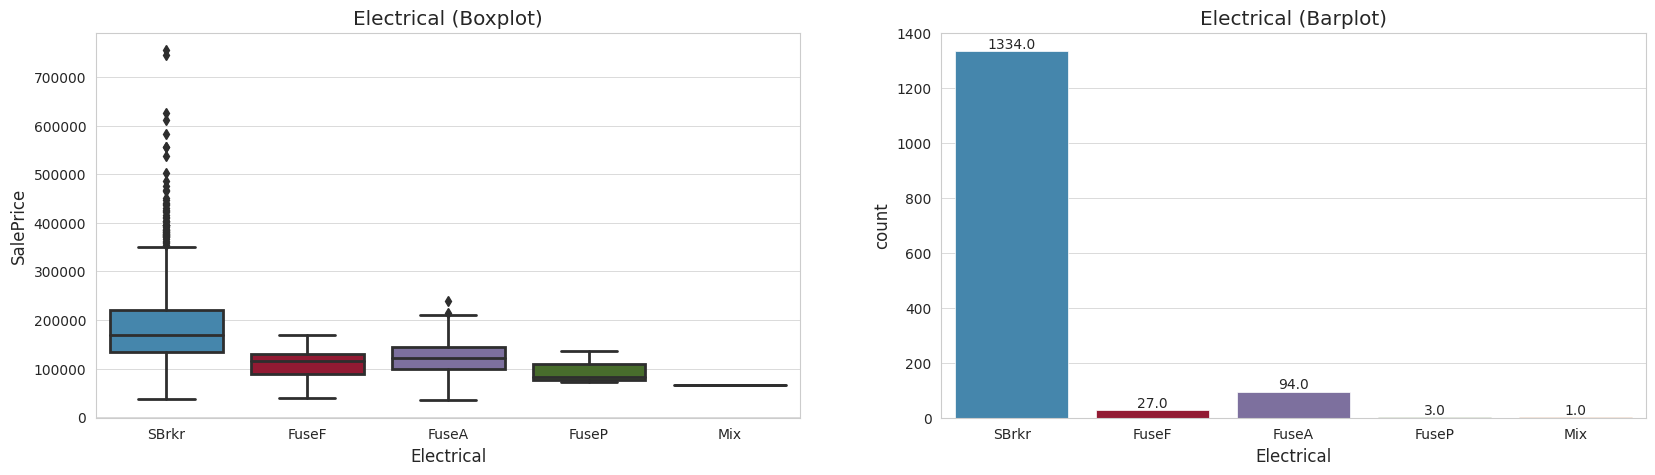

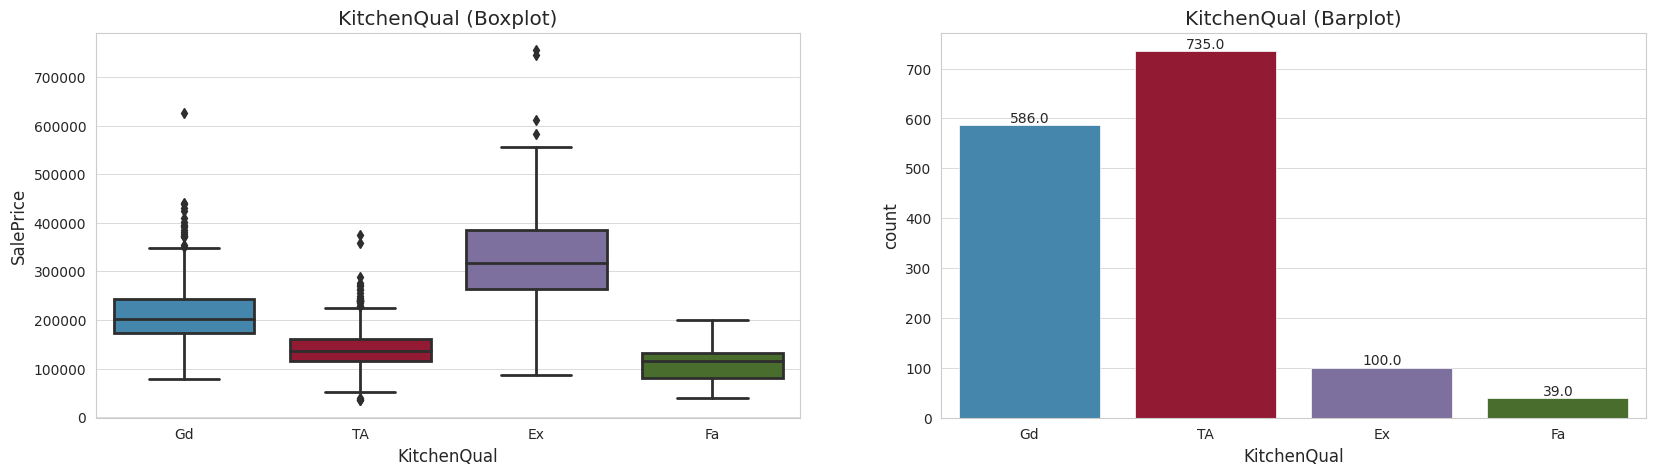

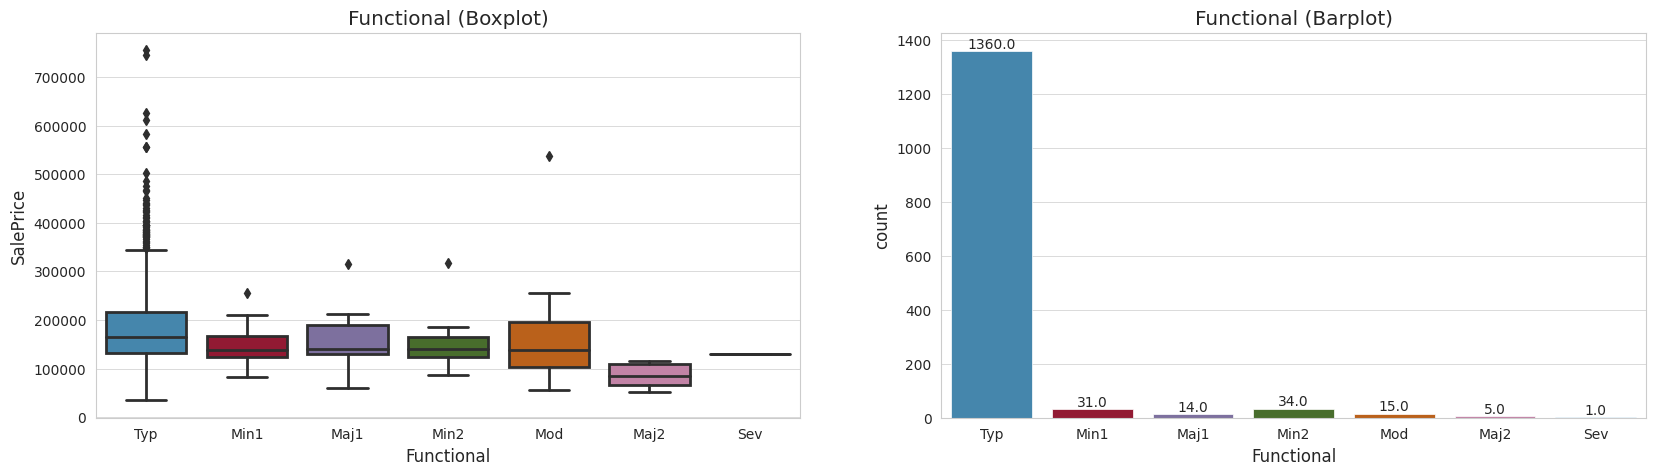

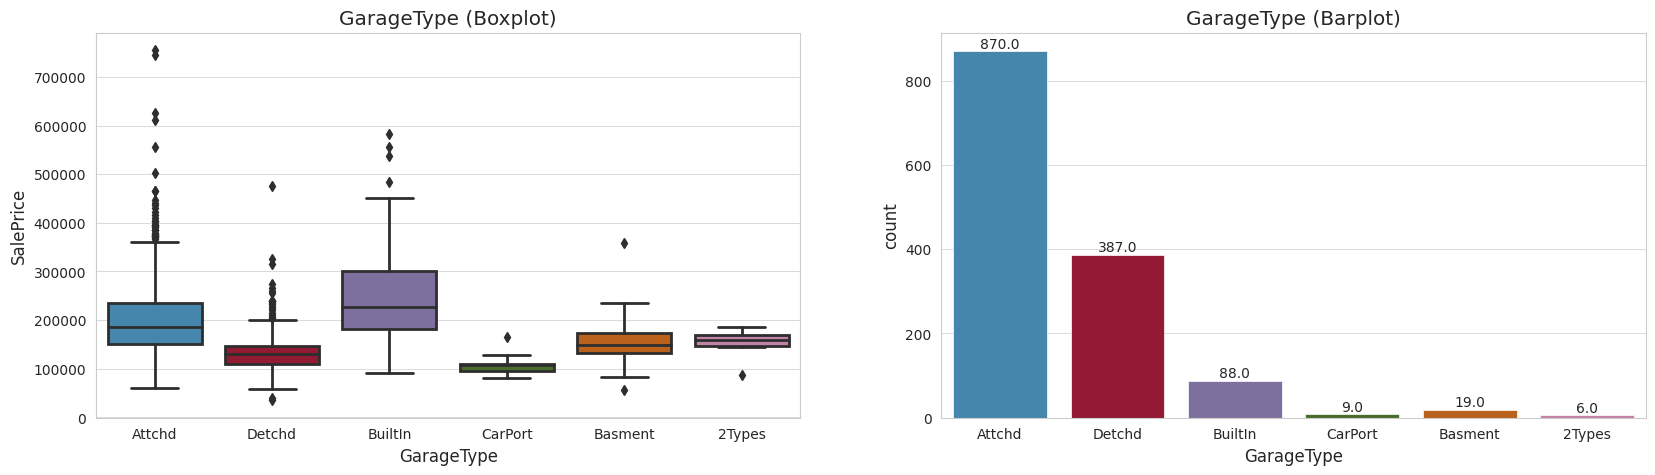

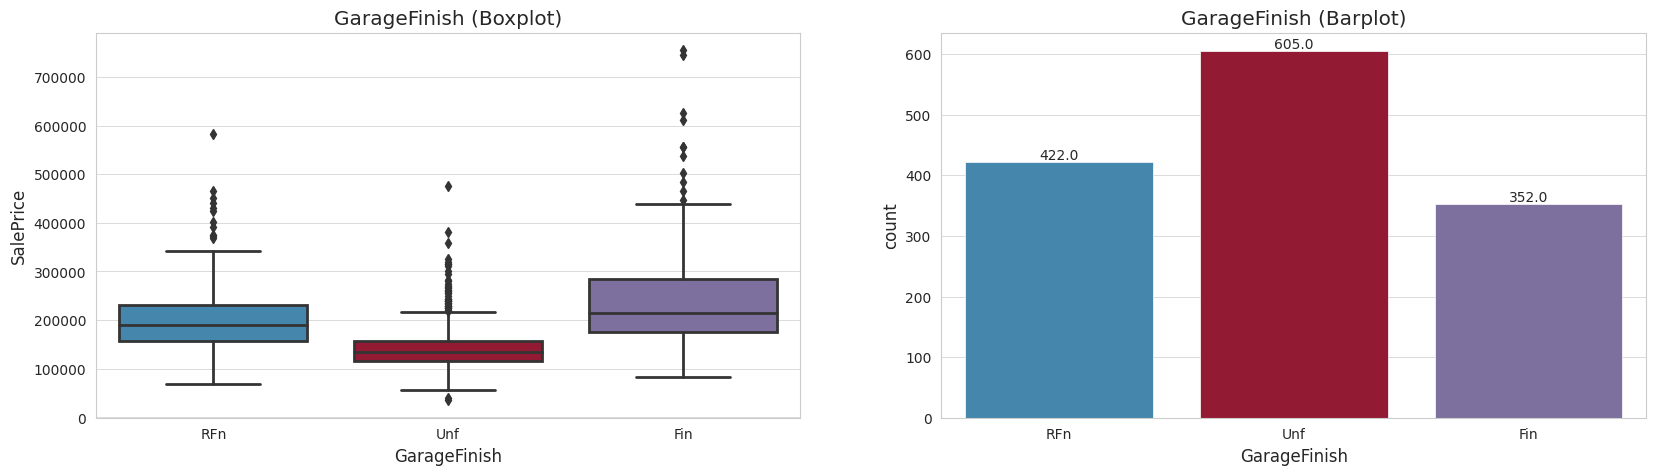

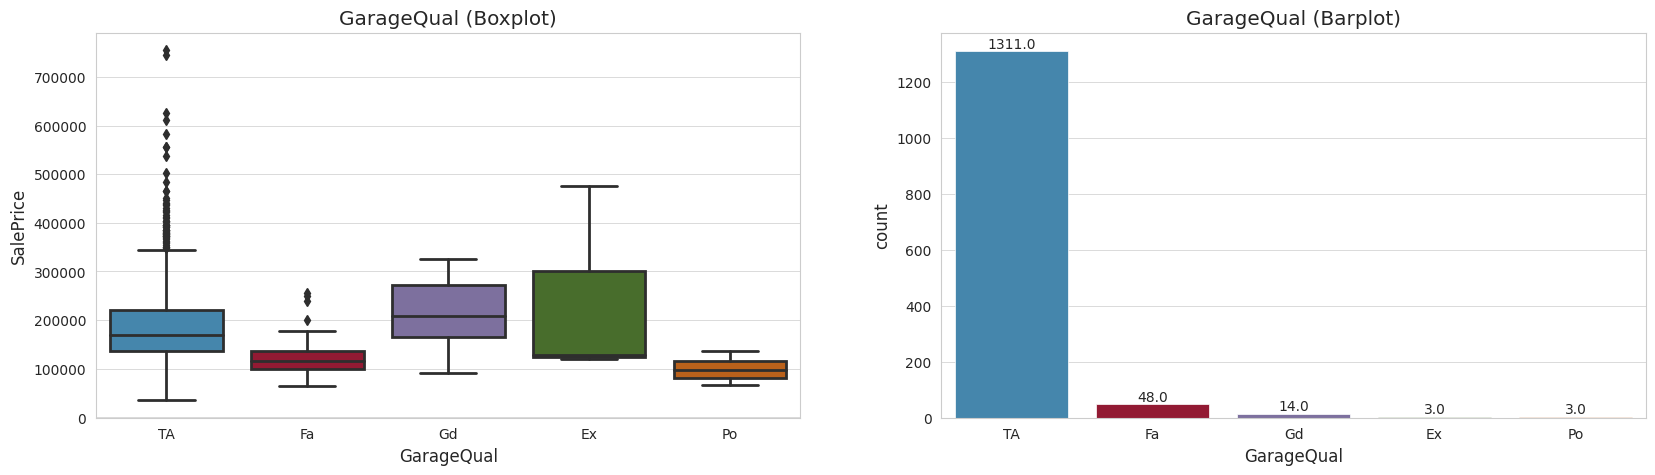

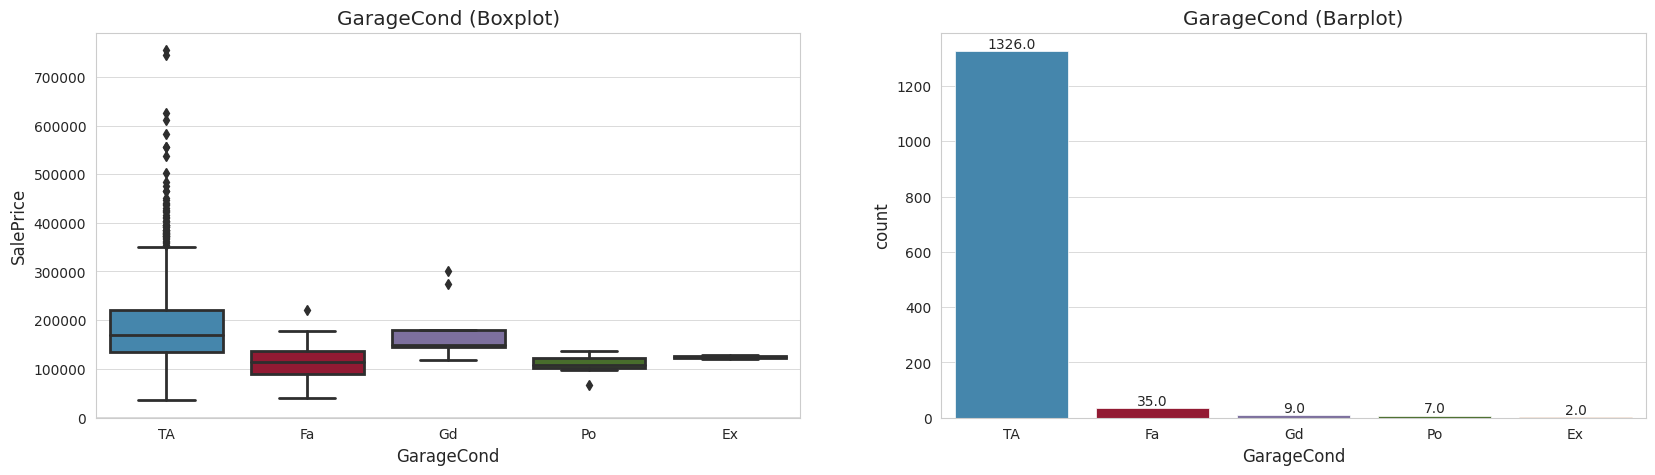

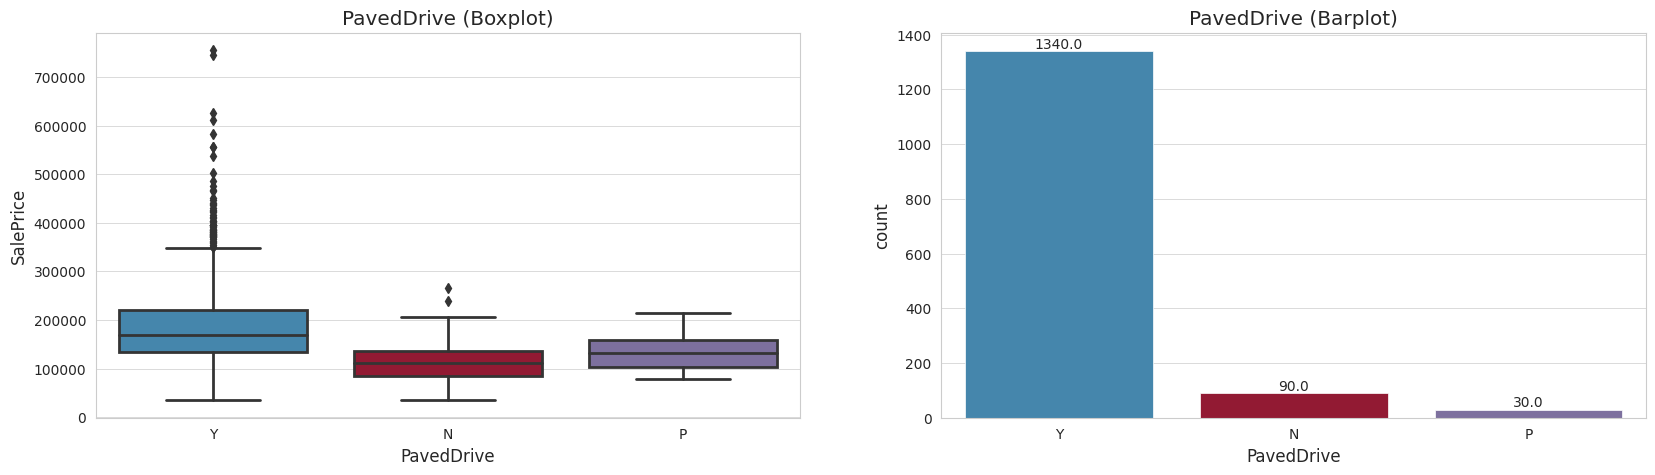

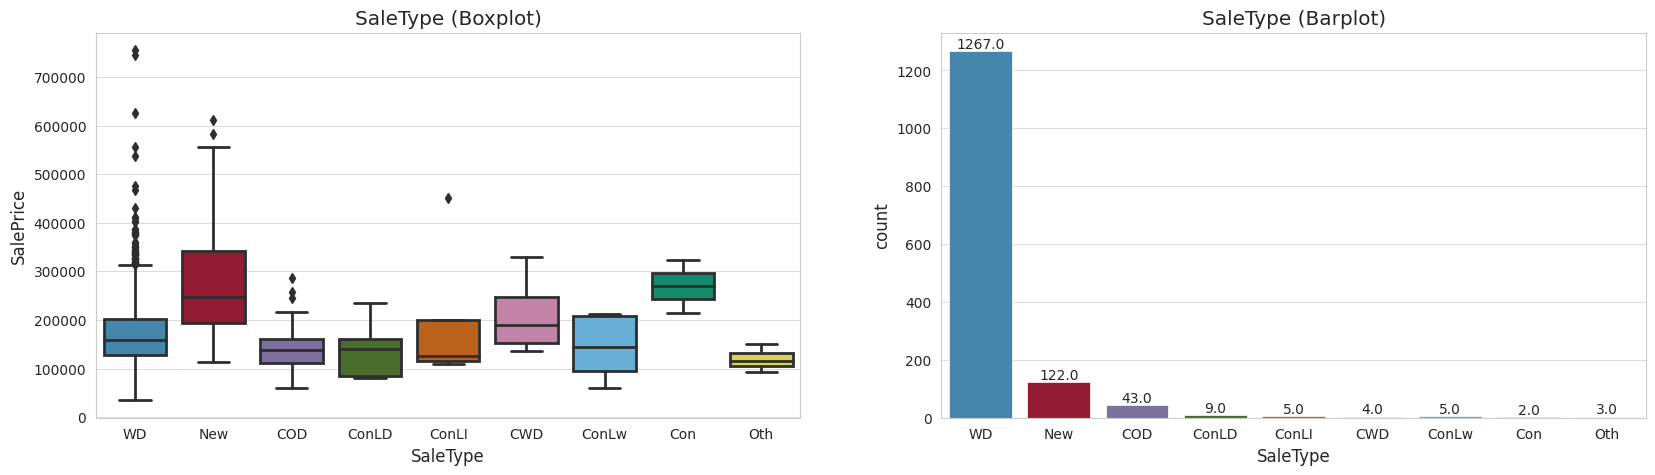

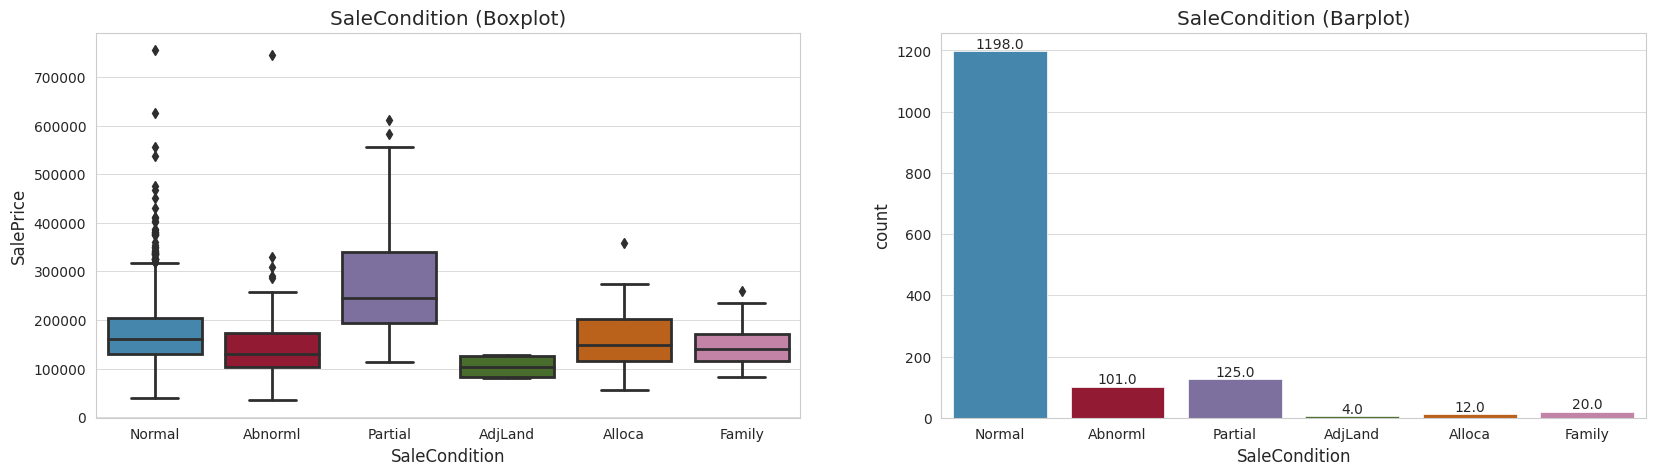

In [118]:
for i in discrete_num_var+cat_var:
    fig, axes = plt.subplots(1,2, figsize=(20, 5))
    axes[0].set_title(i+' (Boxplot)')
    sns.boxplot(y=train['SalePrice'], x=train[i], ax=axes[0])
    axes[1].set_title(i+' (Barplot)')
    sns.countplot(x=train[i], ax=axes[1])
    for patch in axes[1].patches:
        height = patch.get_height()
        axes[1].annotate(f'{height}', (patch.get_x() + patch.get_width() / 2, height), 
                         ha='center', va='bottom')

Some variables show clear trend in prices with values like overall quality, HouseStyle. While some have very skewed data counts eg. Utilities (1459:1) this will be removed as it doesnt show any variablitiy. 

Data mismatch in some other variables can be addressed using techniques like grouping, or SMOTE to make the distribution more unskewed but it is not done in this version

In [119]:
cat_var.remove('Utilities')

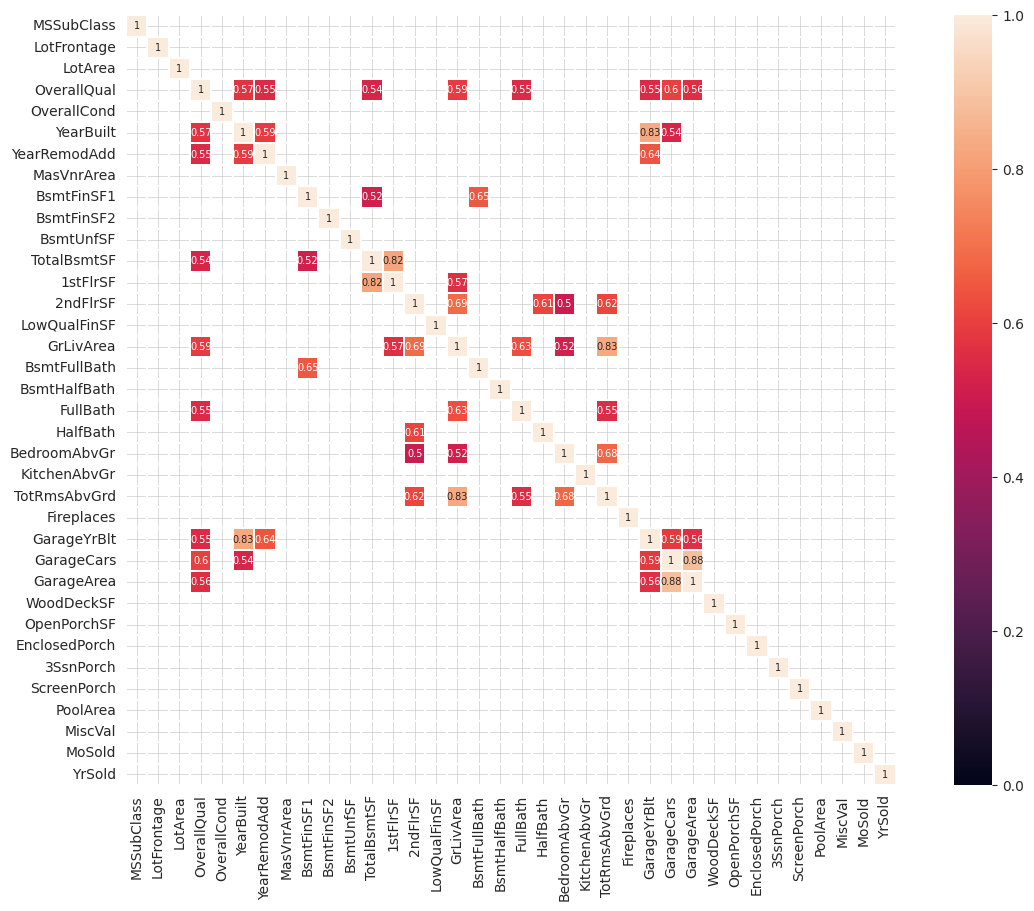

In [120]:
#create correlation matrix between numerical features (interplay: doubble-counting effect)
threshold  = 0.5
corr = abs(train_num.drop('SalePrice', axis=1).corr()) #remove abs to check negative corelation explicitly
plt.figure(figsize=(15, 10))

sns.heatmap(corr[(corr >= threshold) | (corr <= -threshold)], 
            vmax=1.0, vmin=0.0, linewidths=0.1,
            annot=True, annot_kws={"size": 7}, square=True);

Highly correlated variables, which may indicate multicollinearity can help decide which variables to include in regression model, on other hand it can lead to underfitting, loss of information. For now, this exercise is not taken

# 2. Data Preprocessing

### Creation of Dataset for processing

all numerical variables have been treated as non-categorical features.

all non-numeric variables have been treated as categorical features

In [121]:
num_features_final = [n for n in train.columns if n in best_features]

# df_train = train[cont_num_var+discrete_num_var+cat_var]
df_train = train[num_features_final+cat_var]
df_train['SalePrice'] = train['SalePrice']


print(f'{len(df_train.columns)} columns')
df_train.head()


73 columns


MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

  MSZoning Neighborhood Street LotShape LandContour LotConfig LandSlope  \
0       RL      CollgCr   Pave      Reg         Lvl    Inside       Gtl   
1       RL      Veenker   Pave      Reg         Lvl       FR2       Gtl   
2       RL      CollgCr   Pave      IR1         Lvl    Inside       Gtl   
3       RL      Crawfor   Pave      IR1         Lvl    Corner       Gtl   
4       RL      NoRidge   Pave      IR1         Lvl       FR2       Gtl   

  Condition1 Condition2 HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd  \
0       Norm       Norm     2Story     Gable  CompShg     VinylSd     VinylSd   
1      Feedr       Norm     1Story     Gable  CompShg     MetalSd     MetalSd   
2       Norm       Norm     2Story     Gable  CompShg     VinylSd     VinylSd   
3       Norm       Norm     2Story     Gable  CompShg     Wd Sdng     Wd Shng   
4       Norm       Norm     2Story     Gable  CompShg     VinylSd     VinylSd   

  BldgType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0     1Fam        Gd        TA      PConc       Gd       TA           No   
1     1Fam        TA        TA     CBlock       Gd       TA           Gd   
2     1Fam        Gd        TA      PConc       Gd       TA           Mn   
3     1

## Missing Values Handling
### A. Numerical Features

In [122]:
#check missing values
print("Numerical Features with missing values")
for col in df_train.columns:
    if col not in cat_var:
        if df_train[col].isnull().sum():
            print(f'{col}: {df_train[col].isnull().sum()}')

print("\nCategorical Features with missing values")
for col in df_train.columns:
    if col in cat_var:
        if df_train[col].isnull().sum():
            print(f'{col}: {df_train[col].isnull().sum()}')
    

Numerical Features with missing values
LotFrontage: 259
MasVnrArea: 8
GarageYrBlt: 81

Categorical Features with missing values
BsmtQual: 37
BsmtCond: 37
BsmtExposure: 38
BsmtFinType1: 37
BsmtFinType2: 38
Electrical: 1
GarageType: 81
GarageFinish: 81
GarageQual: 81
GarageCond: 81


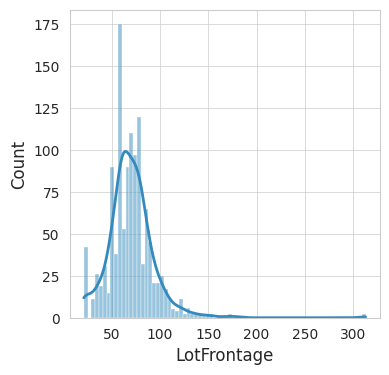

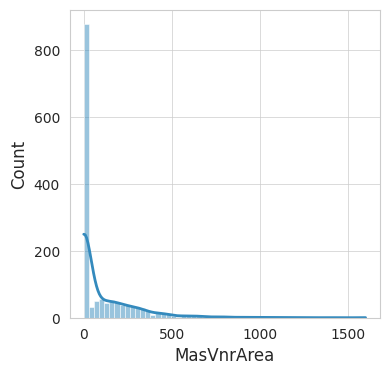

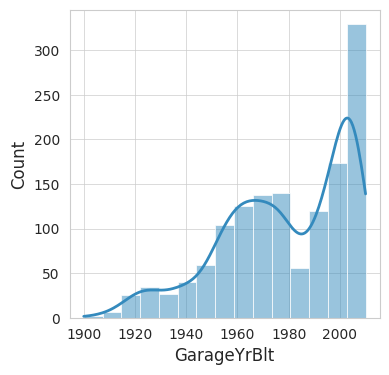

In [123]:
#check distribution
for col in (df_train.select_dtypes(include=['number']).columns):
    if (df_train[col].isnull().sum() != 0):
        plt.figure(figsize=(4,4))
        # Plot distribution of variable with missingvalue
        sns.histplot(x=df_train[col], kde = True)
        plt.xlabel(col)
        

In [124]:
df_train.select_dtypes(include=['number']).describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

0.7458904109589041


<Axes: xlabel='YearBuilt', ylabel='GarageYrBlt'>

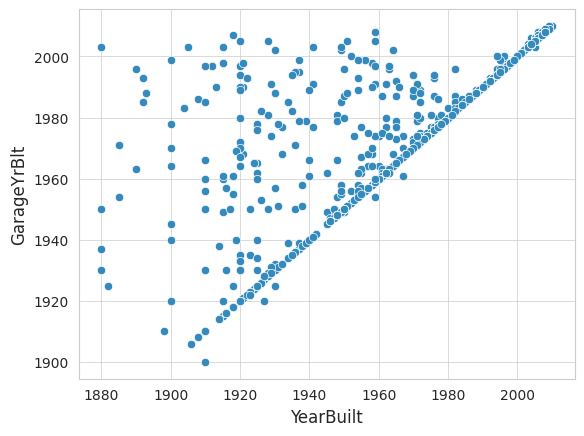

In [125]:
#checking garage year built
r = (df_train['GarageYrBlt']==df_train['YearBuilt']).astype(int).tolist()
print(sum(r)/len(r))

sns.scatterplot(y=df_train['GarageYrBlt'],x=df_train['YearBuilt'])

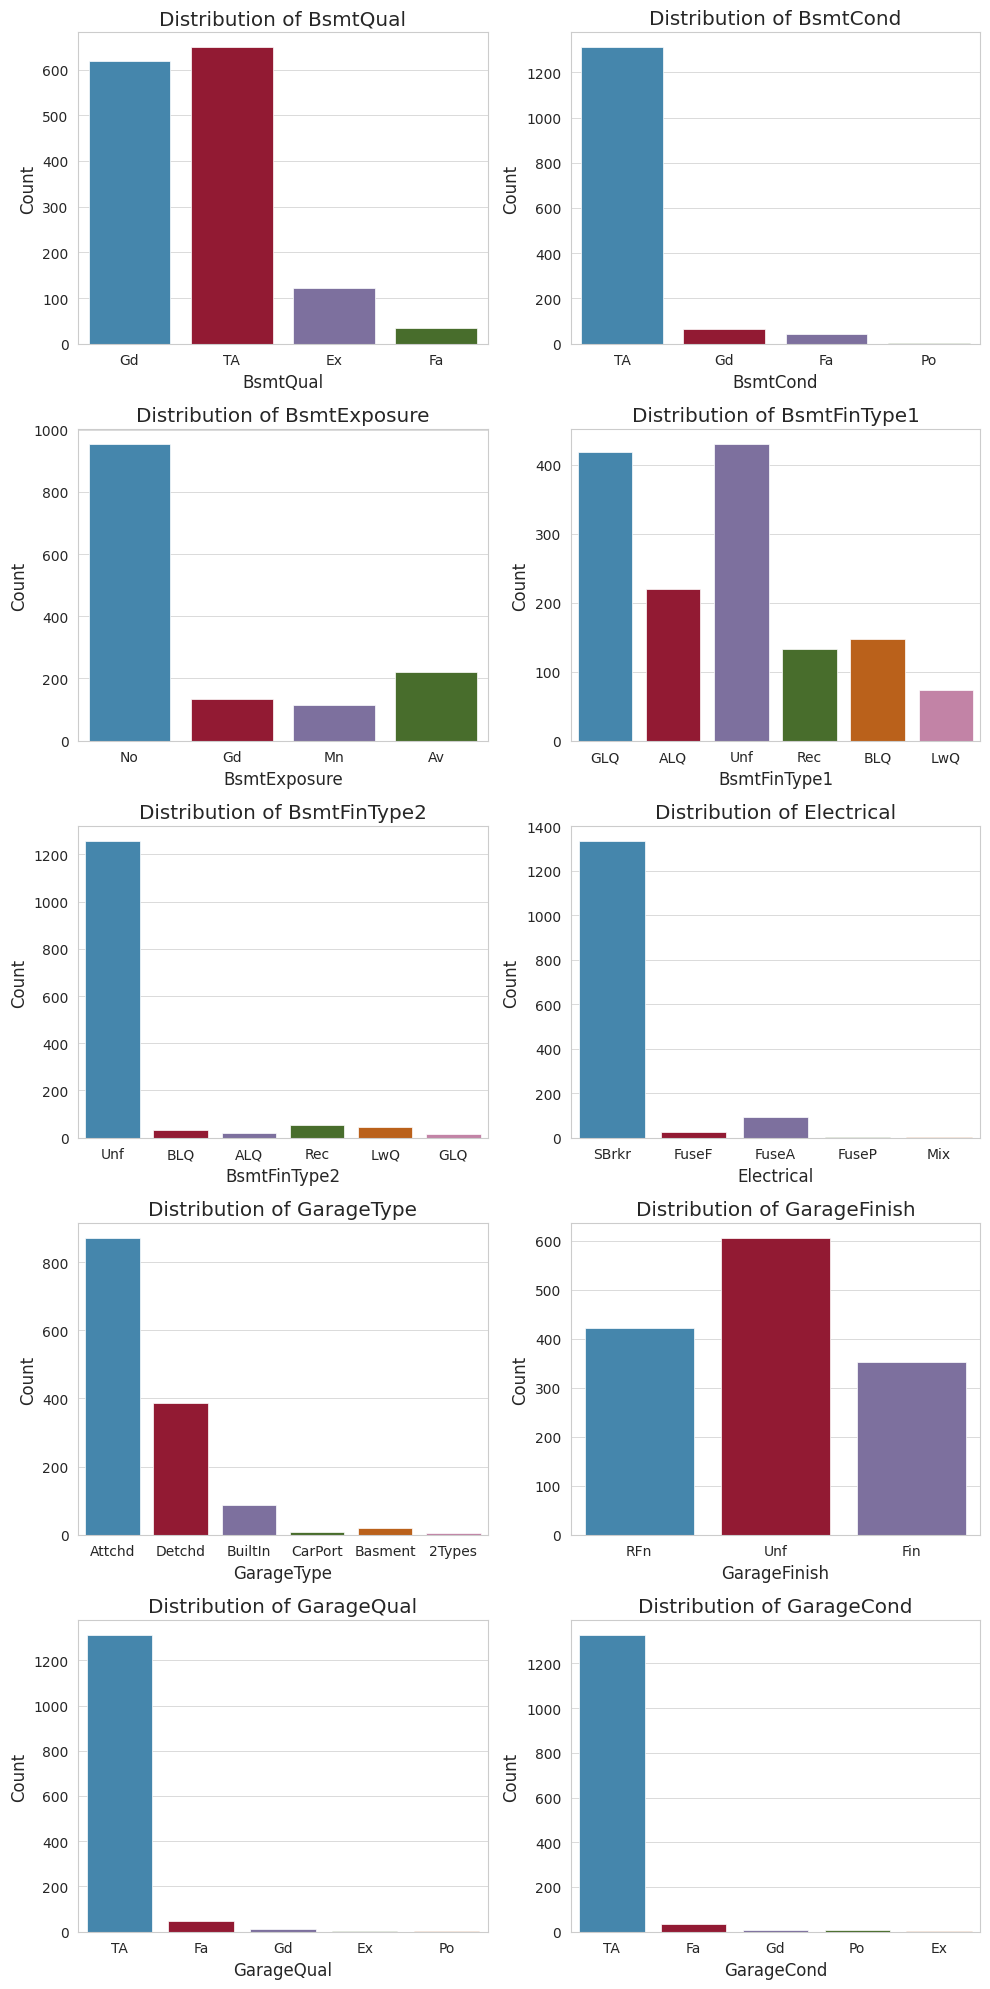

In [126]:
#check distribution of mising categorical variables

missing_categorical_columns = [col for col in df_train.select_dtypes('object').columns if df_train[col].isnull().sum() != 0]

# Calculate the number of rows needed for 2 columns
num_plots = len(missing_categorical_columns)
num_cols = 2
num_rows = (num_plots + 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, num_rows * 4))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each column
for i, col in enumerate(missing_categorical_columns):
    sns.countplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

missing values in these will be imputed by mode

In [127]:
df_train[missing_categorical_columns].isnull().sum()

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

# 3. Feature Engineering & Feature Selection
## Handling Missing Value and Feature Engineering

In [128]:
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
cat_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

from sklearn.preprocessing import OneHotEncoder
onehot_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

import datetime 
year = datetime.date.today().year #current year for feature engineering

eng_var = ['AgeSold','AgeBuilt','TotalArea','Bathrooms','Year_avg']


def add_features(df):
    
    df["AgeSold"] = int(year) - df["YrSold"].astype(int)

    df["AgeBuilt"] = int(year) - df["YearBuilt"].astype(int)

    df['TotalArea'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['GrLivArea'] +df['GarageArea']

    df['Bathrooms'] = df['FullBath'] + df['HalfBath']/2

    df['Year_avg']= (df['YearRemodAdd']+df['YearBuilt'])/2
    return df


def preprocess_train(df):

    num_columns = cont_num_var+discrete_num_var
    
    #NUMERICAL FEATURES Transformation
    df['SalePrice'] = np.log1p(df['SalePrice'])

        
    #replace missing values by median as per neighbourhood
    df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
    
    #replace Masonry Vineer Area missing values by 0 as it means No Veneer if not filled
    df["MasVnrArea"].fillna(0, inplace=True)
    
    #for 75% data garagebuiltyear is same as yearbuilt 
    grg = ['GarageCars','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt', 'GarageArea']
    garage_present = df[grg].notnull().all(axis=1)
    df['GarageYrBlt'] = np.where(df['GarageYrBlt'].isnull() & garage_present, df['YearBuilt'], df['GarageYrBlt'])
    
    #apply log transformation to relevant numerical features:
    cols_logtf = ['LotFrontage', 'GrLivArea', '1stFlrSF', 'LotArea']
    df[cols_logtf] =  np.log1p(df[cols_logtf])
        
    #fill any other numerical missing values by median of data
    df[num_columns] = num_imputer.fit_transform(df[num_columns])
    
    #add new features
    df = add_features(df)
    
    #scale numerical features
    columns_to_scale = num_columns + eng_var
    
    scaler.fit(df[columns_to_scale])
    df[columns_to_scale] = scaler.transform(df[columns_to_scale])  #scaling numerical columns     
    

    ##CATEGORICAL COLUMNS
    #fill missing values in categorical columns by mode
    grg_cat = ['GarageQual','GarageType', 'GarageFinish', 'GarageCond']
    if(df['GarageYrBlt'].isnull().sum() == 0 ):
        df[grg_cat]= cat_imputer.fit_transform(df[grg_cat])
    
    df[cat_var] = cat_imputer.fit_transform(df[cat_var]) # fill remaining categorical columns with mode
    
    #categorical columns one hot encoding   
    onehot_enc.fit(df[cat_var])
    encoded_cols = list(onehot_enc.get_feature_names_out(cat_var))
    df[encoded_cols] = onehot_enc.transform(df[cat_var])     
    
    final_cols = list(columns_to_scale + encoded_cols)
    final_cols.append('SalePrice')
    df = df[final_cols]
    
    #move sale price to last column
#     cols = list(df.columns)
#     cols.remove('SalePrice')
#     cols.append('SalePrice')
#     df = df[cols]
    
    

    print(f'missing values {df.isnull().sum().sum()}')
    if (df.isnull().sum().sum() != 0):
        print(df.isnull().sum()) 
        
    return (df) 

In [129]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv') #training dataset
train = train[[col for col in train if train[col].isnull().sum() / len(train) <= 0.2]]
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond Foundation  \
0  CompShg     VinylSd     VinylSd       196.0        Gd        TA      PConc   
1  CompShg     MetalSd     MetalSd         0.0        TA        TA     CBlock   
2  CompShg     VinylSd     VinylSd       162.0        Gd        TA      PConc   
3  CompShg     Wd Sdng     Wd Shng         0.0        TA        TA     BrkTil   
4  CompShg     VinylSd     VinylSd       350.0        Gd        TA      PConc   

  BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0       Gd       TA           No          GLQ         706          Unf   
1       Gd       TA           Gd          ALQ         978          Unf   
2       Gd       TA           Mn          GLQ         486          Unf   
3       TA       Gd           No          ALQ         216          Unf   
4       Gd       TA           Av          GLQ         655          Unf   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
0           0        150          856    GasA        Ex          Y      SBrkr   
1           0        284         1262    GasA        Ex          Y      SBrkr   
2           0        434          920    GasA        Ex          Y      SBrkr   
3           0        540          756    GasA        Gd          Y      SBrkr   
4           0        490         1145    GasA        Ex          Y      SBrkr   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1          Gd             8   
1         2         0             3             1          TA             6   
2         2         1             3             1          Gd             6   
3         1         0             3             1          Gd             7   
4         2         1             4             1          Gd             9   

  Functional  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  \
0        Typ           0     Attchd       2003.0          RFn           2   
1        Typ           1     Attchd       1976.0          RFn      

In [130]:
train_df = preprocess_train(train)
train_df.head()

missing values 0


LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0    -0.257516 -0.267660   0.652174      0.243243    1.193303    0.452790   
1     0.464671  0.029682   0.065217     -0.486486    0.000000    0.834679   
2    -0.100761  0.399288   0.608696      0.216216    0.986301    0.143910   
3    -0.535329  0.017513  -1.260870     -0.648649    0.000000   -0.235170   
4     0.634651  0.951802   0.586957      0.162162    2.130898    0.381186   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         0.0  -0.559829    -0.269652 -0.524119  1.173077           0.0   
1         0.0  -0.330769     0.538308  0.327547  0.000000           0.0   
2         0.0  -0.074359    -0.142289 -0.365950  1.189560           0.0   
3         0.0   0.106838    -0.468657 -0.270300  1.038462           0.0   
4         0.0   0.021368     0.305473  0.114059  1.446429           0.0   

   GrLivArea  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0   0.342891     0.589744    0.281573    0.000000     0.529412            0.0   
1  -0.327743    -0.102564   -0.082816    1.773810    -0.367647            0.0   
2   0.438896     0.538462    0.530021    0.000000     0.250000            0.0   
3   0.351910     0.461538    0.670807    0.000000     0.147059          272.0   
4   0.897190     0.512821    1.474120    1.142857     0.867647            0.0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MSSubClass  BsmtFullBath  \
0        0.0          0.0       0.0      0.0         0.2           1.0   
1        0.0          0.0       0.0      0.0        -0.6           0.0   
2        0.0          0.0       0.0      0.0         0.2           1.0   
3        0.0          0.0       0.0      0.0         0.4           1.0   
4        0.0          0.0       0.0      0.0         0.2           1.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0           0.0       0.0       1.0           0.0           0.0           1.0   
1           1.0       0.0       0.0           0.0           0.0           0.0   
2           0.0       0.0       1.0           0.0           0.0           0.0   
3           0.0      -1.0       0.0           0.0           0.0           0.5   
4           0.0       0.0       1.0           1.0           0.0           1.5   

   Fireplaces  GarageCars    MoSold  YrSold  OverallQual  OverallCond  \
0        -1.0         0.0 -1.333333     0.0          0.5          0.0   
1         0.0         0.0 -0.333333    -0.5          0.0          3.0   
2         0.0         0.0  1.000000     0.0          0.5          0.0   
3         0.0         1.0 -1.333333    -1.0          0.5          0.0   
4         0.0         1.0  2.000000     0.0          1.0          0.0   

   AgeSold  AgeBuilt  TotalArea  Bathrooms  Year_avg  MSZoning_C (all)  \
0      0.0 -0.652174   0.547123   0.333333  0.643533               0.0   
1      0.5 -0.065217  -0.126846   0.000000 -0.037855               0.0   
2      0.0 -0.608696   0.718302   0.333333  0.605678               0.0   
3      1.0  1.260870   0.416483  -0.666667 -0.883281               0.0   
4      0.0 -0.586957   1.523702   0.333333  0.567823               0.0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Neighborhood_Blmngtn  \
0          0.0          0.0          1.0          0.0                   0.0   
1          0.0          0.0          1.0          0.0                   0.0   
2          0.0          0.0          1.0          0.0                   0.0   
3          0.0          0.0          1.0          0.0                   0.0   
4          0.0          0.0          1.0          0.0                   0.0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                   0.0                  0.0                   0.0   
1                   0.0                  0.0                   0.0   
2                   0.0                  0.0                   0.0   
3                   0.0        

In [131]:
train_df.shape

(1460, 270)

In [132]:
def preprocess_test(df):

    num_columns = cont_num_var+discrete_num_var
    
    #NUMERICAL FEATURES Transformation
        
    #replace missing values by median as per neighbourhood
    df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
    
    #replace Masonry Vineer Area missing values by 0 as it means No Veneer if not filled
    df["MasVnrArea"].fillna(0, inplace=True)
    
    #for 75% data garagebuiltyear is same as yearbuilt 
    grg = ['GarageCars','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt', 'GarageArea']
    garage_present = df[grg].notnull().all(axis=1)
    df['GarageYrBlt'] = np.where(df['GarageYrBlt'].isnull() & garage_present, df['YearBuilt'], df['GarageYrBlt'])
    
    #apply log transformation to relevant numerical features:
    cols_logtf = ['LotFrontage', 'GrLivArea', '1stFlrSF', 'LotArea']
    df[cols_logtf] =  np.log1p(df[cols_logtf])
        
    #fill any other numerical missing values by median of data
    df[num_columns] = num_imputer.fit_transform(df[num_columns])
    
    #add new features
    df = add_features(df)
    
    #scale numerical features
    columns_to_scale = num_columns + eng_var
    
    scaler.fit(df[columns_to_scale])
    df[columns_to_scale] = scaler.transform(df[columns_to_scale])  #scaling numerical columns     
    

    ##CATEGORICAL COLUMNS
    #fill missing values in categorical columns by mode
    grg_cat = ['GarageQual','GarageType', 'GarageFinish', 'GarageCond']
    if(df['GarageYrBlt'].isnull().sum() == 0 ):
        df[grg_cat]= cat_imputer.fit_transform(df[grg_cat])
    
    df[cat_var] = cat_imputer.fit_transform(df[cat_var]) # fill remaining categorical columns with mode
    
    #categorical columns one hot encoding   
    onehot_enc.fit(df[cat_var])
    encoded_cols = list(onehot_enc.get_feature_names_out(cat_var))
    df[encoded_cols] = onehot_enc.transform(df[cat_var])     
    
    final_cols = list(columns_to_scale + encoded_cols)
    df = df[final_cols]

    print(f'missing values {df.isnull().sum().sum()}')
    if (df.isnull().sum().sum() != 0):
        print(df.isnull().sum()) 
        
    return (df) 

In [133]:
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv') #test dataset

test_df = test
test_df = preprocess_test(test)
test_df.head()

missing values 0


LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0     0.464671  0.478578  -0.250000     -0.756098    0.000000    0.156250   
1     0.507940  0.940827  -0.312500     -0.829268    0.666667    0.761303   
2     0.193276  0.870697   0.500000      0.146341    0.000000    0.585771   
3     0.376507  0.134759   0.520833      0.146341    0.123457    0.334441   
4    -1.687348 -1.420502   0.395833      0.000000    0.000000   -0.116356   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0       144.0  -0.328720    -0.203846 -0.404736  0.000000           0.0   
1         0.0  -0.093426     0.655769  0.453911  0.000000           0.0   
2         0.0  -0.558824    -0.115385 -0.328322  1.036982           0.0   
3         0.0  -0.235294    -0.119231 -0.333020  1.002959           0.0   
4         0.0   0.963668     0.561538  0.372079  0.000000           0.0   

   GrLivArea  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0  -1.085682    -0.444444    0.968992    0.833333    -0.388889            0.0   
1  -0.172866    -0.518519   -0.651163    2.339286     0.111111            0.0   
2   0.298518     0.444444    0.007752    1.261905     0.083333            0.0   
3   0.262698     0.469136   -0.038760    2.142857     0.111111            0.0   
4  -0.259860     0.320988    0.100775    0.000000     0.750000            0.0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MSSubClass  BsmtFullBath  \
0        0.0        120.0       0.0      0.0        -0.6           0.0   
1        0.0          0.0       0.0  12500.0        -0.6           0.0   
2        0.0          0.0       0.0      0.0         0.2           0.0   
3        0.0          0.0       0.0      0.0         0.2           0.0   
4        0.0        144.0       0.0      0.0         1.4           0.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0           0.0      -1.0       0.0          -1.0           0.0          -0.5   
1           0.0      -1.0       1.0           0.0           0.0           0.0   
2           0.0       0.0       1.0           0.0           0.0           0.0   
3           0.0       0.0       1.0           0.0           0.0           0.5   
4           0.0       0.0       0.0          -1.0           0.0          -0.5   

   Fireplaces  GarageCars  MoSold  YrSold  OverallQual  OverallCond  AgeSold  \
0         0.0        -1.0    0.00     1.0         -0.5          1.0     -1.0   
1         0.0        -1.0    0.00     1.0          0.0          1.0     -1.0   
2         1.0         0.0   -0.75     1.0         -0.5          0.0     -1.0   
3         1.0         0.0    0.00     1.0          0.0          1.0     -1.0   
4         0.0         0.0   -1.25     1.0          1.0          0.0     -1.0   

   AgeBuilt  TotalArea  Bathrooms  Year_avg  MSZoning_C (all)  MSZoning_FV  \
0  0.250000  -0.219596       -1.0 -0.380952               0.0          0.0   
1  0.312500  -0.183528       -0.5 -0.452381               0.0          0.0   
2 -0.500000   0.385372        0.5  0.488095               0.0          0.0   
3 -0.520833   0.340551        0.5  0.500000               0.0          0.0   
4 -0.395833  -0.008049        0.0  0.357143               0.0          0.0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Neighborhood_Blmngtn  \
0          1.0          0.0          0.0                   0.0   
1          0.0          1.0          0.0                   0.0   
2          0.0          1.0          0.0                   0.0   
3          0.0          1.0          0.0                   0.0   
4          0.0          1.0          0.0                   0.0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                   0.0                  0.0                   0.0   
1                   0.0                  0.0                   0.0   
2                   0.0                  0.0                   0.0   
3                   0.0                  0.

In [136]:
def reindex(train_df, test_df):
    train_columns = set(train_df.columns)
    test_columns = set(test_df.columns)
    
    missing_in_train = test_columns - train_columns
    missing_in_test = train_columns - test_columns
        
    print(missing_in_train)
    print()
    print(missing_in_test)

    test_df[list(missing_in_test)] = 0 #put 0 for all missing columns in test set to match dimensions of features

#   reindex test data with same order of columns as training data
    col = [c for c in train_df.columns if c !='SalePrice']
    test_df = test_df[col]    
    
    test_columns = set(test_df.columns)
    missing_in_train = test_columns - train_columns
    missing_in_test = train_columns - test_columns
   
    print(missing_in_train)
    print()
    print(missing_in_test)

    return(test_df)

In [137]:
test_df = reindex(train_df, test_df)

set()

{'Heating_Floor', 'Condition2_RRNn', 'Electrical_Mix', 'Condition2_RRAe', 'RoofMatl_Membran', 'RoofMatl_Roll', 'RoofMatl_Metal', 'Exterior1st_Stone', 'Heating_OthW', 'GarageQual_Ex', 'Condition2_RRAn', 'RoofMatl_ClyTile', 'Exterior2nd_Other', 'Exterior1st_ImStucc', 'SalePrice', 'HouseStyle_2.5Fin'}
set()

{'SalePrice'}


# 4. Machine Learning Models

Now given input x, we will try to predict output y after training different models and evaluating best using the test data

In [138]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm
from sklearn.metrics import mean_squared_error #MSE Metric used

In [139]:
# Defining the RMSE function
from sklearn.metrics import mean_squared_error
def score(y_hat, y):
    return mean_squared_error(y_hat, y, squared = False)

score_dict = {} #stores results of models


In [140]:
x = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

In [141]:
#splitting training data
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y,test_size = .3, random_state=50)

In [142]:
# creating NN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()

# input layer
model.add(Dense(x_train.shape[1], activation = 'linear'))

# hidden layers
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))

# output layer
model.add(Dense(1))

optimizer =  Adam(0.001)
model.compile(optimizer=optimizer,loss='mse')

In [143]:
model.fit(x=x_train,y=y_train.values,
          validation_data=(x_val,y_val.values),
          batch_size=128,epochs =600, verbose = 0)


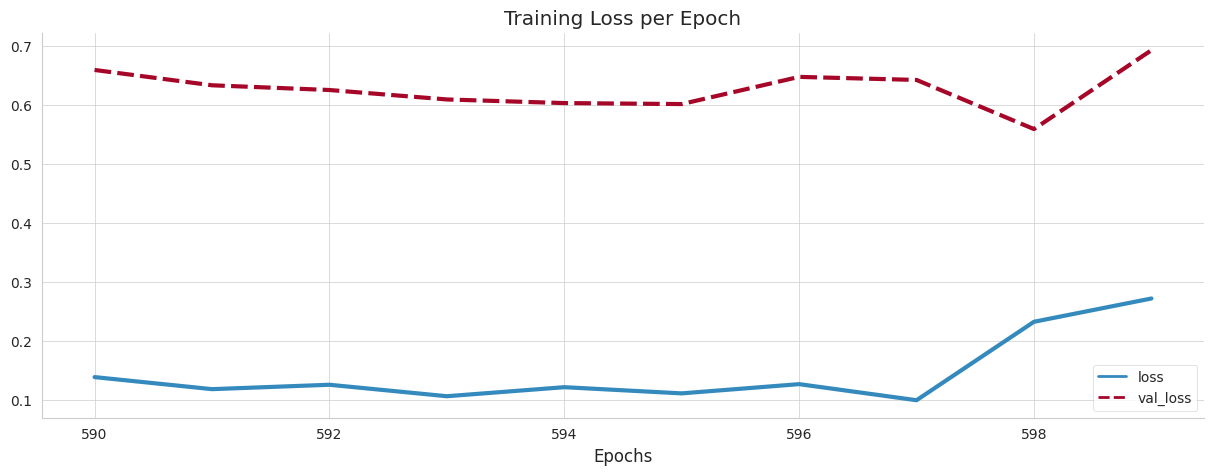

In [144]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses[590:],lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [145]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(x_val)

print('RMSE: ',score(predictions, y_val))
score_dict['NN'] = score(predictions, y_val)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
RMSE:  0.8320577782599257


In [146]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression

lreg=LinearRegression()
MSEs=ms.cross_val_score(lreg, x, y, scoring='neg_mean_squared_error', cv=5)
meanMSE=np.mean(MSEs)
print(meanMSE)
sc = math.sqrt(-meanMSE)
print('RMSE = '+str(sc))

score_dict['LR'] = sc
score_dict

-224830806.08481488
RMSE = 14994.3591421846


{'NN': 0.8320577782599257, 'LR': 14994.3591421846}

In [147]:
#GLM Model using scikitlearn

from sklearn.linear_model import GammaRegressor

x_glm = np.hstack([np.ones((x.shape[0], 1)), x]) #add constant 

#using GLM
glm = GammaRegressor()
glm.fit(x_glm, y)

MSEs=ms.cross_val_score(glm, x_glm, y, scoring='neg_mean_squared_error', cv=5)
meanMSE=np.mean(MSEs)
print(meanMSE)
sc = math.sqrt(-meanMSE)
print('RMSE = '+str(sc))

score_dict['GLM scikitlearn'] = sc
score_dict

-0.159634910632691
RMSE = 0.3995433776609131


{'NN': 0.8320577782599257,
 'LR': 14994.3591421846,
 'GLM scikitlearn': 0.3995433776609131}

In [148]:
import statsmodels.api as sm

x_glm = sm.add_constant(x)
# x_glm.head()

glm = sm.GLM(y,x_glm , family=sm.families.Gamma(link=sm.families.links.log()))
glm_results = glm.fit()

glm_results.predict(x_glm)  #de-normalized prices, need to do np.exp1m() to get actual price values

# Print summary of GLM results
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              SalePrice   No. Observations:                 1460
Model:                            GLM   Df Residuals:                     1233
Model Family:                   Gamma   Df Model:                          226
Link Function:                    log   Scale:                      7.1669e-05
Method:                          IRLS   Log-Likelihood:                 1375.2
Date:                Tue, 04 Jun 2024   Deviance:                     0.088837
Time:                        15:58:50   Pearson chi2:                   0.0884
No. Iterations:                   100   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

In [149]:
#RMSE check on val set with GLM
x_train_scaled_glm = np.hstack([np.ones((x_train.shape[0], 1)), x_train]) #add constant 
x_val_scaled_glm = np.hstack([np.ones((x_val.shape[0], 1)), x_val]) #add constant 

y_hat_train = glm_results.predict(x_train_scaled_glm) 
y_hat_val = glm_results.predict(x_val_scaled_glm) 

print(f'Root Mean Square Error train =  {score(y_hat_train, y_train)}')
print(f'Root Mean Square Error test =  {score(y_hat_val, y_val)}')

score_dict['GLM statsmodel'] = score(y_hat_val, y_val)
score_dict

Root Mean Square Error train =  0.09233512057900824
Root Mean Square Error test =  0.093572045935614


{'NN': 0.8320577782599257,
 'LR': 14994.3591421846,
 'GLM scikitlearn': 0.3995433776609131,
 'GLM statsmodel': 0.093572045935614}

### Ridge Regression
   1. Minimize squared error + term "alpha" that penalizes the error
   2. optimize alpha that minimizes the train and test error (avoid overfitting)


In [150]:
#Ridge Regression

import sklearn.model_selection as GridSearchCV
from sklearn.linear_model import Ridge

ridge=Ridge()
parameters= {'alpha':np.linspace(1.5,5, 100)}

ridge_reg=ms.GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)

ridge_reg.fit(x_train,y_train)

print(f"The best value of Alpha is: {ridge_reg.best_params_['alpha']}")
print(f"The best score achieved with Alpha is: {math.sqrt(-ridge_reg.best_score_)}")


The best value of Alpha is: 5.0
The best score achieved with Alpha is: 0.1401651714653357


In [151]:
ridge_mod=Ridge(alpha=ridge_reg.best_params_['alpha'])
ridge_mod.fit(x_train,y_train)

y_pred_train=ridge_mod.predict(x_train)
y_pred_val=ridge_mod.predict(x_val)

print(f'Root Mean Square Error train =  {score(y_pred_train, y_train)}')
print(f'Root Mean Square Error test =  {score(y_pred_val, y_val)}')

score_dict['Ridge'] = score(y_pred_val, y_val)
score_dict

Root Mean Square Error train =  0.09960281862320487
Root Mean Square Error test =  0.12836033921426976


{'NN': 0.8320577782599257,
 'LR': 14994.3591421846,
 'GLM scikitlearn': 0.3995433776609131,
 'GLM statsmodel': 0.093572045935614,
 'Ridge': 0.12836033921426976}

The Train/Test split method can sometimes yield inaccurate results, particularly if the data distribution varies within the dataset. Cross-validation is a technique to address this issue. By specifying the number of folds (e.g., cv=5 for datasets ~1000-10,000), the dataset is divided into five equal parts, and the model is trained and tested five times. Each time, one fold is held out as the validation set, while the remaining folds are used for training.

In [152]:
#Ridge Regression
Ridge_CV=Ridge(alpha=ridge_reg.best_params_['alpha'])
MSEs=ms.cross_val_score(Ridge_CV, x, y, scoring='neg_mean_squared_error', cv=5)

#RMSE score of the 5 folds
print("RMSE scores of the 5 folds:")
for i,j in enumerate(MSEs):
    j= math.sqrt(np.mean(-j))
    print(f'Fold {i}: {round(j,4)}')

#Final RMSE score
print(f'Mean RMSE with Ridge: {round(math.sqrt(np.mean(-MSEs)),8)}')

RMSE scores of the 5 folds:
Fold 0: 0.108
Fold 1: 0.1387
Fold 2: 0.127
Fold 3: 0.112
Fold 4: 0.1624
Mean RMSE with Ridge: 0.13111461


In [153]:
#Lasso Regression

from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}
# parameters= {'alpha':np.linspace(0.000109,0.0002,30)}

lasso=Lasso()
lasso_reg=ms.GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
lasso_reg.fit(x_train,y_train)

print(f'The best value of Alpha is: {lasso_reg.best_params_}')



The best value of Alpha is: {'alpha': 0.0001}


In [154]:
lasso_mod=Lasso(alpha=lasso_reg.best_params_['alpha'])
lasso_mod.fit(x_train,y_train)
y_pred_train=lasso_mod.predict(x_train)
y_pred_val=lasso_mod.predict(x_val)
y_pred_lasso =y_pred_val
print(f'Root Mean Square Error train =  {score(y_pred_train, y_train)}')
print(f'Root Mean Square Error test =  {score(y_pred_val, y_val)}')

score_dict['Lasso'] = score(y_pred_val, y_val)
score_dict

Root Mean Square Error train =  0.08738640193428879
Root Mean Square Error test =  0.1326505875079902


{'NN': 0.8320577782599257,
 'LR': 14994.3591421846,
 'GLM scikitlearn': 0.3995433776609131,
 'GLM statsmodel': 0.093572045935614,
 'Ridge': 0.12836033921426976,
 'Lasso': 0.1326505875079902}

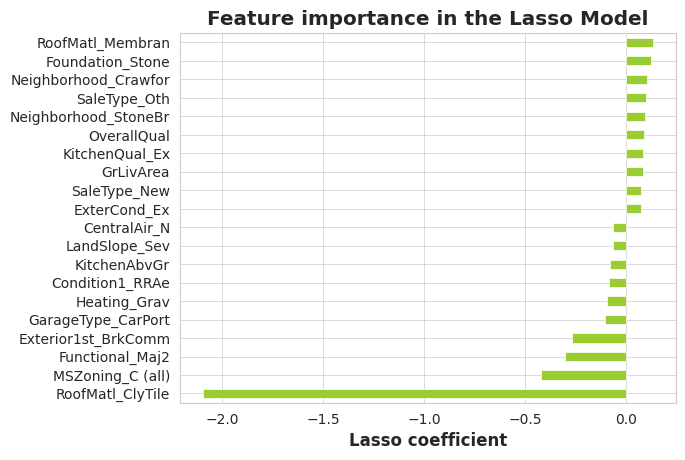

In [155]:
coefs = (pd.Series(lasso_mod.coef_, index = x_val.columns))

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color='yellowgreen')
plt.xlabel("Lasso coefficient", weight='bold')
plt.title("Feature importance in the Lasso Model", weight='bold')
plt.show()

In [156]:
print(f"Lasso kept {sum(coefs != 0)} important features and dropped the other  {sum(coefs == 0)} features")

Lasso kept 181 important features and dropped the other  88 features


In [157]:
#lasso with cross validation
Lasso_CV=Lasso(alpha=lasso_reg.best_params_['alpha'])
MSEs=ms.cross_val_score(Lasso_CV, x, y, scoring='neg_mean_squared_error', cv=5)

#RMSE score of the 5 folds
print("RMSE scores of the 5 folds:")
for i,j in enumerate(MSEs):
    j= math.sqrt(np.mean(-j))
    print(f'Fold {i}: {round(j,4)}')

#Final RMSE score with Lasso
print(f'Mean RMSE with Lasso: {round(math.sqrt(np.mean(-MSEs)),4)}')

RMSE scores of the 5 folds:
Fold 0: 0.1045
Fold 1: 0.1454
Fold 2: 0.1409
Fold 3: 0.1062
Fold 4: 0.1641
Mean RMSE with Lasso: 0.1342


### ElasticNet

In [158]:
from sklearn.linear_model import ElasticNetCV

alphas = np.logspace(-4,2,100)
l1ratio = np.linspace(0.1, 1.0, 10)

alphas = [0.000542555]
l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

# param_grid = {
#     'alpha': [0.1, 1.0, 10.0],
#     'l1_ratio': [0.1, 0.5, 0.9]
# }

elastic_net = ElasticNetCV(max_iter=10000000)

# grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5)
# grid_search.fit(x_train, y_train.ravel())

elastic_cv = ElasticNetCV(cv=5, max_iter=10000000, alphas=alphas,  l1_ratio=l1ratio)

elasticmod = elastic_cv.fit(x_train, y_train.ravel())

In [159]:
y_hat=elasticmod.predict(x_val)
y_pred_elastic =y_hat

print(f'Root Mean Square Error test = {score(y_hat, y_val)}')
print(elastic_cv.alpha_)
print(elastic_cv.l1_ratio_)

score_dict['ElasticNet'] = score(y_hat, y_val)
score_dict

Root Mean Square Error test = 0.12471324227824965
0.000542555
0.9


{'NN': 0.8320577782599257,
 'LR': 14994.3591421846,
 'GLM scikitlearn': 0.3995433776609131,
 'GLM statsmodel': 0.093572045935614,
 'Ridge': 0.12836033921426976,
 'Lasso': 0.1326505875079902,
 'ElasticNet': 0.12471324227824965}

### XGBoost

In [160]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Grid search for best params
param_grid = {'max_depth':[3],
          'learning_rate':[0.02,0.03],
          'min_child_weight':[1,3],
#           'reg_lambda':[1,0.5,0.01,0.001],
          'reg_lambda':[10,5,1,0.1],
#           'reg_alpha':[0.0001,0.001,0.01,0.1],      
          'reg_alpha':[0.05,0.03, 0.01],      
          'colsample_bytree':[0.5],
          'n_estimators':[800,1500]
}

# Instantiate reg for gridsearch
reg = XGBRegressor()

# Conduct the gridsearch
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid,cv = 5, n_jobs = -1, verbose = True)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

para = grid_search.best_params_



Fitting 5 folds for each of 96 candidates, totalling 480 fits
{'colsample_bytree': 0.5, 'learning_rate': 0.02, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1500, 'reg_alpha': 0.01, 'reg_lambda': 0.1}


In [161]:
# Create a regressor with best parameters
xgb_reg = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=para['learning_rate'], max_delta_step=0,
             max_depth=3, min_child_weight=para['min_child_weight'], n_estimators=para['n_estimators'],
             n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=para['reg_alpha'], reg_lambda=para['reg_lambda'], scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

# Fit the model to the data
xgb_reg.fit(x_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.02, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=0, max_depth=3,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1500,
             n_jobs=1, nthread=None, num_parallel_tree=None, ...)

In [162]:
# Predict on the test set from our training set
y_hat = xgb_reg.predict(x_val)
y_pred_xgb =y_hat

print("XGBoostRegressor RMSE:",(np.sqrt(mean_squared_error(y_val,y_hat))))
score_dict['XGB'] = score(y_hat, y_val)
score_dict

XGBoostRegressor RMSE: 0.13138223748483208


{'NN': 0.8320577782599257,
 'LR': 14994.3591421846,
 'GLM scikitlearn': 0.3995433776609131,
 'GLM statsmodel': 0.093572045935614,
 'Ridge': 0.12836033921426976,
 'Lasso': 0.1326505875079902,
 'ElasticNet': 0.12471324227824965,
 'XGB': 0.13138223748483208}

### LightGBM

In [163]:
import lightgbm as lgbm

param_grid = {
    'num_leaves': [4, 8],
    'learning_rate': [0.0001,0.01,0.1],
    'n_estimators': [3000,5000],
    'bagging_fraction': [0.7],
    'bagging_freq': [5, 10],
}


# Instantiate reg
lgbm_reg = lgbm.LGBMRegressor(
    objective='regression',
    bagging_seed=7,
    feature_fraction_seed=7,
    max_bin = 300,
    feature_fraction = 0.5,
    verbose=-1,
)

grid_search = GridSearchCV(estimator=lgbm_reg, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

# Fit the model to the data
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_

print("best model ready")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
best model ready


In [164]:
best_model_lgbm = best_model

In [165]:
# Predict on the test set from our training set
y_hat = best_model_lgbm.predict(x_val)
y_pred_lgb = y_hat
print("LGBMRegressor RMSE:",np.sqrt(mean_squared_error(y_val, y_hat)))
score_dict['LGBM'] = score(y_hat, y_val)
score_dict

LGBMRegressor RMSE: 0.1281077760297458


{'NN': 0.8320577782599257,
 'LR': 14994.3591421846,
 'GLM scikitlearn': 0.3995433776609131,
 'GLM statsmodel': 0.093572045935614,
 'Ridge': 0.12836033921426976,
 'Lasso': 0.1326505875079902,
 'ElasticNet': 0.12471324227824965,
 'XGB': 0.13138223748483208,
 'LGBM': 0.1281077760297458}

### Ensemble Methods

In [166]:
from sklearn.ensemble import VotingRegressor

vote_mod = VotingRegressor([
    ('Lasso', lasso_mod), ('Elastic', elastic_cv),('LGBM', best_model_lgbm),('XGB', xgb_reg)])
vote= vote_mod.fit(x_train, y_train.ravel())
vote_pred=vote.predict(x_val)

print(f'Root Mean Square Error test = {score(vote_pred, y_val)}')

Root Mean Square Error test = 0.12237962666468943


In [167]:
from mlxtend.regressor import StackingRegressor

stregr = StackingRegressor(regressors=[elastic_cv,ridge_mod, lasso_mod, vote_mod], 
                           meta_regressor=best_model_lgbm)

stack_mod=stregr.fit(x_train, y_train.ravel())
stacking_pred=stack_mod.predict(x_val)

print(f'Root Mean Square Error test = {score(stacking_pred,y_val)}')



Root Mean Square Error test = 0.12405433954358286


In [168]:
#final model will be linear combination of models chosen above
#to find weights, fitting a linear regression model between outputs of all chosen models and true y values 

# Combine predictions into a single array
# y_lasso_val, ela_pred, y_pred_lgbm, y_pred_xgb : respective predictions

predictions = np.column_stack((stacking_pred, y_pred_lasso,y_pred_elastic, y_pred_lgb,y_pred_xgb))

# Split into training and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(predictions, y_val, test_size=0.2, random_state=42)

# Define and fit the linear regression model without an intercept
regressor = LinearRegression(fit_intercept=False)
regressor.fit(x_train, y_train)

# Get the optimized coefficients
optimized_coefficients = regressor.coef_
print(f"Optimized coefficients: {optimized_coefficients}")

# Predict on the validation set using the optimized coefficients
y_valid_pred = np.dot(x_valid, optimized_coefficients)

# Evaluate the performance
mse = mean_squared_error(y_valid, y_valid_pred)
print(f"Mean Squared Error: {mse}")


Optimized coefficients: [ 0.62216807 -0.17224239  0.45484261  0.21989723 -0.12403794]
Mean Squared Error: 0.01469560978785303


In [169]:
# Combine the predictions on the test set using the optimized coefficients
final_val = np.dot(predictions, optimized_coefficients)
final_val.shape

(438,)

In [170]:
# predicting test data

#voting regressor
p1 = vote_mod.predict(test_df)
# p1=np.expm1(vote_test)

#LassoRegressor to predict the final Test
p2 = lasso_mod.predict(test_df)
# p2=np.expm1(lasso_test)

#elasticregressor
p3=elasticmod.predict(test_df)
# p3=np.expm1(ela_pred)


#lgbmregressor
p4 = best_model_lgbm.predict(test_df)
# p4=np.expm1(y_pred_lgbm_test)

#xgbregressor
p5 = xgb_reg.predict(test_df)
# p5=np.expm1(y_pred_xgb_test)

predictions = np.column_stack((p1,p2,p3,p4,p5))
predictions

array([[11.74711784, 11.77195594, 11.6936937 , 11.75720243, 11.76561928],
       [11.96751366, 11.97404622, 11.94787786, 11.97363847, 11.97449207],
       [12.14810619, 12.15157358, 12.13632034, 12.14141152, 12.16311932],
       ...,
       [12.06860022, 12.08479825, 12.05691869, 12.05584924, 12.07683468],
       [11.73321607, 11.70778033, 11.70901192, 11.77784989, 11.73822212],
       [12.34158337, 12.31556623, 12.35326067, 12.35172241, 12.34578419]])

In [171]:
# final price prediction
y_hat =(np.expm1(np.dot(predictions,optimized_coefficients)))
y_hat

array([123726.26539317, 157226.48808914, 188420.68447226, ...,
       173553.26660206, 125886.69285501, 233473.86049905])

In [172]:
# from catboost import CatBoostRegressor
# cb_model = CatBoostRegressor(iterations=500,
#                              learning_rate=0.05,
#                              depth=10,
#                              eval_metric='RMSE',
#                              random_seed = 42,
#                              bagging_temperature = 0.2,
#                              od_type='Iter',
#                              metric_period = 50,
#                              od_wait=20)



In [173]:
pred = pd.DataFrame()
pred['Id'] = test['Id']
pred['SalePrice'] = y_hat

pred.head(5)

Id      SalePrice
0  1461  123726.265393
1  1462  157226.488089
2  1463  188420.684472
3  1464  199661.951245
4  1465  203141.557580

In [174]:
pred.to_csv('/kaggle/working/submission.csv',index=False)

count      1459.000000
mean     184103.451336
std       77212.528137
min       51096.566495
25%      133073.615426
50%      162738.105458
75%      215566.439031
max      616279.626189
Name: SalePrice, dtype: float64


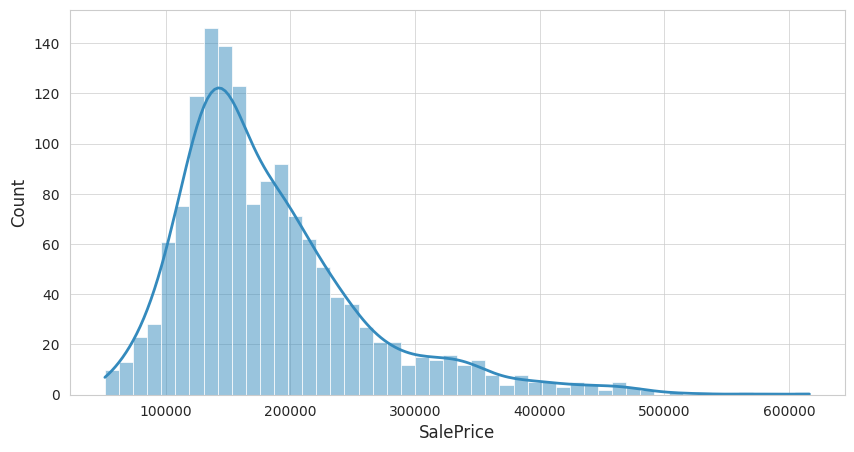

In [175]:
# Visualize Predicted SalePrice
print(pred['SalePrice'].describe())
plt.figure(figsize=(10,5))
sns.histplot(pred['SalePrice'], bins=50, kde = True, );

<Axes: >

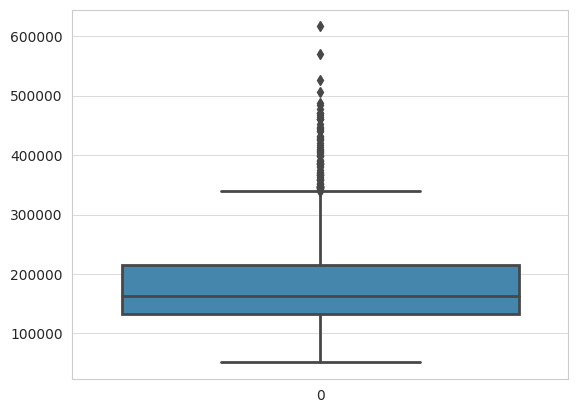

In [176]:
sns.boxplot(pred['SalePrice'])